In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import glob
import random
import warnings
from argparse import ArgumentParser
import sys

sys.path.append('/content/gdrive/MyDrive/Nature_code/REG_model/')
# external imports
import numpy as np
import torch
from torch.optim import Adam

# internal imports
from model import cvpr2018_net
import datagenerators
import losses
from torchsummary import summary
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import model as mdl

from tqdm import tqdm
import logging
from skimage.metrics import structural_similarity as ssim
import natsort
import scipy.io as sio
from scipy.ndimage import zoom  # For resizing
from sklearn.model_selection import train_test_split

In [ ]:
# from scipy.ndimage import zoom  # For resizing
import cv2
!pip install antspyx
import ants

     |████████████████████████████████| 300.3 MB 33 kB/s 
     |████████████████████████████████| 64 kB 3.1 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# import plot as nnplot

In [ ]:
import skimage
print(skimage.__version__)

0.18.3


In [ ]:
# sys.path.append('.../voxelmorph-master/ext/neuron/neuron')
# import plot as nnplot
sys.path.append('/content/gdrive/MyDrive/Nature_code/REG_model/pytorch_msssim')
import ssim as pytorchsim2


In [ ]:
model_dir='/content/gdrive/MyDrive/Nature_code/REG_model/checkpoints2D_PNG' # model for directory

# input data path
Image saved in directory considered to be single channel images, saved using cv2.imwrite
If your images have three channel, then modify the load function and use one channel after loading

In [ ]:
# directory for folder of atlas data
atlas_image_dir='/content/gdrive/MyDrive/Nature_code/reg_data/reference_data/'
atlas_label_dir='/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/'

In [ ]:
# directory for folder of moving data (data to be registered)
moving_image_dir='/content/gdrive/MyDrive/Nature_code/reg_data/moving_data/'
moving_label_dir='/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/'

In [ ]:
#getting file paths

In [ ]:
atlas_image_paths = glob.glob(atlas_image_dir+"*.png")
atlas_label_paths=glob.glob(atlas_label_dir+"*.png")
atlas_image_paths=natsort.natsorted(atlas_image_paths)
atlas_label_paths=natsort.natsorted(atlas_label_paths)
print("number of atlas images")
print(len(atlas_image_paths))
print("number of atlas labels")
print(len(atlas_label_paths))

number of atlas images
14
number of atlas labels
14


In [ ]:
moving_image_paths = glob.glob(moving_image_dir+"*.png")
moving_label_paths=glob.glob(moving_label_dir+"*.png")
moving_image_paths=natsort.natsorted(moving_image_paths)
moving_label_paths=natsort.natsorted(moving_label_paths)
print("number of moving images")
print(len(moving_image_paths))
print("number of moving labels")
print(len(moving_label_paths))

number of moving images
14
number of moving labels
14


In [ ]:
moving_label_paths

['/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/0.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/1.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/2.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/3.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/4.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/5.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/6.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/7.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/8.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/9.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/10.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/11.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/12.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/moving_data_seg/13.png']

In [ ]:
atlas_label_paths

['/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/0.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/1.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/2.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/3.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/4.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/5.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/6.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/7.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/8.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/9.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/10.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/11.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/12.png',
 '/content/gdrive/MyDrive/Nature_co

# check attributes of the image

In [ ]:
image = cv2.imread(atlas_image_paths[2],cv2.IMREAD_UNCHANGED) 
orig_shape=image.shape
orig_shape

(160, 192)

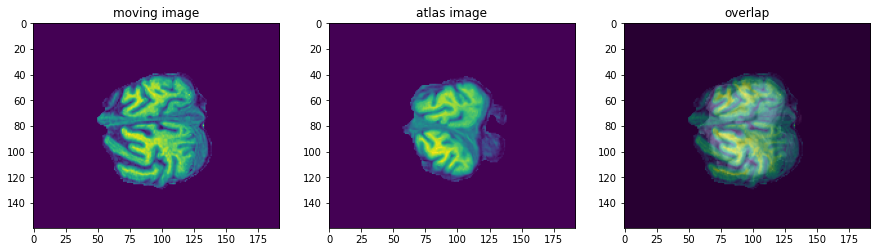

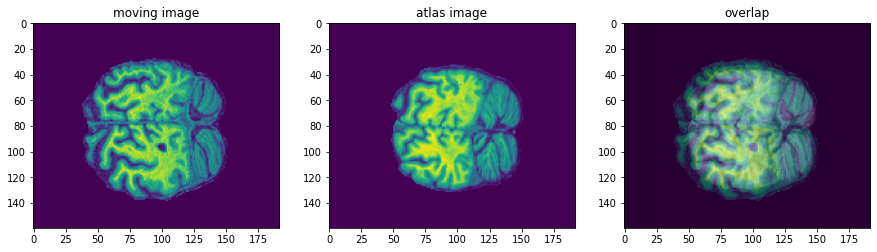

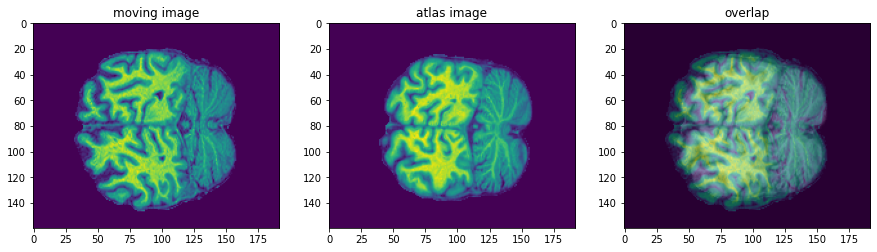

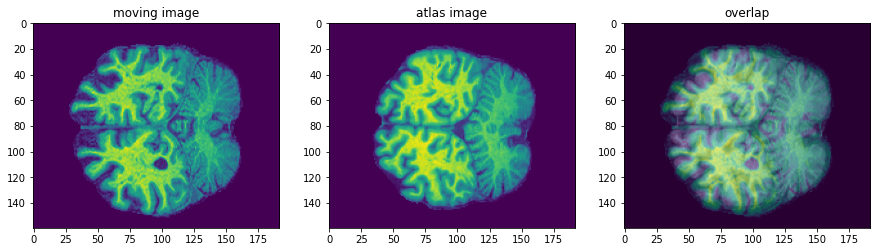

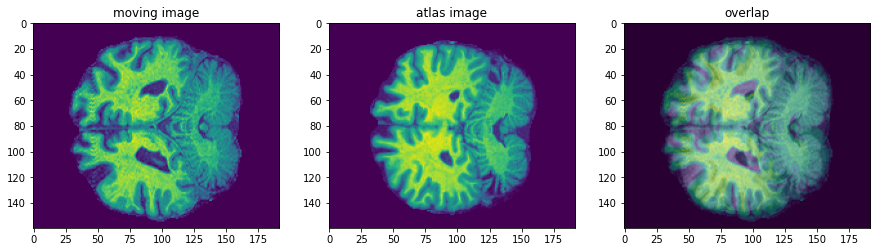

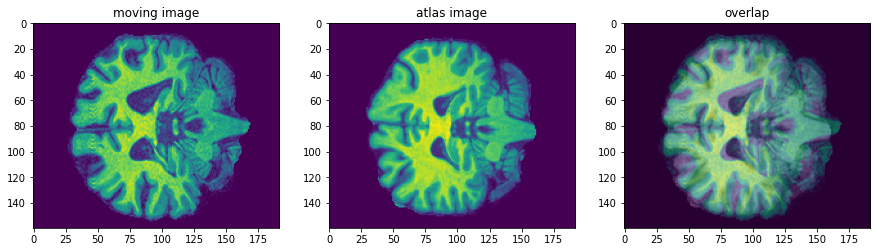

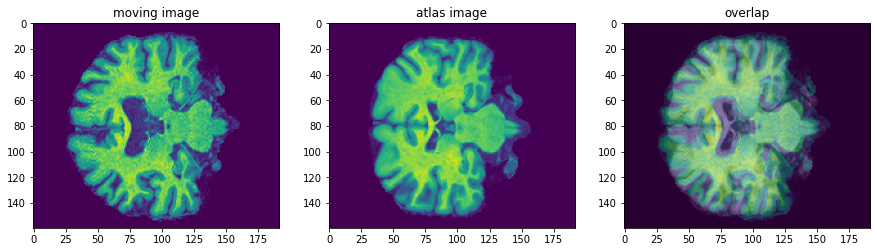

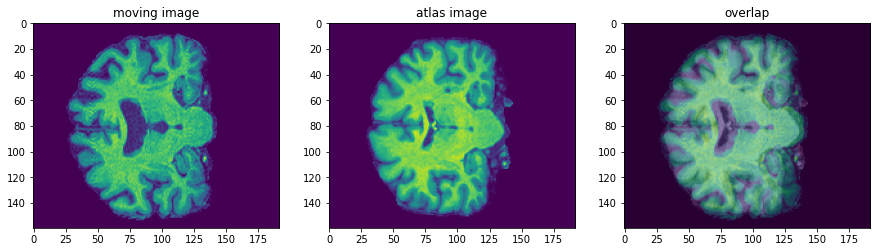

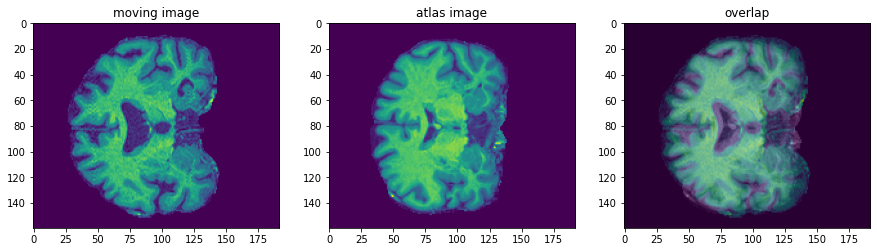

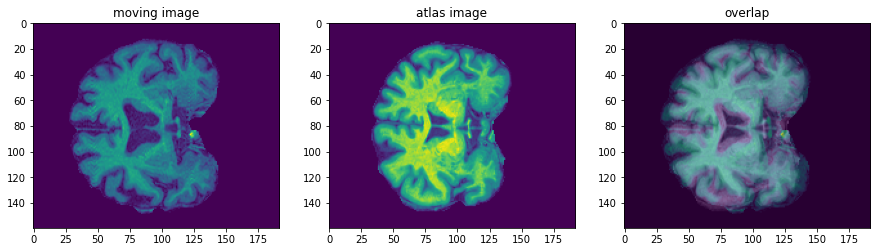

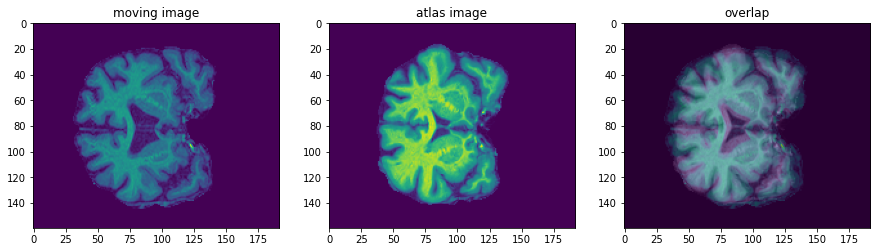

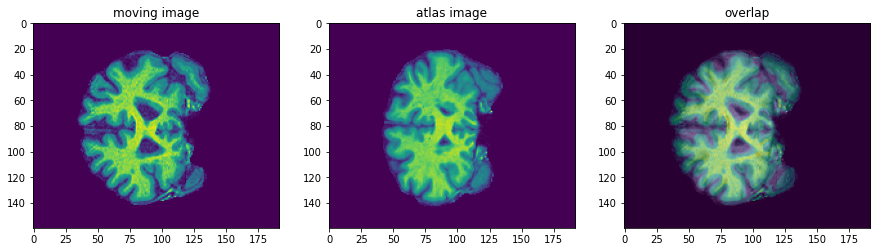

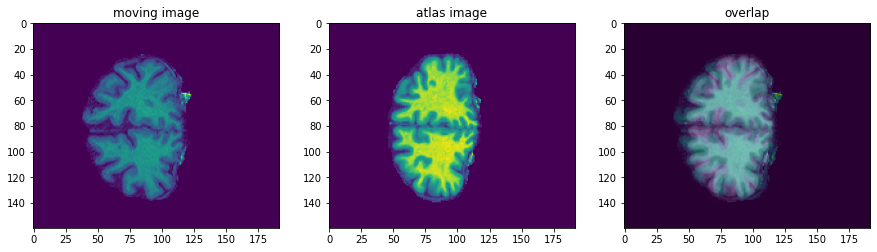

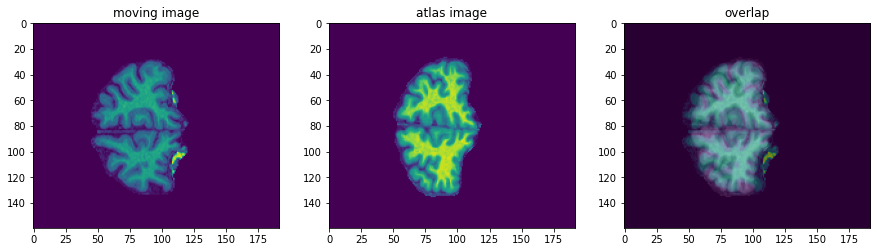

In [ ]:


rows = 1
index=0
for x in range(14):
    plt.figure(figsize=(15,15))
    index=0
    im_mov   = cv2.imread(moving_image_paths[x],cv2.IMREAD_UNCHANGED)
    im_atlas = cv2.imread(atlas_image_paths[x],cv2.IMREAD_UNCHANGED)
    plt.subplot(rows,3,index+1)
    plt.imshow(im_mov)
    plt.title("moving image")
    index=index+1
    plt.subplot(rows,3,index+1)
    plt.imshow(im_atlas)
    plt.title("atlas image")
    index=index+1
    plt.subplot(rows,3,index+1)
    plt.imshow(im_mov)
    plt.imshow(im_atlas,alpha=0.4,cmap='gray')
    plt.title("overlap")
    index=index+1


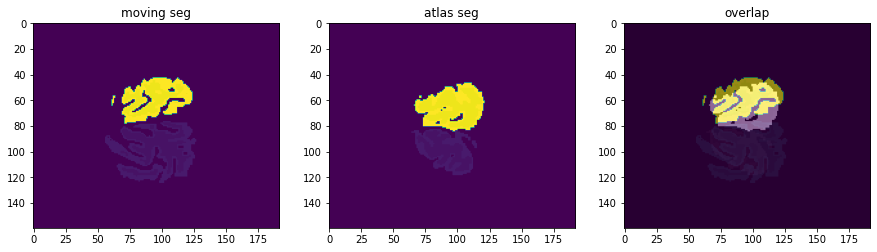

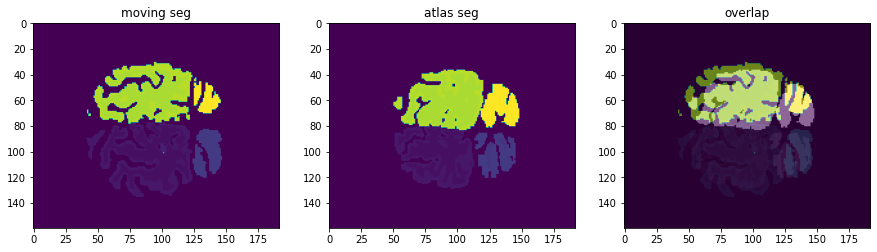

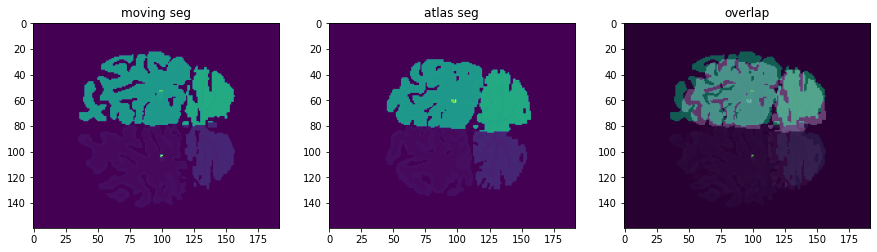

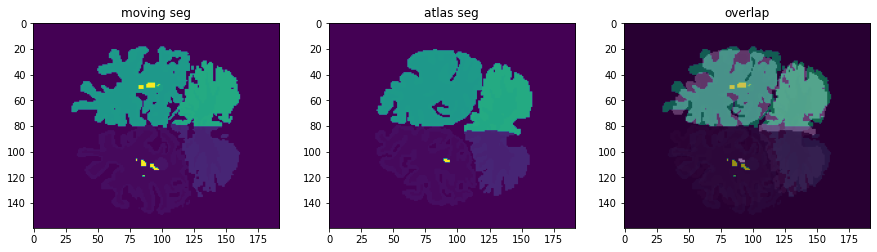

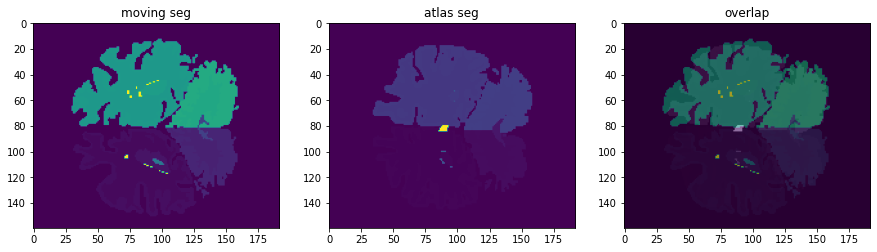

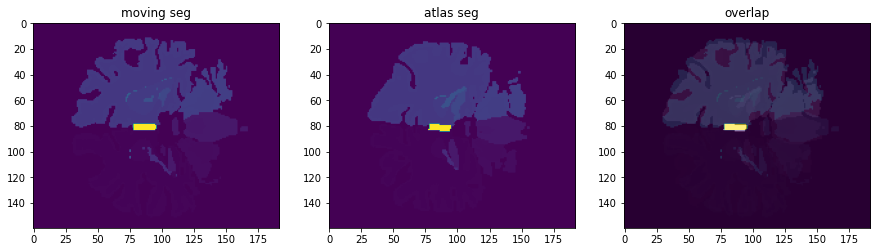

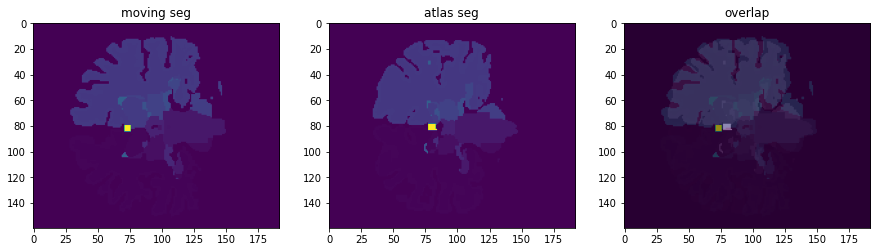

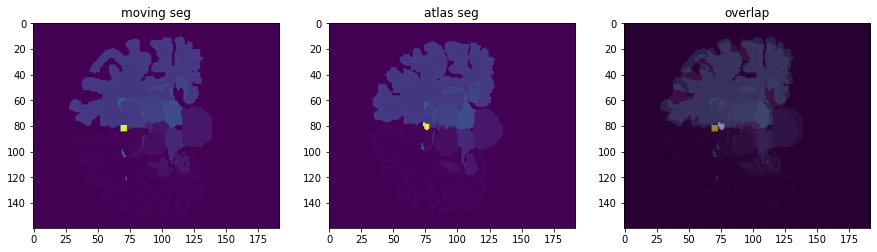

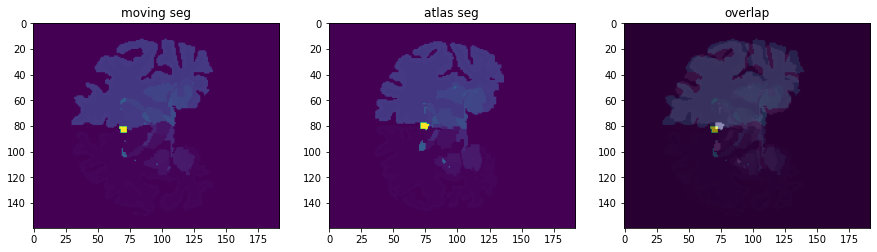

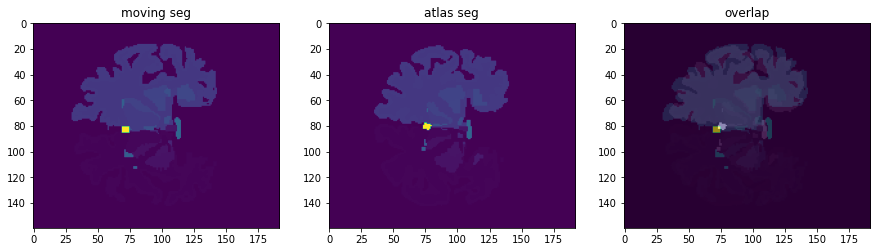

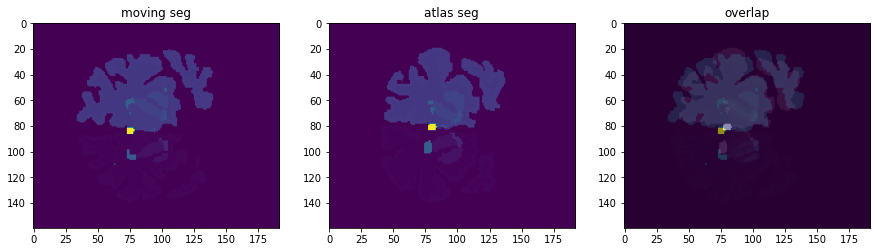

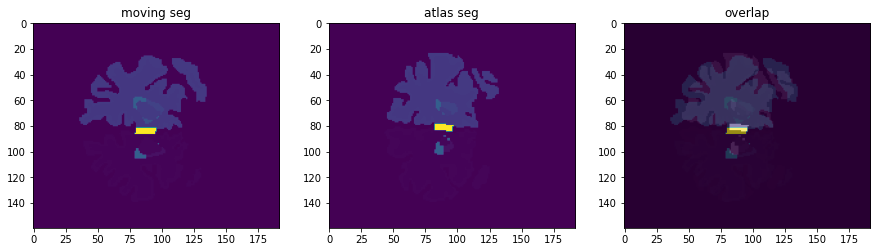

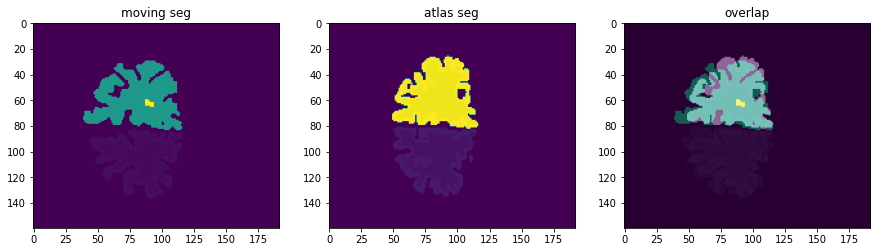

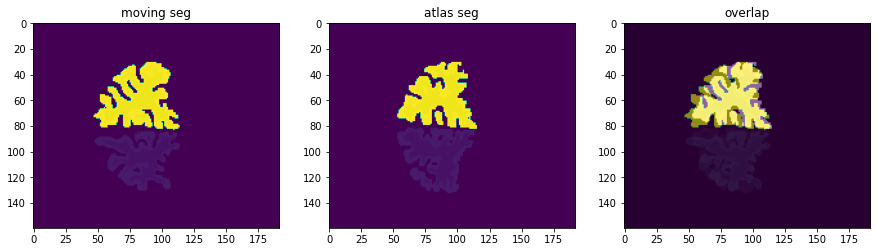

In [ ]:


rows = 1
index=0
for x in range(14):
    plt.figure(figsize=(15,15))
    index=0
    im_mov   = cv2.imread(moving_label_paths[x],cv2.IMREAD_UNCHANGED)
    im_atlas = cv2.imread(atlas_label_paths[x],cv2.IMREAD_UNCHANGED)
    plt.subplot(rows,3,index+1)
    plt.imshow(im_mov)
    plt.title("moving seg")
    index=index+1
    plt.subplot(rows,3,index+1)
    plt.imshow(im_atlas)
    plt.title("atlas seg")
    index=index+1
    plt.subplot(rows,3,index+1)
    plt.imshow(im_mov)
    plt.imshow(im_atlas,alpha=0.4,cmap='gray')
    plt.title("overlap")
    index=index+1


# we can see the images are not affinely registered
## Align affinely

In [ ]:
# create folder for saving affine registered images
affine_path='/content/gdrive/MyDrive/Nature_code/REG_model/affined2D/'
# os.mkdir(affine_path) #uncomment if folder is not already created before

### we are using ANTS for affine transormation but anyother framwork can be used that can do the same job

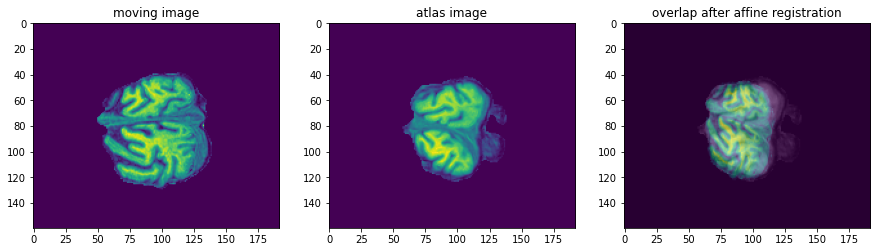

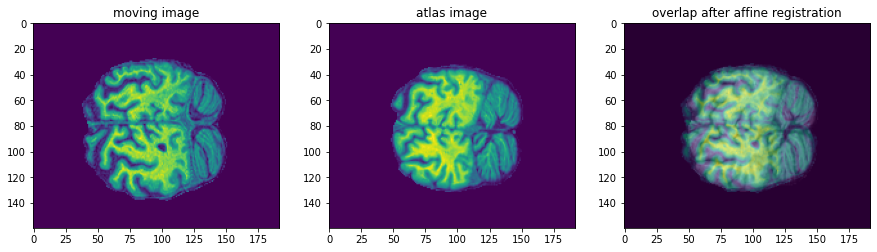

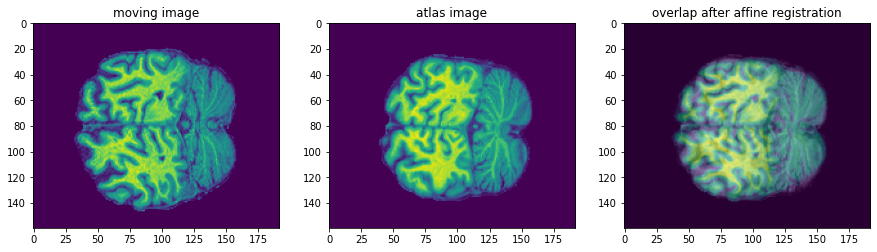

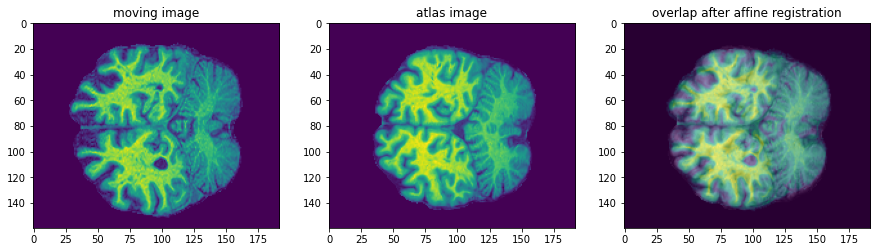

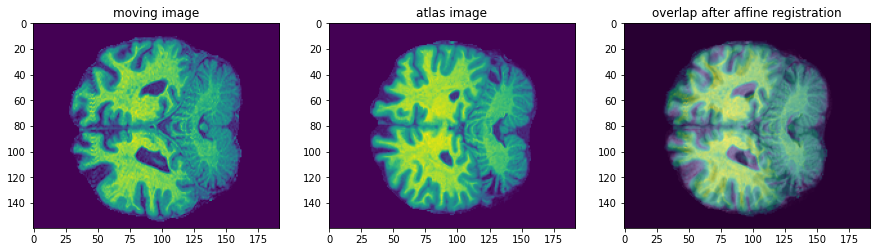

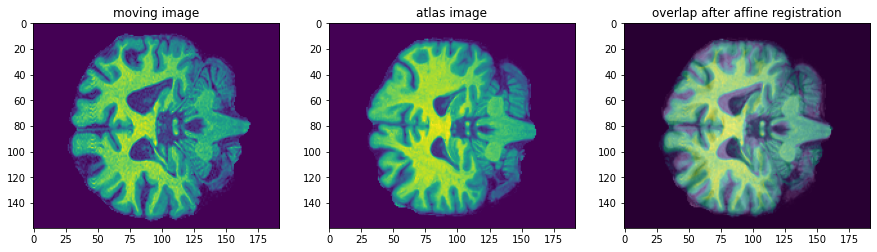

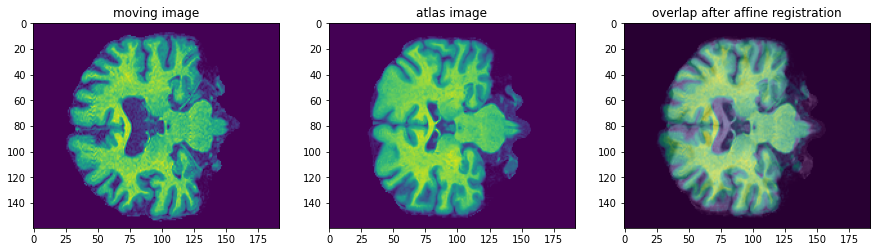

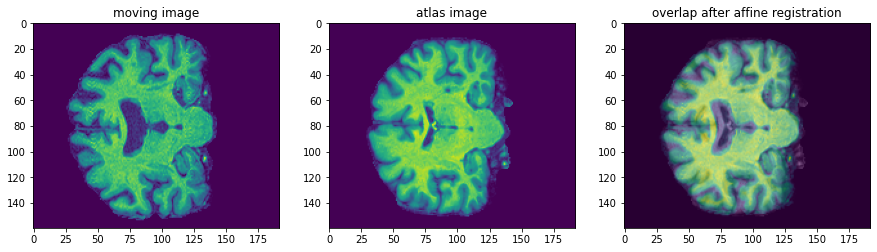

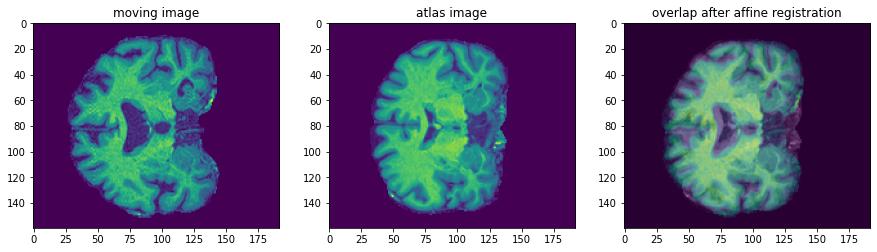

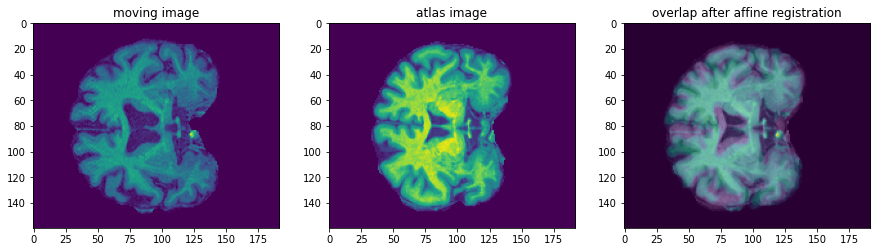

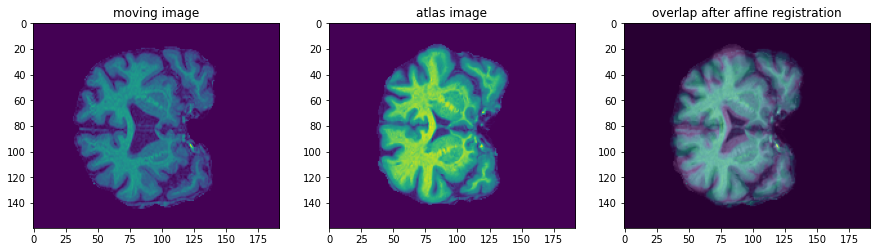

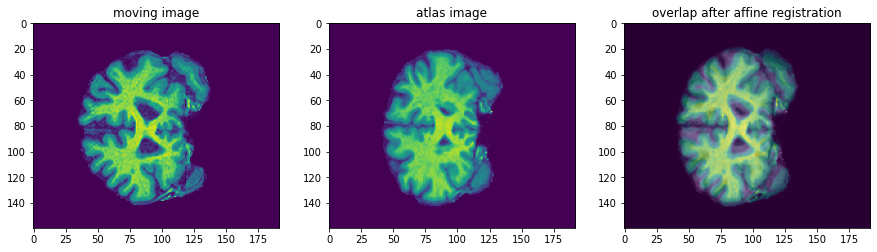

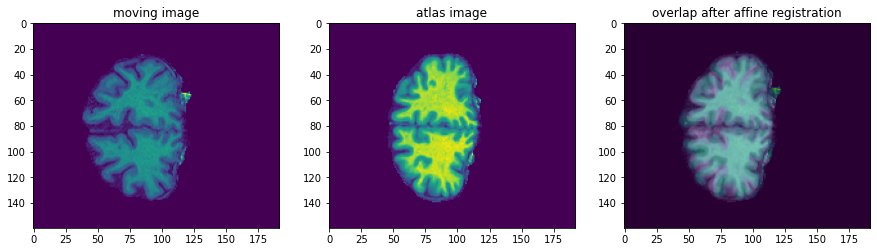

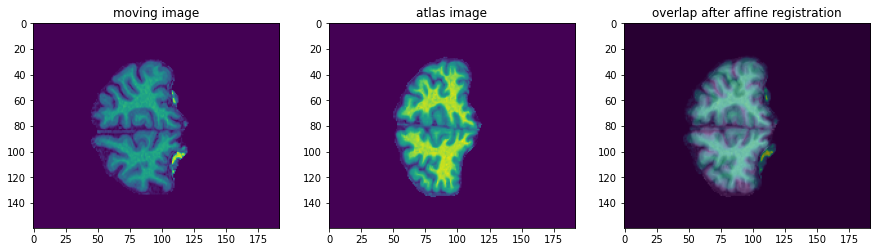

In [ ]:
rows = 1
index=0
for x in range(14):
  plt.figure(figsize=(15,15))
  index=0
  im_mov   = cv2.imread(moving_image_paths[x],cv2.IMREAD_UNCHANGED)
  im_mov= ants.from_numpy( im_mov)
  im_atlas = cv2.imread(atlas_image_paths[x],cv2.IMREAD_UNCHANGED)
  im_atlas= ants.from_numpy( im_atlas)
  
  seg_mov   = cv2.imread(moving_label_paths[x],cv2.IMREAD_UNCHANGED)
  seg_mov= ants.from_numpy( seg_mov)
  seg_atlas = cv2.imread(atlas_label_paths[x],cv2.IMREAD_UNCHANGED)
  seg_atlas= ants.from_numpy( seg_atlas)

  
  mytx = ants.registration(fixed=im_atlas , moving=im_mov, type_of_transform='Affine' , reg_iterations= (1000,1000,1000,1000))
  # print(mytx.keys())
  # getting warped moving image
  warped_moving_norm = mytx['warpedmovout']
  #applying transformation matrix to moving segmentation
  warped_moving_seg = ants.apply_transforms(fixed=im_atlas, moving=seg_mov, transformlist=mytx['fwdtransforms'],interpolator='nearestNeighbor')

  #writing affine registered images
  cv2.imwrite(affine_path+"/affined_moving/"+str(x)+".png", warped_moving_norm.numpy()) 
  cv2.imwrite(affine_path+"/affined_moving_seg/"+str(x)+".png", warped_moving_seg.numpy()) 
  # print( np.unique(seg_mov.numpy()))
  # print( np.unique(warped_moving_seg.numpy()))

  plt.subplot(rows,3,index+1)
  plt.imshow(im_mov.numpy())
  plt.title("moving image")
  index=index+1
  plt.subplot(rows,3,index+1)
  plt.imshow(im_atlas.numpy())
  plt.title("atlas image")
  index=index+1
  plt.subplot(rows,3,index+1)
  plt.imshow(warped_moving_norm.numpy())
  plt.imshow(im_atlas.numpy(),alpha=0.4,cmap='gray')
  plt.title("overlap after affine registration")
  index=index+1





Text(0.5, 1.0, 'segmentation after affine alignemnt')

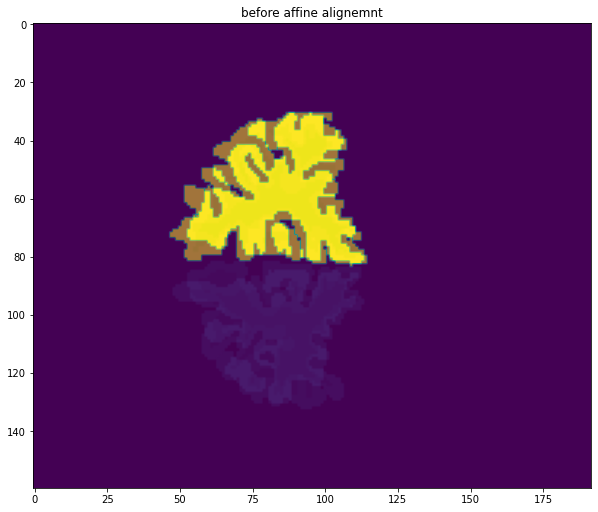

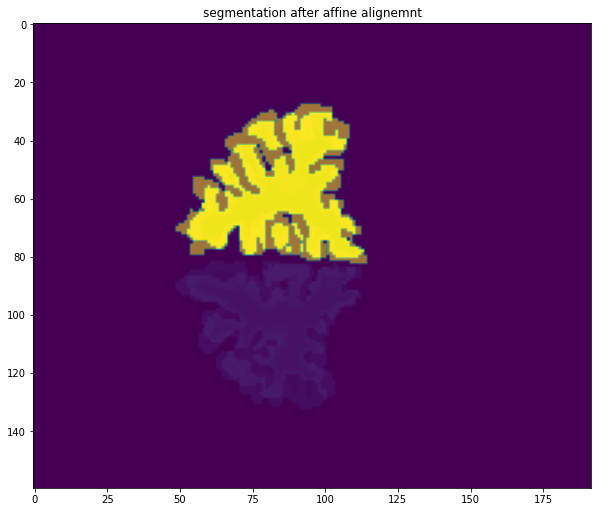

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(seg_mov.numpy())
plt.imshow(seg_atlas.numpy(),alpha=0.5)
plt.title("before affine alignemnt")
plt.figure(figsize=(10, 10))
plt.imshow(warped_moving_seg.numpy())
plt.imshow(seg_atlas.numpy(),alpha=0.5)
plt.title("segmentation after affine alignemnt")

In [ ]:
seg_mov.shape

(160, 192)

In [ ]:
# getting file paths for affined data
affined_mov_dir =affine_path+"/affined_moving/"
affined_mov_seg_dir = affine_path+"/affined_moving_seg/"


affined_mov_paths = glob.glob(affined_mov_dir+"*.png")
affined_mov_seg_paths =glob.glob(affined_mov_seg_dir+"*.png")
affined_mov_paths=natsort.natsorted(affined_mov_paths)
affined_mov_seg_paths=natsort.natsorted(affined_mov_seg_paths)



In [ ]:
affined_mov_paths

['/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/0.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/1.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/2.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/3.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/4.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/5.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/6.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/7.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/8.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/9.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/10.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving/11.png',
 '/content/gdr

In [ ]:
#getting original shape of the data
image = plt.imread(affined_mov_paths[0])
orig_shape=image.shape
orig_shape

(160, 192)

# preparing data for training and validation
### description of train_test_split

In [ ]:
atlas_training_paths,  atlas_test_paths, atlas_label_training_paths, atlas_label_test_paths = train_test_split( atlas_image_paths, atlas_label_paths, test_size=0.33, random_state=42)

In [ ]:
atlas_label_training_paths

['/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/8.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/2.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/1.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/13.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/4.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/7.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/10.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/3.png',
 '/content/gdrive/MyDrive/Nature_code/reg_data/reference_data_seg/6.png']

In [ ]:
moving_training_paths, moving_test_paths, moving_label_training_paths, moving_label_test_paths = train_test_split( affined_mov_paths, affined_mov_seg_paths, test_size=0.33, random_state=42)

In [ ]:
moving_label_training_paths

['/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving_seg/8.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving_seg/2.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving_seg/1.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving_seg/13.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving_seg/4.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving_seg/7.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving_seg/10.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving_seg/3.png',
 '/content/gdrive/MyDrive/Nature_code/REG_model/affined2D//affined_moving_seg/6.png']

# modify loader functions to accomodate different formats

In [ ]:
#laoding function for images
def load(image_file):
    # it can be modified as per image format
    # image = plt.imread((image_file))
    image=cv2.imread(image_file,cv2.IMREAD_UNCHANGED)
   

   
    return image

In [ ]:


def resize(img, shape, mode='constant', order=1,orig_shape=orig_shape):
    """
    Wrapper for scipy.ndimage.zoom suited for MRI images.
    """
    assert len(shape) == 2, "Can not have more than 3 dimensions"
    factors = (
        shape[0]/orig_shape[0],
        shape[1]/orig_shape[1], 
          )
    
    # Resize to the given shape
    return zoom(img, factors, mode=mode,order=order)


def preprocess(img, out_shape=None, order=1):
    """
    Preprocess the image.
    Just an example, you can add more preprocessing steps if you wish to.
    """
    if out_shape is not None:
        img = resize(img, out_shape, mode='nearest', order=order)
    
    # Normalize the image
    # mean = img.mean()
    # std = img.std()
    return (img  / np.max(img))
def preprocess_label(img, out_shape=None, mode='nearest', order=0):
    """
    Separates out the 3 labels from the segmentation provided, namely:
    GD-enhancing tumor (ET — label 4), the peritumoral edema (ED — label 2))
    and the necrotic and non-enhancing tumor core (NCR/NET — label 1)
    
    """
    
    if out_shape is not None:
        img = resize(img, out_shape, mode='constant', order=order)
    
    return (img)


# registraion model settings

In [ ]:
#here we are defining the encoder decoder for the unet which has a following architecture, however depending on your image resolution you can add more layers.
# example can be given

In [ ]:
nf_enc = [16, 32, 32, 32]
nf_dec = [32, 32, 32, 32, 32, 16, 16]


In [ ]:
batch_size=5
# os.environ["CUDA_VISIBLE_DEVICES"] = '5'
device = 'cuda'

In [ ]:
sim_loss_fn = torch.nn.MSELoss()#losses.mse_loss #losses.ncc_loss 


In [ ]:
# if we want to train using preceptual loss
def SSIM_loss(warp,input_fixed):
    input_fixedT=input_fixed#.permute(2,3,0,1)
    warpT=warp#.permute(2,3,0,1)
    
  #  input_fixedT=input_fixedT.squeeze()
   # warpT=warpT.squeeze()
    
    
    return 1-pytorchsim2.ssim(warpT, input_fixedT,data_range=1.0)

In [ ]:
# shape for input image to the model
vol_shape = (160, 192)
print(vol_shape)

(160, 192)


# here we are feeding only atlas and moving images , without any segmentation data

In [ ]:
def cvpr2018_gen_s2s(atlas_paths,moving_paths, batch_size=8):

    """n generator used for cvpr 2018 model for subject 2 subject registration """
    i = 0
       
    while True:
        
        if (i)*batch_size >= len(atlas_paths):  
           
            i = 0
           
        else:
         
          # getting batch paths 
          file_atlas_paths = atlas_paths[i*batch_size:(i+1)*batch_size]
          file_moving_paths = moving_paths[i*batch_size:(i+1)*batch_size]
        
          data1 = []
          data2 = [] 
          moving_images=[]
          atlas_images=[]

          ch_lab_s = 0
          ch_lab_e = 0
          for ind in  (range(len(file_atlas_paths))):
          #                 print(file1)
          #                 print(file1[0])
              img_data1 = load(file_atlas_paths[ind])
              img_data2   = load(file_moving_paths[ind])

              img_data1=preprocess(img_data1,vol_shape)
              img_data2=preprocess(img_data2,vol_shape)
              
              
              #img_data, lab_data =read_images_labels1(file1[0])                
              atlas_images.append(img_data1)  
              moving_images.append(img_data2)    
              
              

          atlas_images=np.asarray(atlas_images)
          moving_images=np.asarray(moving_images)
          #print(r1)
          #print(r2)
              

          # print(i)
          atlas_images = atlas_images[ ..., np.newaxis] 
          moving_images = moving_images[ ..., np.newaxis]


          i = i + 1

          yield ([moving_images, atlas_images])

# just checking generator nad have a look in iamges

In [ ]:
check_gen=cvpr2018_gen_s2s(atlas_training_paths,moving_training_paths, batch_size=8)

In [ ]:
moving_images, atlas_images =next(check_gen) # getting corresponding moving and atlas images


In [ ]:
moving_images.shape

(8, 160, 192, 1)

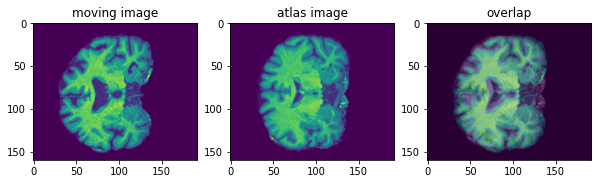

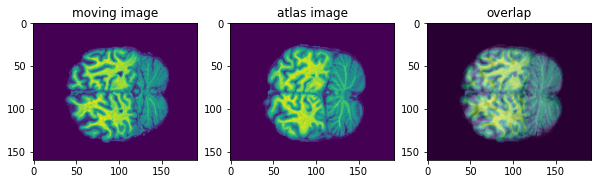

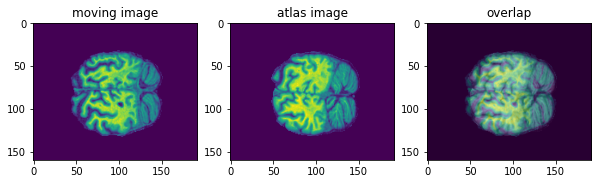

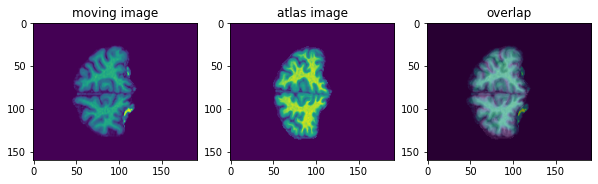

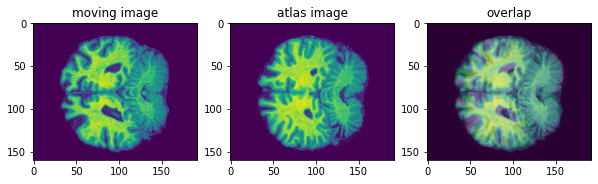

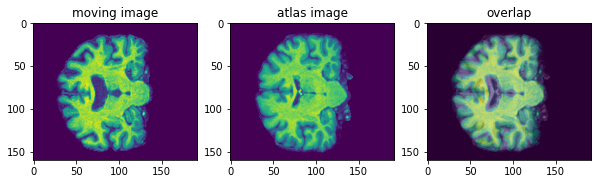

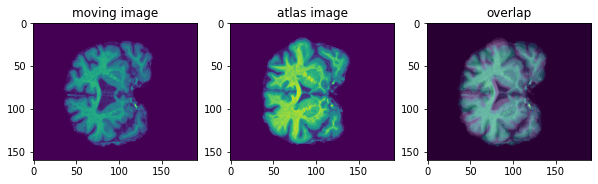

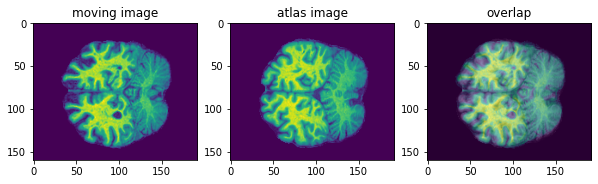

In [ ]:
rows = 1
index=0
for x in range(8):
    plt.figure(figsize=(10,10))
    index=0
    
    plt.subplot(rows,3,index+1)
    plt.imshow(moving_images[x,...,0])
    plt.title("moving image")
    index=index+1
    plt.subplot(rows,3,index+1)
    plt.imshow(atlas_images[x,...,0])
    plt.title("atlas image")
    index=index+1
    plt.subplot(rows,3,index+1)
    plt.imshow(moving_images[x,...,0])
    plt.imshow(atlas_images[x,...,0],alpha=0.4,cmap='gray')
    plt.title("overlap")
    index=index+1

In [ ]:
def gradient_loss_2D(s, penalty='l2'):
    dy = torch.abs(s[:, :, 1:, : ] - s[:, :, :-1, : ]) 
    dx = torch.abs(s[:, :, :, 1:] - s[:, :, :, :-1]) 
   
    if(penalty == 'l2'):
        dy = dy * dy
        dx = dx * dx
      
    d = torch.mean(dx) + torch.mean(dy)
    return d /2.0


In [ ]:
def save_checkpoint(state,checkpoint):
    """Saves model and training parameters at checkpoint + 'last.pth.tar'. If is_best==True, also saves
   checkpoint + 'best.pth.tar'
   Args:
       state: (dict) contains model's state_dict, may contain other keys such as epoch, optimizer state_dict
       is_best: (bool) True if it is the best model seen till now
       checkpoint: (string) folder where parameters are to be saved
   """
    filepath = os.path.join(checkpoint, 'last.pth.tar')
    print(filepath)
    if not os.path.exists(checkpoint):
        print("Checkpoint Directory does not exist! Making directory {}".format(checkpoint))
        os.mkdir(checkpoint)
    else:
        print("saving checkpoint ")
    torch.save(state, filepath)
   #if is_best:
       #shutil.copyfile(filepath, os.path.join(checkpoint, 'best.pth.tar'))

In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta

    def __call__(self, val_loss):#, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            #self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
           # self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss):#, model,path):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        #torch.save(model.state_dict(), path)
        self.val_loss_min = val_loss

In [ ]:
class RunningAverage():
    """A simple class that maintains the running average of a quantity
    
    Example:
    ```
    loss_avg = RunningAverage()
    loss_avg.update(2)
    loss_avg.update(4)
    loss_avg() = 3
    ```
    """
    def __init__(self):
        self.steps = 0
        self.total = 0
    
    def update(self, val):
        self.total += val
        self.steps += 1
    
    def __call__(self):
        return self.total/float(self.steps)

In [ ]:
logging.getLogger().setLevel(logging.INFO)

In [ ]:
n_iter=10
reg_param=0.1 # 0.01, 0.02....0.1,0.2,0.3 depends upon jacobian deteminant of flow field and the data itself
n_save_iter=500
save_summary_steps=2
summary_batch={}
precep_loss=[0.0]#,0.2]#,0.4,0.6,0.8,1.0 # regularization parameter should be changed when using precep loss
data_size=[1]#[10,8, 6,4,2,1]
total_training_data_len=len(atlas_training_paths)
batch_size=8

In [ ]:
def train(model, optimizer, dataloader,prl):
  

    summary_precp_loss = []
    summary_recon_loss = []
    summary_tloss = []
    loss_avg = RunningAverage()

   
    # Training loop.
    for i in range(int((total_training_data_len/batch_size)+1)):#400 # loop will be dependet on batchsize and total data


        # Generate the moving images and convert them to tensors.
        moving_image,atlas_vol_bs = next(dataloader)
      
        #print(moving_image.shape)
        input_moving = torch.from_numpy(moving_image).to(device).float()
#         print(input_moving.shape)
        input_moving = input_moving.permute(0, 3, 1, 2)
        input_fixed  = torch.from_numpy(atlas_vol_bs).to(device).float()
        input_fixed  = input_fixed.permute(0, 3, 1, 2)

        # Run the data through the model to produce warp and flow field
        warp, flow = model(input_moving, input_fixed)

        # Calculate loss

        recon_loss = sim_loss_fn(warp, input_fixed) 
        grad_loss = gradient_loss_2D(flow)
        precp_loss=SSIM_loss(warp,input_fixed)#(precep_loss_fn.forward(warp,input_fixed)).mean()


        loss = prl*precp_loss + (1-prl)*recon_loss + reg_param * grad_loss 

        # Backwards and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        p_loss= precp_loss.item()
        summary_precp_loss.append(p_loss)

        r_loss= recon_loss.item()
        summary_recon_loss.append(r_loss)

        t_loss= loss.item()
        summary_tloss.append(t_loss)

      # Evaluate summaries only once in a while
        if i % save_summary_steps == 0:
            print("chk")
            # extract data from torch Variable, move to cpu, convert to numpy arrays
            warp = warp[0,...].data.cpu().numpy()
            input_fixed = input_fixed[0,...].data.cpu().numpy()
            print("%d,loss %f,recon_loss %f, grad_loss %f, precep_loss %f"  % (i, loss.item(), recon_loss.item(), grad_loss.item(), precp_loss.item()), flush=True)


           
        # update the average loss
    loss_avg.update(loss.item())

   # t.set_postfix(loss='{:05.3f}'.format(loss_avg()))
   # t.update()

    # compute mean of all metrics in summary
    metrics_tl = np.mean(summary_tloss) #{metric: np.mean([x[metric]
                                    # for x in summ]) for metric in summ[0]}
    metrics_string = " loss "+"{:05.4f}".format(metrics_tl)
                              #  for k, v in metrics_mean.items())
    metrics_rl = np.mean(summary_recon_loss)
    metrics_pl = np.mean(summary_precp_loss)
    logging.info("- Train metrics: " + metrics_string)
    
    return metrics_tl,metrics_rl,metrics_pl

# main training loop

In [ ]:
# T_data=len(image_paths_train)
for ds in data_size:
   
    
    datas=str(ds)
    
    print(datas)
    for prl in precep_loss:
        prls=str(prl)
        print(prls)
        best_val_acc = 200
        epoch_tmean=[]
        epoch_meanlp=[]
        epoch_meanlmse=[]
        
        
        train_example_gen = cvpr2018_gen_s2s(atlas_training_paths, moving_training_paths, batch_size=batch_size)
        
        model = cvpr2018_net(vol_shape, nf_enc, nf_dec)
        model.to(device)
        opt = Adam(model.parameters(), lr=1e-4)
        early_stopping = EarlyStopping(patience=30, verbose=True,delta=0.000001)

        

        for epoch in range(1000):                             #100
            # Run one epoch
            logging.info("Epoch {}/{}".format(epoch + 1,1000))
            print("epoch "+str(epoch))

            # compute number of batches in one epoch (one full pass over the training set)
            mean_l, lmse, lp=train(model, opt, train_example_gen,prl)
            print('result loss')
            print(mean_l,lmse, lp)
            epoch_tmean.append(mean_l)
            epoch_meanlp.append(lp)
            epoch_meanlmse.append(lmse)

            # Evaluate for one epoch on validation set
            #val_metrics = evaluate(model, loss_fn, val_dataloader, metrics, params)

            val_acc = mean_l
            is_best = val_acc <= best_val_acc

            
            if is_best:
                logging.info("- Found new best accuracy")
                best_val_acc = val_acc
                print("saving")
                torch.save({'epoch': epoch + 1,
                                   'state_dict': model.state_dict(),
                                   'optim_dict': opt.state_dict(),
                                   'loss_dict': prls     ,
                                   'data_size': datas       }, model_dir+"/"+"REG_1000_"+datas+"_"+prls+"checkpoint.pth")
                
            early_stopping(mean_l)#, model,(model_dir+"/checkpoint.pth"))
        
            if early_stopping.early_stop:
                logging.info("- EARLY STOP")
                print("Early stopping")
               
                break

       
            # Save latest val metrics in a json file in the model directory
        # np.save( model_dir+"/"+datas+"_"+prls+"_REG_1000__epoch_loss_mean.npy",epoch_mean)
        # np.save( model_dir+"/"+datas+"_"+prls+"_REG_1000__epoch_loss_lp.npy",epoch_meanlp)
        # np.save( model_dir+"/"+datas+"_"+prls+"_REG_1000__epoch_loss_lmse.npy",epoch_meanlmse)



1
0.0


/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning:

torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)

INFO:root:Epoch 1/1000


epoch 0
chk
0,loss 0.020590,recon_loss 0.020590, grad_loss 0.000000, precep_loss 0.345858


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:4004: UserWarning:

Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.

INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy


result loss
0.021536901593208313 0.021536901593208313 0.3690570592880249
saving


INFO:root:Epoch 2/1000


epoch 1
chk
0,loss 0.020590,recon_loss 0.020590, grad_loss 0.000000, precep_loss 0.345859


INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy
INFO:root:Epoch 3/1000


result loss
0.021536252461373806 0.021536252461373806 0.36905530095100403
saving
EarlyStopping counter: 1 out of 30
epoch 2
chk
0,loss 0.020590,recon_loss 0.020590, grad_loss 0.000000, precep_loss 0.345863


INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy
INFO:root:Epoch 4/1000


result loss
0.02153562754392624 0.02153562754392624 0.3690548539161682
saving
epoch 3
chk
0,loss 0.020590,recon_loss 0.020590, grad_loss 0.000000, precep_loss 0.345867


INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy
INFO:root:Epoch 5/1000


result loss
0.02153494767844677 0.02153494767844677 0.36905437707901
saving
EarlyStopping counter: 1 out of 30
epoch 4
chk
0,loss 0.020589,recon_loss 0.020589, grad_loss 0.000000, precep_loss 0.345871


INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy
INFO:root:Epoch 6/1000


result loss
0.021534166298806667 0.021534166298806667 0.3690539002418518
saving
epoch 5
chk
0,loss 0.020589,recon_loss 0.020589, grad_loss 0.000000, precep_loss 0.345876


INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy
INFO:root:Epoch 7/1000


result loss
0.02153329737484455 0.021533295512199402 0.3690531551837921
saving
EarlyStopping counter: 1 out of 30
epoch 6
chk
0,loss 0.020589,recon_loss 0.020589, grad_loss 0.000000, precep_loss 0.345881


INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy
INFO:root:Epoch 8/1000


result loss
0.021532301791012287 0.021532299928367138 0.3690520226955414
saving
epoch 7
chk
0,loss 0.020588,recon_loss 0.020588, grad_loss 0.000000, precep_loss 0.345886


INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy
INFO:root:Epoch 9/1000


result loss
0.021531181409955025 0.0215311786159873 0.3690505921840668
saving
epoch 8
chk
0,loss 0.020588,recon_loss 0.020588, grad_loss 0.000000, precep_loss 0.345892


INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy
INFO:root:Epoch 10/1000


result loss
0.021529910154640675 0.0215299054980278 0.3690488040447235
saving
epoch 9
chk
0,loss 0.020587,recon_loss 0.020587, grad_loss 0.000000, precep_loss 0.345899


INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy
INFO:root:Epoch 11/1000


result loss
0.02152843028306961 0.02152842376381159 0.36904650926589966
saving
epoch 10
chk
0,loss 0.020587,recon_loss 0.020587, grad_loss 0.000000, precep_loss 0.345906


INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy
INFO:root:Epoch 12/1000


result loss
0.02152675110846758 0.021526742726564407 0.3690433204174042
saving
epoch 11
chk
0,loss 0.020586,recon_loss 0.020586, grad_loss 0.000000, precep_loss 0.345913


INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy
INFO:root:Epoch 13/1000


result loss
0.02152485027909279 0.021524839103221893 0.36903974413871765
saving
epoch 12
chk
0,loss 0.020585,recon_loss 0.020585, grad_loss 0.000000, precep_loss 0.345922


INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy
INFO:root:Epoch 14/1000


result loss
0.021522735245525837 0.021522720344364643 0.3690360188484192
saving
epoch 13
chk
0,loss 0.020584,recon_loss 0.020584, grad_loss 0.000000, precep_loss 0.345931


INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy
INFO:root:Epoch 15/1000


result loss
0.021520347334444523 0.02152032684534788 0.3690313696861267
saving
epoch 14
chk
0,loss 0.020583,recon_loss 0.020583, grad_loss 0.000000, precep_loss 0.345941


INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy
INFO:root:Epoch 16/1000


result loss
0.021517625078558922 0.021517598070204258 0.36902517080307007
saving
epoch 15
chk
0,loss 0.020581,recon_loss 0.020581, grad_loss 0.000000, precep_loss 0.345952


INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy
INFO:root:Epoch 17/1000


result loss
0.021514459513127804 0.02151442412286997 0.36901620030403137
saving
epoch 16
chk
0,loss 0.020580,recon_loss 0.020580, grad_loss 0.000000, precep_loss 0.345963


INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy
INFO:root:Epoch 18/1000


result loss
0.02151077426970005 0.02151072770357132 0.3690047860145569
saving
epoch 17
chk
0,loss 0.020578,recon_loss 0.020578, grad_loss 0.000001, precep_loss 0.345975


INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy
INFO:root:Epoch 19/1000


result loss
0.0215064762160182 0.0215064138174057 0.3689901530742645
saving
epoch 18
chk
0,loss 0.020575,recon_loss 0.020575, grad_loss 0.000001, precep_loss 0.345987


INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy
INFO:root:Epoch 20/1000


result loss
0.021501412615180016 0.021501331590116024 0.36897048354148865
saving
epoch 19
chk
0,loss 0.020573,recon_loss 0.020573, grad_loss 0.000001, precep_loss 0.346001


INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy
INFO:root:Epoch 21/1000


result loss
0.02149538230150938 0.021495274268090725 0.36894428730010986
saving
epoch 20
chk
0,loss 0.020569,recon_loss 0.020569, grad_loss 0.000001, precep_loss 0.346015


INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy
INFO:root:Epoch 22/1000


result loss
0.021488082595169544 0.021487939171493053 0.3689088225364685
saving
epoch 21
chk
0,loss 0.020565,recon_loss 0.020565, grad_loss 0.000002, precep_loss 0.346029


INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy
INFO:root:Epoch 23/1000


result loss
0.021479078568518162 0.02147888671606779 0.36886242032051086
saving
epoch 22
chk
0,loss 0.020560,recon_loss 0.020559, grad_loss 0.000002, precep_loss 0.346039


INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy
INFO:root:Epoch 24/1000


result loss
0.021467668935656548 0.021467410027980804 0.3688024878501892
saving
epoch 23
chk
0,loss 0.020553,recon_loss 0.020552, grad_loss 0.000003, precep_loss 0.346044


INFO:root:- Train metrics:  loss 0.0215
INFO:root:- Found new best accuracy
INFO:root:Epoch 25/1000


result loss
0.02145288046449423 0.0214525293558836 0.3687177896499634
saving
epoch 24
chk
0,loss 0.020543,recon_loss 0.020543, grad_loss 0.000004, precep_loss 0.346038


INFO:root:- Train metrics:  loss 0.0214
INFO:root:- Found new best accuracy
INFO:root:Epoch 26/1000


result loss
0.021433452144265175 0.02143296878784895 0.3685927391052246
saving
epoch 25
chk
0,loss 0.020530,recon_loss 0.020530, grad_loss 0.000005, precep_loss 0.346018


INFO:root:- Train metrics:  loss 0.0214
INFO:root:- Found new best accuracy
INFO:root:Epoch 27/1000


result loss
0.021407351829111576 0.021406673826277256 0.36841297149658203
saving
epoch 26
chk
0,loss 0.020512,recon_loss 0.020512, grad_loss 0.000008, precep_loss 0.345968


INFO:root:- Train metrics:  loss 0.0214
INFO:root:- Found new best accuracy
INFO:root:Epoch 28/1000


result loss
0.021372385323047638 0.02137142140418291 0.3681418001651764
saving
epoch 27
chk
0,loss 0.020487,recon_loss 0.020486, grad_loss 0.000011, precep_loss 0.345878


INFO:root:- Train metrics:  loss 0.0213
INFO:root:- Found new best accuracy
INFO:root:Epoch 29/1000


result loss
0.021326303482055664 0.021324915811419487 0.36774423718452454
saving
epoch 28
chk
0,loss 0.020453,recon_loss 0.020451, grad_loss 0.000016, precep_loss 0.345743


INFO:root:- Train metrics:  loss 0.0213
INFO:root:- Found new best accuracy
INFO:root:Epoch 30/1000


result loss
0.021266872994601727 0.02126484550535679 0.3672029972076416
saving
epoch 29
chk
0,loss 0.020407,recon_loss 0.020405, grad_loss 0.000023, precep_loss 0.345558


INFO:root:- Train metrics:  loss 0.0212
INFO:root:- Found new best accuracy
INFO:root:Epoch 31/1000


result loss
0.021189671009778976 0.02118666097521782 0.3665480613708496
saving
epoch 30
chk
0,loss 0.020351,recon_loss 0.020348, grad_loss 0.000035, precep_loss 0.345341


INFO:root:- Train metrics:  loss 0.0211
INFO:root:- Found new best accuracy
INFO:root:Epoch 32/1000


result loss
0.021100010722875595 0.021095464937388897 0.3658764362335205
saving
epoch 31
chk
0,loss 0.020297,recon_loss 0.020292, grad_loss 0.000054, precep_loss 0.345245


INFO:root:- Train metrics:  loss 0.0210
INFO:root:- Found new best accuracy
INFO:root:Epoch 33/1000


result loss
0.02102257777005434 0.021015610545873642 0.3655462861061096
saving
epoch 32
chk
0,loss 0.020280,recon_loss 0.020272, grad_loss 0.000082, precep_loss 0.345515


INFO:root:- Train metrics:  loss 0.0210
INFO:root:- Found new best accuracy
INFO:root:Epoch 34/1000


result loss
0.020998814143240452 0.020988382399082184 0.3659846782684326
saving
epoch 33
chk
0,loss 0.020318,recon_loss 0.020307, grad_loss 0.000113, precep_loss 0.346154


INFO:root:- Train metrics:  loss 0.0210
INFO:root:Epoch 35/1000


result loss
0.021021835505962372 0.021008518524467945 0.3666837215423584
EarlyStopping counter: 1 out of 30
epoch 34
chk
0,loss 0.020320,recon_loss 0.020308, grad_loss 0.000122, precep_loss 0.346272


INFO:root:- Train metrics:  loss 0.0210
INFO:root:Epoch 36/1000


result loss
0.02100380975753069 0.020990194752812386 0.3665260374546051
EarlyStopping counter: 2 out of 30
epoch 35
chk
0,loss 0.020277,recon_loss 0.020266, grad_loss 0.000112, precep_loss 0.345854


INFO:root:- Train metrics:  loss 0.0210
INFO:root:- Found new best accuracy
INFO:root:Epoch 37/1000


result loss
0.020959896966814995 0.020947742275893688 0.365866482257843
saving
epoch 36
chk
0,loss 0.020242,recon_loss 0.020233, grad_loss 0.000096, precep_loss 0.345425


INFO:root:- Train metrics:  loss 0.0209
INFO:root:- Found new best accuracy
INFO:root:Epoch 38/1000


result loss
0.020935694687068462 0.02092522569000721 0.3653993010520935
saving
epoch 37
chk
0,loss 0.020230,recon_loss 0.020222, grad_loss 0.000085, precep_loss 0.345223


INFO:root:- Train metrics:  loss 0.0209
INFO:root:- Found new best accuracy
INFO:root:Epoch 39/1000


result loss
0.020930049009621143 0.02092060260474682 0.3652258813381195
saving
epoch 38
chk
0,loss 0.020225,recon_loss 0.020217, grad_loss 0.000082, precep_loss 0.345159


INFO:root:- Train metrics:  loss 0.0209
INFO:root:- Found new best accuracy
INFO:root:Epoch 40/1000


result loss
0.020922308787703514 0.020913039334118366 0.3651520907878876
saving
epoch 39
chk
0,loss 0.020215,recon_loss 0.020207, grad_loss 0.000086, precep_loss 0.345141


INFO:root:- Train metrics:  loss 0.0209
INFO:root:- Found new best accuracy
INFO:root:Epoch 41/1000


result loss
0.020903202705085278 0.020893312990665436 0.36507663130760193
saving
epoch 40
chk
0,loss 0.020200,recon_loss 0.020191, grad_loss 0.000096, precep_loss 0.345152


INFO:root:- Train metrics:  loss 0.0209
INFO:root:- Found new best accuracy
INFO:root:Epoch 42/1000


result loss
0.02087586373090744 0.0208646347746253 0.36501845717430115
saving
epoch 41
chk
0,loss 0.020186,recon_loss 0.020175, grad_loss 0.000112, precep_loss 0.345220


INFO:root:- Train metrics:  loss 0.0208
INFO:root:- Found new best accuracy
INFO:root:Epoch 43/1000


result loss
0.020848958753049374 0.0208358196541667 0.36503109335899353
saving
epoch 42
chk
0,loss 0.020177,recon_loss 0.020164, grad_loss 0.000132, precep_loss 0.345353


INFO:root:- Train metrics:  loss 0.0208
INFO:root:- Found new best accuracy
INFO:root:Epoch 44/1000


result loss
0.020827732048928738 0.020812446251511574 0.36509984731674194
saving
epoch 43
chk
0,loss 0.020168,recon_loss 0.020154, grad_loss 0.000150, precep_loss 0.345463


INFO:root:- Train metrics:  loss 0.0208
INFO:root:- Found new best accuracy
INFO:root:Epoch 45/1000


result loss
0.020806971937417984 0.020789855159819126 0.36507871747016907
saving
epoch 44
chk
0,loss 0.020151,recon_loss 0.020135, grad_loss 0.000163, precep_loss 0.345448


INFO:root:- Train metrics:  loss 0.0208
INFO:root:- Found new best accuracy
INFO:root:Epoch 46/1000


result loss
0.020780188031494617 0.020761903375387192 0.3648812770843506
saving
epoch 45
chk
0,loss 0.020125,recon_loss 0.020108, grad_loss 0.000170, precep_loss 0.345315


INFO:root:- Train metrics:  loss 0.0207
INFO:root:- Found new best accuracy
INFO:root:Epoch 47/1000


result loss
0.02074996568262577 0.02073093969374895 0.36458587646484375
saving
epoch 46
chk
0,loss 0.020099,recon_loss 0.020081, grad_loss 0.000179, precep_loss 0.345173


INFO:root:- Train metrics:  loss 0.0207
INFO:root:- Found new best accuracy
INFO:root:Epoch 48/1000


result loss
0.020720277912914753 0.020700253546237946 0.3643133044242859
saving
epoch 47
chk
0,loss 0.020075,recon_loss 0.020056, grad_loss 0.000194, precep_loss 0.345100


INFO:root:- Train metrics:  loss 0.0207
INFO:root:- Found new best accuracy
INFO:root:Epoch 49/1000


result loss
0.020687930285930634 0.020665944553911686 0.3640940487384796
saving
epoch 48
chk
0,loss 0.020052,recon_loss 0.020030, grad_loss 0.000222, precep_loss 0.345113


INFO:root:- Train metrics:  loss 0.0206
INFO:root:- Found new best accuracy
INFO:root:Epoch 50/1000


result loss
0.020649796351790428 0.020624435506761074 0.3639205992221832
saving
epoch 49
chk
0,loss 0.020031,recon_loss 0.020005, grad_loss 0.000263, precep_loss 0.345231


INFO:root:- Train metrics:  loss 0.0206
INFO:root:- Found new best accuracy
INFO:root:Epoch 51/1000


result loss
0.020610478706657887 0.020580329932272434 0.36382395029067993
saving
epoch 50
chk
0,loss 0.020014,recon_loss 0.019983, grad_loss 0.000315, precep_loss 0.345431


INFO:root:- Train metrics:  loss 0.0206
INFO:root:- Found new best accuracy
INFO:root:Epoch 52/1000


result loss
0.020575151778757572 0.020539356395602226 0.3637767434120178
saving
epoch 51
chk
0,loss 0.019997,recon_loss 0.019960, grad_loss 0.000368, precep_loss 0.345594


INFO:root:- Train metrics:  loss 0.0205
INFO:root:- Found new best accuracy
INFO:root:Epoch 53/1000


result loss
0.020542914047837257 0.020501503720879555 0.3636835515499115
saving
epoch 52
chk
0,loss 0.019978,recon_loss 0.019936, grad_loss 0.000419, precep_loss 0.345673


INFO:root:- Train metrics:  loss 0.0205
INFO:root:- Found new best accuracy
INFO:root:Epoch 54/1000


result loss
0.02051635831594467 0.020469551905989647 0.3635921776294708
saving
epoch 53
chk
0,loss 0.019965,recon_loss 0.019918, grad_loss 0.000473, precep_loss 0.345791


INFO:root:- Train metrics:  loss 0.0205
INFO:root:- Found new best accuracy
INFO:root:Epoch 55/1000


result loss
0.02049440797418356 0.020441734232008457 0.36360234022140503
saving
epoch 54
chk
0,loss 0.019960,recon_loss 0.019907, grad_loss 0.000532, precep_loss 0.346026


INFO:root:- Train metrics:  loss 0.0205
INFO:root:- Found new best accuracy
INFO:root:Epoch 56/1000


result loss
0.020473689772188663 0.020414451137185097 0.36374780535697937
saving
epoch 55
chk
0,loss 0.019959,recon_loss 0.019901, grad_loss 0.000588, precep_loss 0.346288


INFO:root:- Train metrics:  loss 0.0205
INFO:root:- Found new best accuracy
INFO:root:Epoch 57/1000


result loss
0.020458001643419266 0.02039287704974413 0.3639465272426605
saving
epoch 56
chk
0,loss 0.019948,recon_loss 0.019886, grad_loss 0.000626, precep_loss 0.346347


INFO:root:- Train metrics:  loss 0.0204
INFO:root:- Found new best accuracy
INFO:root:Epoch 58/1000


result loss
0.020441604778170586 0.020372796803712845 0.36395463347435
saving
epoch 57
chk
0,loss 0.019925,recon_loss 0.019861, grad_loss 0.000646, precep_loss 0.346180


INFO:root:- Train metrics:  loss 0.0204
INFO:root:- Found new best accuracy
INFO:root:Epoch 59/1000


result loss
0.0204218290746212 0.02035099547356367 0.3638025224208832
saving
epoch 58
chk
0,loss 0.019901,recon_loss 0.019835, grad_loss 0.000661, precep_loss 0.345971


INFO:root:- Train metrics:  loss 0.0204
INFO:root:- Found new best accuracy
INFO:root:Epoch 60/1000


result loss
0.020400503650307655 0.020327924750745296 0.36365067958831787
saving
epoch 59
chk
0,loss 0.019880,recon_loss 0.019812, grad_loss 0.000678, precep_loss 0.345827


INFO:root:- Train metrics:  loss 0.0204
INFO:root:- Found new best accuracy
INFO:root:Epoch 61/1000


result loss
0.02037842757999897 0.020303589291870594 0.3635633885860443
saving
epoch 60
chk
0,loss 0.019861,recon_loss 0.019791, grad_loss 0.000699, precep_loss 0.345742


INFO:root:- Train metrics:  loss 0.0204
INFO:root:- Found new best accuracy
INFO:root:Epoch 62/1000


result loss
0.020357487723231316 0.02027998771518469 0.3635173439979553
saving
epoch 61
chk
0,loss 0.019843,recon_loss 0.019771, grad_loss 0.000723, precep_loss 0.345653


INFO:root:- Train metrics:  loss 0.0203
INFO:root:- Found new best accuracy
INFO:root:Epoch 63/1000


result loss
0.020337358117103577 0.020257066935300827 0.36344075202941895
saving
epoch 62
chk
0,loss 0.019823,recon_loss 0.019748, grad_loss 0.000748, precep_loss 0.345519


INFO:root:- Train metrics:  loss 0.0203
INFO:root:- Found new best accuracy
INFO:root:Epoch 64/1000


result loss
0.020316491834819317 0.02023324277251959 0.36330851912498474
saving
epoch 63
chk
0,loss 0.019802,recon_loss 0.019724, grad_loss 0.000779, precep_loss 0.345375


INFO:root:- Train metrics:  loss 0.0203
INFO:root:- Found new best accuracy
INFO:root:Epoch 65/1000


result loss
0.02029428444802761 0.020207400433719158 0.36317306756973267
saving
epoch 64
chk
0,loss 0.019783,recon_loss 0.019701, grad_loss 0.000819, precep_loss 0.345282


INFO:root:- Train metrics:  loss 0.0203
INFO:root:- Found new best accuracy
INFO:root:Epoch 66/1000


result loss
0.02026997786015272 0.020178108476102352 0.3630774915218353
saving
epoch 65
chk
0,loss 0.019766,recon_loss 0.019678, grad_loss 0.000874, precep_loss 0.345240


INFO:root:- Train metrics:  loss 0.0202
INFO:root:- Found new best accuracy
INFO:root:Epoch 67/1000


result loss
0.02024240233004093 0.020143920555710793 0.3630029857158661
saving
epoch 66
chk
0,loss 0.019747,recon_loss 0.019653, grad_loss 0.000946, precep_loss 0.345220


INFO:root:- Train metrics:  loss 0.0202
INFO:root:- Found new best accuracy
INFO:root:Epoch 68/1000


result loss
0.020209940150380135 0.020102648995816708 0.36292117834091187
saving
epoch 67
chk
0,loss 0.019725,recon_loss 0.019621, grad_loss 0.001043, precep_loss 0.345191


INFO:root:- Train metrics:  loss 0.0202
INFO:root:- Found new best accuracy
INFO:root:Epoch 69/1000


result loss
0.020169715397059917 0.020050713792443275 0.36279797554016113
saving
epoch 68
chk
0,loss 0.019696,recon_loss 0.019579, grad_loss 0.001176, precep_loss 0.345118


INFO:root:- Train metrics:  loss 0.0201
INFO:root:- Found new best accuracy
INFO:root:Epoch 70/1000


result loss
0.020114162005484104 0.01997892279177904 0.36255785822868347
saving
epoch 69
chk
0,loss 0.019659,recon_loss 0.019522, grad_loss 0.001366, precep_loss 0.344979


INFO:root:- Train metrics:  loss 0.0200
INFO:root:- Found new best accuracy
INFO:root:Epoch 71/1000


result loss
0.0200421754270792 0.01988354232162237 0.3621552884578705
saving
epoch 70
chk
0,loss 0.019607,recon_loss 0.019444, grad_loss 0.001628, precep_loss 0.344655


INFO:root:- Train metrics:  loss 0.0200
INFO:root:- Found new best accuracy
INFO:root:Epoch 72/1000


result loss
0.019952348433434963 0.019762023352086544 0.3614910840988159
saving
epoch 71
chk
0,loss 0.019545,recon_loss 0.019346, grad_loss 0.001987, precep_loss 0.344121


INFO:root:- Train metrics:  loss 0.0198
INFO:root:- Found new best accuracy
INFO:root:Epoch 73/1000


result loss
0.019837399944663048 0.019603603519499302 0.3605674207210541
saving
epoch 72
chk
0,loss 0.019479,recon_loss 0.019234, grad_loss 0.002450, precep_loss 0.343290


INFO:root:- Train metrics:  loss 0.0197
INFO:root:- Found new best accuracy
INFO:root:Epoch 74/1000


result loss
0.01970831025391817 0.019421109929680824 0.35946616530418396
saving
epoch 73
chk
0,loss 0.019404,recon_loss 0.019109, grad_loss 0.002941, precep_loss 0.341991


INFO:root:- Train metrics:  loss 0.0196
INFO:root:- Found new best accuracy
INFO:root:Epoch 75/1000


result loss
0.019570298492908478 0.019230738282203674 0.35797029733657837
saving
epoch 74
chk
0,loss 0.019295,recon_loss 0.018954, grad_loss 0.003404, precep_loss 0.340291


INFO:root:- Train metrics:  loss 0.0194
INFO:root:- Found new best accuracy
INFO:root:Epoch 76/1000


result loss
0.01942124031484127 0.019030898809432983 0.3560466170310974
saving
epoch 75
chk
0,loss 0.019169,recon_loss 0.018767, grad_loss 0.004016, precep_loss 0.338746


INFO:root:- Train metrics:  loss 0.0192
INFO:root:- Found new best accuracy
INFO:root:Epoch 77/1000


result loss
0.019240201450884342 0.018771291710436344 0.35442253947257996
saving
epoch 76
chk
0,loss 0.019041,recon_loss 0.018566, grad_loss 0.004754, precep_loss 0.337515


INFO:root:- Train metrics:  loss 0.0191
INFO:root:- Found new best accuracy
INFO:root:Epoch 78/1000


result loss
0.019084155559539795 0.01853946316987276 0.35341137647628784
saving
epoch 77
chk
0,loss 0.018885,recon_loss 0.018357, grad_loss 0.005282, precep_loss 0.336633


INFO:root:- Train metrics:  loss 0.0189
INFO:root:- Found new best accuracy
INFO:root:Epoch 79/1000


result loss
0.01894658710807562 0.018338949419558048 0.35315102338790894
saving
epoch 78
chk
0,loss 0.018832,recon_loss 0.018222, grad_loss 0.006102, precep_loss 0.335646


INFO:root:- Train metrics:  loss 0.0188
INFO:root:- Found new best accuracy
INFO:root:Epoch 80/1000


result loss
0.018805216997861862 0.018094993196427822 0.3517649471759796
saving
epoch 79
chk
0,loss 0.018832,recon_loss 0.018146, grad_loss 0.006860, precep_loss 0.334738


INFO:root:- Train metrics:  loss 0.0187
INFO:root:- Found new best accuracy
INFO:root:Epoch 81/1000


result loss
0.018727405928075314 0.017947939224541187 0.3507961928844452
saving
epoch 80
chk
0,loss 0.018730,recon_loss 0.018027, grad_loss 0.007036, precep_loss 0.333888


INFO:root:- Train metrics:  loss 0.0186
INFO:root:- Found new best accuracy
INFO:root:Epoch 82/1000


result loss
0.01863412093371153 0.017847624607384205 0.35028648376464844
saving
epoch 81
chk
0,loss 0.018671,recon_loss 0.017954, grad_loss 0.007167, precep_loss 0.333122


INFO:root:- Train metrics:  loss 0.0185
INFO:root:- Found new best accuracy
INFO:root:Epoch 83/1000


result loss
0.018500384874641895 0.017685829661786556 0.34908631443977356
saving
epoch 82
chk
0,loss 0.018662,recon_loss 0.017923, grad_loss 0.007390, precep_loss 0.332482


INFO:root:- Train metrics:  loss 0.0184
INFO:root:- Found new best accuracy
INFO:root:Epoch 84/1000


result loss
0.018431121483445168 0.017604434862732887 0.34831756353378296
saving
epoch 83
chk
0,loss 0.018580,recon_loss 0.017841, grad_loss 0.007387, precep_loss 0.331866


INFO:root:- Train metrics:  loss 0.0183
INFO:root:- Found new best accuracy
INFO:root:Epoch 85/1000


result loss
0.01833793055266142 0.017515049315989017 0.34779608249664307
saving
epoch 84
chk
0,loss 0.018537,recon_loss 0.017781, grad_loss 0.007555, precep_loss 0.331306


INFO:root:- Train metrics:  loss 0.0182
INFO:root:- Found new best accuracy
INFO:root:Epoch 86/1000


result loss
0.018225758336484432 0.017377812415361404 0.34655526280403137
saving
epoch 85
chk
0,loss 0.018516,recon_loss 0.017730, grad_loss 0.007860, precep_loss 0.330800


INFO:root:- Train metrics:  loss 0.0181
INFO:root:- Found new best accuracy
INFO:root:Epoch 87/1000


result loss
0.018147253431379795 0.017275460995733738 0.34572848677635193
saving
epoch 86
chk
0,loss 0.018466,recon_loss 0.017656, grad_loss 0.008105, precep_loss 0.330281


INFO:root:- Train metrics:  loss 0.0180
INFO:root:- Found new best accuracy
INFO:root:Epoch 88/1000


result loss
0.01804956328123808 0.017147826962172985 0.34464603662490845
saving
epoch 87
chk
0,loss 0.018436,recon_loss 0.017600, grad_loss 0.008361, precep_loss 0.329849


INFO:root:- Train metrics:  loss 0.0180
INFO:root:- Found new best accuracy
INFO:root:Epoch 89/1000


result loss
0.017975065857172012 0.017049819231033325 0.34372642636299133
saving
epoch 88
chk
0,loss 0.018390,recon_loss 0.017542, grad_loss 0.008476, precep_loss 0.329436


INFO:root:- Train metrics:  loss 0.0179
INFO:root:- Found new best accuracy
INFO:root:Epoch 90/1000


result loss
0.017901327461004257 0.01696778368204832 0.34296730160713196
saving
epoch 89
chk
0,loss 0.018352,recon_loss 0.017498, grad_loss 0.008536, precep_loss 0.329058


INFO:root:- Train metrics:  loss 0.0178
INFO:root:- Found new best accuracy
INFO:root:Epoch 91/1000


result loss
0.017827375791966915 0.016887852922081947 0.34212589263916016
saving
epoch 90
chk
0,loss 0.018332,recon_loss 0.017469, grad_loss 0.008630, precep_loss 0.328719


INFO:root:- Train metrics:  loss 0.0178
INFO:root:- Found new best accuracy
INFO:root:Epoch 92/1000


result loss
0.01775695849210024 0.01680376846343279 0.34117189049720764
saving
epoch 91
chk
0,loss 0.018326,recon_loss 0.017442, grad_loss 0.008841, precep_loss 0.328413


INFO:root:- Train metrics:  loss 0.0177
INFO:root:- Found new best accuracy
INFO:root:Epoch 93/1000


result loss
0.0176957743242383 0.016720185056328773 0.3404059112071991
saving
epoch 92
chk
0,loss 0.018279,recon_loss 0.017386, grad_loss 0.008936, precep_loss 0.328083


INFO:root:- Train metrics:  loss 0.0176
INFO:root:- Found new best accuracy
INFO:root:Epoch 94/1000


result loss
0.01763765513896942 0.016657477244734764 0.3400741219520569
saving
epoch 93
chk
0,loss 0.018212,recon_loss 0.017322, grad_loss 0.008899, precep_loss 0.327769


INFO:root:- Train metrics:  loss 0.0176
INFO:root:- Found new best accuracy
INFO:root:Epoch 95/1000


result loss
0.01756744459271431 0.016587816178798676 0.3397130072116852
saving
epoch 94
chk
0,loss 0.018207,recon_loss 0.017295, grad_loss 0.009113, precep_loss 0.327536


INFO:root:- Train metrics:  loss 0.0175
INFO:root:- Found new best accuracy
INFO:root:Epoch 96/1000


result loss
0.017500286921858788 0.01648823730647564 0.3387032151222229
saving
epoch 95
chk
0,loss 0.018178,recon_loss 0.017262, grad_loss 0.009161, precep_loss 0.327243


INFO:root:- Train metrics:  loss 0.0175
INFO:root:- Found new best accuracy
INFO:root:Epoch 97/1000


result loss
0.017460386268794537 0.01646044198423624 0.33832430839538574
saving
epoch 96
chk
0,loss 0.018103,recon_loss 0.017212, grad_loss 0.008909, precep_loss 0.326887


INFO:root:- Train metrics:  loss 0.0174
INFO:root:- Found new best accuracy
INFO:root:Epoch 98/1000


result loss
0.017392749898135662 0.01641364162787795 0.33776527643203735
saving
epoch 97
chk
0,loss 0.018100,recon_loss 0.017189, grad_loss 0.009106, precep_loss 0.326567


INFO:root:- Train metrics:  loss 0.0173
INFO:root:- Found new best accuracy
INFO:root:Epoch 99/1000


result loss
0.01732549536973238 0.0163136450573802 0.33662956953048706
saving
epoch 98
chk
0,loss 0.018088,recon_loss 0.017163, grad_loss 0.009246, precep_loss 0.326353


INFO:root:- Train metrics:  loss 0.0173
INFO:root:- Found new best accuracy
INFO:root:Epoch 100/1000


result loss
0.01729150488972664 0.016280096489936113 0.3363431990146637
saving
epoch 99
chk
0,loss 0.018029,recon_loss 0.017113, grad_loss 0.009152, precep_loss 0.326133


INFO:root:- Train metrics:  loss 0.0172
INFO:root:- Found new best accuracy
INFO:root:Epoch 101/1000


result loss
0.017221899703145027 0.01621148455888033 0.3359965980052948
saving
epoch 100
chk
0,loss 0.018022,recon_loss 0.017091, grad_loss 0.009316, precep_loss 0.326123


INFO:root:- Train metrics:  loss 0.0172
INFO:root:- Found new best accuracy
INFO:root:Epoch 102/1000


result loss
0.017171179875731468 0.016134310513734818 0.3356055021286011
saving
epoch 101
chk
0,loss 0.017975,recon_loss 0.017065, grad_loss 0.009106, precep_loss 0.326013


INFO:root:- Train metrics:  loss 0.0171
INFO:root:- Found new best accuracy
INFO:root:Epoch 103/1000


result loss
0.017136316746473312 0.016139976680278778 0.3357661962509155
saving
epoch 102
chk
0,loss 0.017952,recon_loss 0.017056, grad_loss 0.008964, precep_loss 0.325918


INFO:root:- Train metrics:  loss 0.0171
INFO:root:- Found new best accuracy
INFO:root:Epoch 104/1000


result loss
0.017068559303879738 0.016062702052295208 0.33507004380226135
saving
epoch 103
chk
0,loss 0.017944,recon_loss 0.017050, grad_loss 0.008948, precep_loss 0.325799


INFO:root:- Train metrics:  loss 0.0170
INFO:root:- Found new best accuracy
INFO:root:Epoch 105/1000


result loss
0.017048335634171963 0.016059542074799538 0.33503249287605286
saving
epoch 104
chk
0,loss 0.017910,recon_loss 0.017027, grad_loss 0.008829, precep_loss 0.325588


INFO:root:- Train metrics:  loss 0.0170
INFO:root:- Found new best accuracy
INFO:root:Epoch 106/1000


result loss
0.01699362974613905 0.016002842225134373 0.3346673548221588
saving
epoch 105
chk
0,loss 0.017930,recon_loss 0.017020, grad_loss 0.009107, precep_loss 0.325497


INFO:root:- Train metrics:  loss 0.0170
INFO:root:- Found new best accuracy
INFO:root:Epoch 107/1000


result loss
0.01695223618298769 0.015919360797852278 0.33432719111442566
saving
epoch 106
chk
0,loss 0.017868,recon_loss 0.016972, grad_loss 0.008960, precep_loss 0.325273


INFO:root:- Train metrics:  loss 0.0170
INFO:root:Epoch 108/1000


result loss
0.016953062266111374 0.015961420256644487 0.3348037302494049
EarlyStopping counter: 1 out of 30
epoch 107
chk
0,loss 0.017850,recon_loss 0.016945, grad_loss 0.009050, precep_loss 0.325142


INFO:root:- Train metrics:  loss 0.0168
INFO:root:- Found new best accuracy
INFO:root:Epoch 109/1000


result loss
0.016849597916007042 0.015801676083356142 0.3339090645313263
saving
epoch 108
chk
0,loss 0.017890,recon_loss 0.016951, grad_loss 0.009391, precep_loss 0.325137


INFO:root:- Train metrics:  loss 0.0168
INFO:root:- Found new best accuracy
INFO:root:Epoch 110/1000


result loss
0.016847193241119385 0.0157942702062428 0.33385902643203735
saving
epoch 109
chk
0,loss 0.017825,recon_loss 0.016919, grad_loss 0.009059, precep_loss 0.324849


INFO:root:- Train metrics:  loss 0.0168
INFO:root:- Found new best accuracy
INFO:root:Epoch 111/1000


result loss
0.016801771707832813 0.015776209067553282 0.33375197649002075
saving
epoch 110
chk
0,loss 0.017837,recon_loss 0.016920, grad_loss 0.009164, precep_loss 0.324831


INFO:root:- Train metrics:  loss 0.0167
INFO:root:- Found new best accuracy
INFO:root:Epoch 112/1000


result loss
0.01674068719148636 0.015684132929891348 0.33313658833503723
saving
epoch 111
chk
0,loss 0.017861,recon_loss 0.016928, grad_loss 0.009328, precep_loss 0.324936


INFO:root:- Train metrics:  loss 0.0167
INFO:root:- Found new best accuracy
INFO:root:Epoch 113/1000


result loss
0.016723410226404667 0.015656604897230864 0.3330203890800476
saving
epoch 112
chk
0,loss 0.017805,recon_loss 0.016887, grad_loss 0.009173, precep_loss 0.324798


INFO:root:- Train metrics:  loss 0.0167
INFO:root:- Found new best accuracy
INFO:root:Epoch 114/1000


result loss
0.016685350332409143 0.01563207572326064 0.3330477178096771
saving
epoch 113
chk
0,loss 0.017805,recon_loss 0.016876, grad_loss 0.009289, precep_loss 0.324830


INFO:root:- Train metrics:  loss 0.0166
INFO:root:- Found new best accuracy
INFO:root:Epoch 115/1000


result loss
0.01662185089662671 0.015530192293226719 0.33244752883911133
saving
epoch 114
chk
0,loss 0.017805,recon_loss 0.016872, grad_loss 0.009333, precep_loss 0.324803


INFO:root:- Train metrics:  loss 0.0166
INFO:root:- Found new best accuracy
INFO:root:Epoch 116/1000


result loss
0.016611955128610134 0.015535031910985708 0.33250221610069275
saving
epoch 115
chk
0,loss 0.017762,recon_loss 0.016851, grad_loss 0.009107, precep_loss 0.324551


INFO:root:- Train metrics:  loss 0.0166
INFO:root:- Found new best accuracy
INFO:root:Epoch 117/1000


result loss
0.016565194819122553 0.015499554108828306 0.3321716785430908
saving
epoch 116
chk
0,loss 0.017770,recon_loss 0.016852, grad_loss 0.009182, precep_loss 0.324500


INFO:root:- Train metrics:  loss 0.0165
INFO:root:- Found new best accuracy
INFO:root:Epoch 118/1000


result loss
0.016535823233425617 0.015451699029654264 0.33180513978004456
saving
epoch 117
chk
0,loss 0.017729,recon_loss 0.016817, grad_loss 0.009118, precep_loss 0.324308


INFO:root:- Train metrics:  loss 0.0165
INFO:root:- Found new best accuracy
INFO:root:Epoch 119/1000


result loss
0.016516031697392464 0.015443763229995966 0.3318013548851013
saving
epoch 118
chk
0,loss 0.017686,recon_loss 0.016784, grad_loss 0.009028, precep_loss 0.324119


INFO:root:- Train metrics:  loss 0.0165
INFO:root:- Found new best accuracy
INFO:root:Epoch 120/1000


result loss
0.01646902272477746 0.01539175258949399 0.3313824236392975
saving
epoch 119
chk
0,loss 0.017674,recon_loss 0.016768, grad_loss 0.009066, precep_loss 0.323948


INFO:root:- Train metrics:  loss 0.0164
INFO:root:- Found new best accuracy
INFO:root:Epoch 121/1000


result loss
0.016448994167149067 0.015369466971606016 0.33110058307647705
saving
epoch 120
chk
0,loss 0.017626,recon_loss 0.016735, grad_loss 0.008914, precep_loss 0.323609


INFO:root:- Train metrics:  loss 0.0164
INFO:root:- Found new best accuracy
INFO:root:Epoch 122/1000


result loss
0.01642754767090082 0.015364724211394787 0.3309550881385803
saving
epoch 121
chk
0,loss 0.017600,recon_loss 0.016706, grad_loss 0.008937, precep_loss 0.323334


INFO:root:- Train metrics:  loss 0.0164
INFO:root:- Found new best accuracy
INFO:root:Epoch 123/1000


result loss
0.0163892419077456 0.015308474656194448 0.33046644926071167
saving
epoch 122
chk
0,loss 0.017595,recon_loss 0.016683, grad_loss 0.009117, precep_loss 0.323190


INFO:root:- Train metrics:  loss 0.0164
INFO:root:- Found new best accuracy
INFO:root:Epoch 124/1000


result loss
0.016373589634895325 0.01527302386239171 0.330220490694046
saving
epoch 123
chk
0,loss 0.017548,recon_loss 0.016632, grad_loss 0.009164, precep_loss 0.322939


INFO:root:- Train metrics:  loss 0.0163
INFO:root:- Found new best accuracy
INFO:root:Epoch 125/1000


result loss
0.01634672936052084 0.015238941181451082 0.3300899863243103
saving
epoch 124
chk
0,loss 0.017526,recon_loss 0.016602, grad_loss 0.009236, precep_loss 0.322782


INFO:root:- Train metrics:  loss 0.0163
INFO:root:- Found new best accuracy
INFO:root:Epoch 126/1000


result loss
0.016307670157402754 0.0151850376278162 0.32972508668899536
saving
epoch 125
chk
0,loss 0.017534,recon_loss 0.016601, grad_loss 0.009335, precep_loss 0.322697


INFO:root:- Train metrics:  loss 0.0163
INFO:root:- Found new best accuracy
INFO:root:Epoch 127/1000


result loss
0.016285452526062727 0.01515015447512269 0.3294713497161865
saving
epoch 126
chk
0,loss 0.017502,recon_loss 0.016578, grad_loss 0.009242, precep_loss 0.322505


INFO:root:- Train metrics:  loss 0.0163
INFO:root:- Found new best accuracy
INFO:root:Epoch 128/1000


result loss
0.01626551989465952 0.015145319048315287 0.32958129048347473
saving
epoch 127
chk
0,loss 0.017480,recon_loss 0.016560, grad_loss 0.009201, precep_loss 0.322384


INFO:root:- Train metrics:  loss 0.0162
INFO:root:- Found new best accuracy
INFO:root:Epoch 129/1000


result loss
0.016222828067839146 0.015090994536876678 0.32923057675361633
saving
epoch 128
chk
0,loss 0.017492,recon_loss 0.016555, grad_loss 0.009376, precep_loss 0.322364


INFO:root:- Train metrics:  loss 0.0162
INFO:root:- Found new best accuracy
INFO:root:Epoch 130/1000


result loss
0.01619889587163925 0.015043528284877539 0.3289470672607422
saving
epoch 129
chk
0,loss 0.017480,recon_loss 0.016534, grad_loss 0.009457, precep_loss 0.322293


INFO:root:- Train metrics:  loss 0.0162
INFO:root:- Found new best accuracy
INFO:root:Epoch 131/1000


result loss
0.016176719684153795 0.015013113617897034 0.3289172053337097
saving
epoch 130
chk
0,loss 0.017467,recon_loss 0.016519, grad_loss 0.009488, precep_loss 0.322214


INFO:root:- Train metrics:  loss 0.0161
INFO:root:- Found new best accuracy


result loss
0.016144922003149986 0.01497127441689372 0.3286761939525604
saving


INFO:root:Epoch 132/1000


epoch 131
chk
0,loss 0.017446,recon_loss 0.016504, grad_loss 0.009411, precep_loss 0.322066


INFO:root:- Train metrics:  loss 0.0161
INFO:root:- Found new best accuracy
INFO:root:Epoch 133/1000


result loss
0.016131700947880745 0.014971149154007435 0.3287450075149536
saving
epoch 132
chk
0,loss 0.017445,recon_loss 0.016505, grad_loss 0.009396, precep_loss 0.321924


INFO:root:- Train metrics:  loss 0.0161
INFO:root:- Found new best accuracy
INFO:root:Epoch 134/1000


result loss
0.016100548673421144 0.014930997043848038 0.32821252942085266
saving
epoch 133
chk
0,loss 0.017415,recon_loss 0.016490, grad_loss 0.009244, precep_loss 0.321738


INFO:root:- Train metrics:  loss 0.0161
INFO:root:- Found new best accuracy
INFO:root:Epoch 135/1000


result loss
0.016098089050501585 0.014958398882299662 0.32843390107154846
saving
epoch 134
chk
0,loss 0.017383,recon_loss 0.016460, grad_loss 0.009233, precep_loss 0.321577


INFO:root:- Train metrics:  loss 0.0161
INFO:root:- Found new best accuracy
INFO:root:Epoch 136/1000


result loss
0.01605104934424162 0.014889689162373543 0.32776281237602234
saving
epoch 135
chk
0,loss 0.017373,recon_loss 0.016430, grad_loss 0.009424, precep_loss 0.321413


INFO:root:- Train metrics:  loss 0.0160
INFO:root:- Found new best accuracy
INFO:root:Epoch 137/1000


result loss
0.016040850430727005 0.014866023790091276 0.32757464051246643
saving
epoch 136
chk
0,loss 0.017323,recon_loss 0.016387, grad_loss 0.009362, precep_loss 0.321095


INFO:root:- Train metrics:  loss 0.0160
INFO:root:- Found new best accuracy
INFO:root:Epoch 138/1000


result loss
0.016020336654037237 0.014855300541967154 0.327491819858551
saving
epoch 137
chk
0,loss 0.017315,recon_loss 0.016366, grad_loss 0.009487, precep_loss 0.320770


INFO:root:- Train metrics:  loss 0.0160
INFO:root:- Found new best accuracy
INFO:root:Epoch 139/1000


result loss
0.015992864035069942 0.014800863806158304 0.3267853856086731
saving
epoch 138
chk
0,loss 0.017270,recon_loss 0.016327, grad_loss 0.009424, precep_loss 0.320421


INFO:root:- Train metrics:  loss 0.0160
INFO:root:- Found new best accuracy
INFO:root:Epoch 140/1000


result loss
0.015990753192454576 0.014822785276919603 0.32712462544441223
saving
epoch 139
chk
0,loss 0.017239,recon_loss 0.016290, grad_loss 0.009485, precep_loss 0.320173


INFO:root:- Train metrics:  loss 0.0159
INFO:root:- Found new best accuracy
INFO:root:Epoch 141/1000


result loss
0.015941910445690155 0.014741552527993917 0.3263031840324402
saving
epoch 140
chk
0,loss 0.017227,recon_loss 0.016263, grad_loss 0.009640, precep_loss 0.319968


INFO:root:- Train metrics:  loss 0.0159
INFO:root:- Found new best accuracy
INFO:root:Epoch 142/1000


result loss
0.01593540096655488 0.014735003467649221 0.3263709247112274
saving
epoch 141
chk
0,loss 0.017188,recon_loss 0.016234, grad_loss 0.009543, precep_loss 0.319761


INFO:root:- Train metrics:  loss 0.0159
INFO:root:- Found new best accuracy
INFO:root:Epoch 143/1000


result loss
0.015905875712633133 0.0147087462246418 0.32618477940559387
saving
epoch 142
chk
0,loss 0.017186,recon_loss 0.016222, grad_loss 0.009640, precep_loss 0.319567


INFO:root:- Train metrics:  loss 0.0159
INFO:root:- Found new best accuracy
INFO:root:Epoch 144/1000


result loss
0.01588872168213129 0.014678088948130608 0.32582488656044006
saving
epoch 143
chk
0,loss 0.017148,recon_loss 0.016195, grad_loss 0.009536, precep_loss 0.319393


INFO:root:- Train metrics:  loss 0.0159
INFO:root:- Found new best accuracy
INFO:root:Epoch 145/1000


result loss
0.01588182896375656 0.014691553544253111 0.3261941969394684
saving
epoch 144
chk
0,loss 0.017146,recon_loss 0.016177, grad_loss 0.009686, precep_loss 0.319214


INFO:root:- Train metrics:  loss 0.0159
INFO:root:- Found new best accuracy
INFO:root:Epoch 146/1000


result loss
0.01585090672597289 0.014622939750552177 0.3253907561302185
saving
epoch 145
chk
0,loss 0.017110,recon_loss 0.016138, grad_loss 0.009718, precep_loss 0.319078


INFO:root:- Train metrics:  loss 0.0159
INFO:root:Epoch 147/1000


result loss
0.01586110284551978 0.014651396311819553 0.3260926604270935
EarlyStopping counter: 1 out of 30
epoch 146
chk
0,loss 0.017087,recon_loss 0.016102, grad_loss 0.009846, precep_loss 0.318926


INFO:root:- Train metrics:  loss 0.0158
INFO:root:- Found new best accuracy
INFO:root:Epoch 148/1000


result loss
0.01580331241711974 0.014553721062839031 0.3250187933444977
saving
epoch 147
chk
0,loss 0.017090,recon_loss 0.016087, grad_loss 0.010029, precep_loss 0.318734


INFO:root:- Train metrics:  loss 0.0158
INFO:root:Epoch 149/1000


result loss
0.015804118011146784 0.014558048453181982 0.3250891864299774
EarlyStopping counter: 1 out of 30
epoch 148
chk
0,loss 0.017053,recon_loss 0.016071, grad_loss 0.009820, precep_loss 0.318497


INFO:root:- Train metrics:  loss 0.0158
INFO:root:- Found new best accuracy
INFO:root:Epoch 150/1000


result loss
0.015778965316712856 0.01455537136644125 0.32493966817855835
saving
epoch 149
chk
0,loss 0.017044,recon_loss 0.016067, grad_loss 0.009770, precep_loss 0.318361


INFO:root:- Train metrics:  loss 0.0158
INFO:root:- Found new best accuracy
INFO:root:Epoch 151/1000


result loss
0.01576047483831644 0.01453628670424223 0.3245808184146881
saving
epoch 150
chk
0,loss 0.017015,recon_loss 0.016031, grad_loss 0.009840, precep_loss 0.318297


INFO:root:- Train metrics:  loss 0.0157
INFO:root:- Found new best accuracy
INFO:root:Epoch 152/1000


result loss
0.015749309211969376 0.014516464434564114 0.3246578872203827
saving
epoch 151
chk
0,loss 0.016996,recon_loss 0.015992, grad_loss 0.010034, precep_loss 0.318240


INFO:root:- Train metrics:  loss 0.0157
INFO:root:- Found new best accuracy
INFO:root:Epoch 153/1000


result loss
0.01572262402623892 0.014460929669439793 0.32420727610588074
saving
epoch 152
chk
0,loss 0.016983,recon_loss 0.015974, grad_loss 0.010092, precep_loss 0.317997


INFO:root:- Train metrics:  loss 0.0157
INFO:root:- Found new best accuracy
INFO:root:Epoch 154/1000


result loss
0.01571230124682188 0.014457846991717815 0.3242475688457489
saving
epoch 153
chk
0,loss 0.016963,recon_loss 0.015963, grad_loss 0.009990, precep_loss 0.317715


INFO:root:- Train metrics:  loss 0.0157
INFO:root:- Found new best accuracy
INFO:root:Epoch 155/1000


result loss
0.01569268712773919 0.01444673677906394 0.3240543305873871
saving
epoch 154
chk
0,loss 0.016944,recon_loss 0.015942, grad_loss 0.010012, precep_loss 0.317544


INFO:root:- Train metrics:  loss 0.0157
INFO:root:- Found new best accuracy
INFO:root:Epoch 156/1000


result loss
0.015679330565035343 0.014426894951611757 0.3239358365535736
saving
epoch 155
chk
0,loss 0.016925,recon_loss 0.015906, grad_loss 0.010186, precep_loss 0.317486


INFO:root:- Train metrics:  loss 0.0157
INFO:root:- Found new best accuracy
INFO:root:Epoch 157/1000


result loss
0.015659133438020945 0.014383818488568068 0.3236047029495239
saving
epoch 156
chk
0,loss 0.016902,recon_loss 0.015876, grad_loss 0.010265, precep_loss 0.317408


INFO:root:- Train metrics:  loss 0.0156
INFO:root:- Found new best accuracy
INFO:root:Epoch 158/1000


result loss
0.015646362211555243 0.014371810015290976 0.3236696720123291
saving
epoch 157
chk
0,loss 0.016885,recon_loss 0.015860, grad_loss 0.010250, precep_loss 0.317186


INFO:root:- Train metrics:  loss 0.0156
INFO:root:- Found new best accuracy
INFO:root:Epoch 159/1000


result loss
0.015624705236405134 0.014349120203405619 0.323330283164978
saving
epoch 158
chk
0,loss 0.016871,recon_loss 0.015845, grad_loss 0.010264, precep_loss 0.316973


INFO:root:- Train metrics:  loss 0.0156
INFO:root:- Found new best accuracy
INFO:root:Epoch 160/1000


result loss
0.01561609422788024 0.014340314082801342 0.3233132064342499
saving
epoch 159
chk
0,loss 0.016859,recon_loss 0.015819, grad_loss 0.010394, precep_loss 0.316870


INFO:root:- Train metrics:  loss 0.0156
INFO:root:- Found new best accuracy
INFO:root:Epoch 161/1000


result loss
0.015593867748975754 0.014295932371169329 0.3228728771209717
saving
epoch 160
chk
0,loss 0.016837,recon_loss 0.015789, grad_loss 0.010472, precep_loss 0.316814


INFO:root:- Train metrics:  loss 0.0156
INFO:root:- Found new best accuracy
INFO:root:Epoch 162/1000


result loss
0.015584781300276518 0.014287367928773165 0.32304471731185913
saving
epoch 161
chk
0,loss 0.016831,recon_loss 0.015784, grad_loss 0.010475, precep_loss 0.316673


INFO:root:- Train metrics:  loss 0.0156
INFO:root:- Found new best accuracy
INFO:root:Epoch 163/1000


result loss
0.015561466105282307 0.014260727912187576 0.32254013419151306
saving
epoch 162
chk
0,loss 0.016810,recon_loss 0.015771, grad_loss 0.010385, precep_loss 0.316563


INFO:root:- Train metrics:  loss 0.0156
INFO:root:- Found new best accuracy
INFO:root:Epoch 164/1000


result loss
0.015559317544102669 0.014275634195655584 0.3229225277900696
saving
epoch 163
chk
0,loss 0.016809,recon_loss 0.015764, grad_loss 0.010452, precep_loss 0.316485


INFO:root:- Train metrics:  loss 0.0155
INFO:root:- Found new best accuracy
INFO:root:Epoch 165/1000


result loss
0.015532356686890125 0.014225830789655447 0.3221876621246338
saving
epoch 164
chk
0,loss 0.016780,recon_loss 0.015732, grad_loss 0.010485, precep_loss 0.316460


INFO:root:- Train metrics:  loss 0.0155
INFO:root:Epoch 166/1000


result loss
0.015536683145910501 0.014242291450500488 0.322806715965271
EarlyStopping counter: 1 out of 30
epoch 165
chk
0,loss 0.016784,recon_loss 0.015732, grad_loss 0.010522, precep_loss 0.316339


INFO:root:- Train metrics:  loss 0.0155
INFO:root:- Found new best accuracy
INFO:root:Epoch 167/1000


result loss
0.015503798145800829 0.014190845657140017 0.321869820356369
saving
epoch 166
chk
0,loss 0.016753,recon_loss 0.015707, grad_loss 0.010464, precep_loss 0.316288


INFO:root:- Train metrics:  loss 0.0155
INFO:root:Epoch 168/1000


result loss
0.01551900152117014 0.014229762367904186 0.32275155186653137
EarlyStopping counter: 1 out of 30
epoch 167
chk
0,loss 0.016752,recon_loss 0.015702, grad_loss 0.010502, precep_loss 0.316173


INFO:root:- Train metrics:  loss 0.0155
INFO:root:- Found new best accuracy
INFO:root:Epoch 169/1000


result loss
0.01547230500727892 0.014159206300973892 0.32158973813056946
saving
epoch 168
chk
0,loss 0.016730,recon_loss 0.015681, grad_loss 0.010484, precep_loss 0.316088


INFO:root:- Train metrics:  loss 0.0155
INFO:root:Epoch 170/1000


result loss
0.015492623206228018 0.0142014198936522 0.32248976826667786
EarlyStopping counter: 1 out of 30
epoch 169
chk
0,loss 0.016725,recon_loss 0.015676, grad_loss 0.010496, precep_loss 0.315938


INFO:root:- Train metrics:  loss 0.0154
INFO:root:- Found new best accuracy
INFO:root:Epoch 171/1000


result loss
0.015443061478435993 0.014131476171314716 0.3213193118572235
saving
epoch 170
chk
0,loss 0.016705,recon_loss 0.015652, grad_loss 0.010529, precep_loss 0.315855


INFO:root:- Train metrics:  loss 0.0155
INFO:root:Epoch 172/1000


result loss
0.01546185975894332 0.01416168687865138 0.3221238851547241
EarlyStopping counter: 1 out of 30
epoch 171
chk
0,loss 0.016696,recon_loss 0.015633, grad_loss 0.010624, precep_loss 0.315789


INFO:root:- Train metrics:  loss 0.0154
INFO:root:- Found new best accuracy
INFO:root:Epoch 173/1000


result loss
0.015412784647196531 0.014085493516176939 0.3210199475288391
saving
epoch 172
chk
0,loss 0.016686,recon_loss 0.015623, grad_loss 0.010630, precep_loss 0.315684


INFO:root:- Train metrics:  loss 0.0154
INFO:root:Epoch 174/1000


result loss
0.015423282515257597 0.014114944729954004 0.3216562867164612
EarlyStopping counter: 1 out of 30
epoch 173
chk
0,loss 0.016665,recon_loss 0.015610, grad_loss 0.010559, precep_loss 0.315581


INFO:root:- Train metrics:  loss 0.0154
INFO:root:- Found new best accuracy
INFO:root:Epoch 175/1000


result loss
0.015380256343632936 0.014067093841731548 0.3209410607814789
saving
epoch 174
chk
0,loss 0.016659,recon_loss 0.015599, grad_loss 0.010598, precep_loss 0.315457


INFO:root:- Train metrics:  loss 0.0154
INFO:root:Epoch 176/1000


result loss
0.015382512472569942 0.01406980212777853 0.321151465177536
EarlyStopping counter: 1 out of 30
epoch 175
chk
0,loss 0.016645,recon_loss 0.015577, grad_loss 0.010672, precep_loss 0.315362


INFO:root:- Train metrics:  loss 0.0154
INFO:root:- Found new best accuracy
INFO:root:Epoch 177/1000


result loss
0.015356279909610748 0.014029402285814285 0.3206164240837097
saving
epoch 176
chk
0,loss 0.016621,recon_loss 0.015553, grad_loss 0.010687, precep_loss 0.315266


INFO:root:- Train metrics:  loss 0.0154
INFO:root:Epoch 178/1000


result loss
0.015361448284238577 0.014042982831597328 0.32104358077049255
EarlyStopping counter: 1 out of 30
epoch 177
chk
0,loss 0.016620,recon_loss 0.015550, grad_loss 0.010702, precep_loss 0.315128


INFO:root:- Train metrics:  loss 0.0153
INFO:root:- Found new best accuracy
INFO:root:Epoch 179/1000


result loss
0.01533433748409152 0.014005172066390514 0.3202439844608307
saving
epoch 178
chk
0,loss 0.016587,recon_loss 0.015522, grad_loss 0.010658, precep_loss 0.315062


INFO:root:- Train metrics:  loss 0.0154
INFO:root:Epoch 180/1000


result loss
0.0153576391749084 0.014048725366592407 0.3211592137813568
EarlyStopping counter: 1 out of 30
epoch 179
chk
0,loss 0.016585,recon_loss 0.015518, grad_loss 0.010677, precep_loss 0.314937


INFO:root:- Train metrics:  loss 0.0153
INFO:root:- Found new best accuracy
INFO:root:Epoch 181/1000


result loss
0.015310564544051886 0.01398185407742858 0.3199749290943146
saving
epoch 180
chk
0,loss 0.016580,recon_loss 0.015501, grad_loss 0.010788, precep_loss 0.314876


INFO:root:- Train metrics:  loss 0.0153
INFO:root:Epoch 182/1000


result loss
0.015316251199692488 0.013985253870487213 0.3204737603664398
EarlyStopping counter: 1 out of 30
epoch 181
chk
0,loss 0.016546,recon_loss 0.015461, grad_loss 0.010855, precep_loss 0.314816


INFO:root:- Train metrics:  loss 0.0153
INFO:root:- Found new best accuracy
INFO:root:Epoch 183/1000


result loss
0.015269920229911804 0.013926317915320396 0.31988534331321716
saving
epoch 182
chk
0,loss 0.016543,recon_loss 0.015459, grad_loss 0.010838, precep_loss 0.314621


INFO:root:- Train metrics:  loss 0.0153
INFO:root:Epoch 184/1000


result loss
0.015270025469362736 0.013936878181993961 0.3200332224369049
EarlyStopping counter: 1 out of 30
epoch 183
chk
0,loss 0.016523,recon_loss 0.015442, grad_loss 0.010809, precep_loss 0.314483


INFO:root:- Train metrics:  loss 0.0152
INFO:root:- Found new best accuracy
INFO:root:Epoch 185/1000


result loss
0.015247967559844255 0.01391245936974883 0.31972697377204895
saving
epoch 184
chk
0,loss 0.016508,recon_loss 0.015419, grad_loss 0.010890, precep_loss 0.314421


INFO:root:- Train metrics:  loss 0.0152
INFO:root:- Found new best accuracy
INFO:root:Epoch 186/1000


result loss
0.015238407533615828 0.013894889038056135 0.3196657598018646
saving
epoch 185
chk
0,loss 0.016497,recon_loss 0.015403, grad_loss 0.010946, precep_loss 0.314338


INFO:root:- Train metrics:  loss 0.0152
INFO:root:- Found new best accuracy
INFO:root:Epoch 187/1000


result loss
0.015220844186842442 0.01387310540303588 0.3193856179714203
saving
epoch 186
chk
0,loss 0.016469,recon_loss 0.015379, grad_loss 0.010908, precep_loss 0.314217


INFO:root:- Train metrics:  loss 0.0152
INFO:root:- Found new best accuracy
INFO:root:Epoch 188/1000


result loss
0.015218669082969427 0.013880860526114702 0.31966423988342285
saving
epoch 187
chk
0,loss 0.016484,recon_loss 0.015388, grad_loss 0.010963, precep_loss 0.314106


INFO:root:- Train metrics:  loss 0.0152
INFO:root:- Found new best accuracy
INFO:root:Epoch 189/1000


result loss
0.015203540679067373 0.013848979957401752 0.3189700245857239
saving
epoch 188
chk
0,loss 0.016444,recon_loss 0.015338, grad_loss 0.011057, precep_loss 0.314043


INFO:root:- Train metrics:  loss 0.0152
INFO:root:Epoch 190/1000


result loss
0.015217003412544727 0.013862116727977991 0.31968724727630615
EarlyStopping counter: 1 out of 30
epoch 189
chk
0,loss 0.016452,recon_loss 0.015339, grad_loss 0.011127, precep_loss 0.313963


INFO:root:- Train metrics:  loss 0.0152
INFO:root:- Found new best accuracy
INFO:root:Epoch 191/1000


result loss
0.015175368636846542 0.013803974259644747 0.31863608956336975
saving
epoch 190
chk
0,loss 0.016458,recon_loss 0.015332, grad_loss 0.011267, precep_loss 0.313988


INFO:root:- Train metrics:  loss 0.0152
INFO:root:Epoch 192/1000


result loss
0.015175430569797754 0.013790064956992865 0.31887930631637573
EarlyStopping counter: 1 out of 30
epoch 191
chk
0,loss 0.016407,recon_loss 0.015282, grad_loss 0.011248, precep_loss 0.313993


INFO:root:- Train metrics:  loss 0.0151
INFO:root:- Found new best accuracy
INFO:root:Epoch 193/1000


result loss
0.015132668428122997 0.013761612586677074 0.31879451870918274
saving
epoch 192
chk
0,loss 0.016422,recon_loss 0.015315, grad_loss 0.011066, precep_loss 0.313835


INFO:root:- Train metrics:  loss 0.0151
INFO:root:- Found new best accuracy
INFO:root:Epoch 194/1000


result loss
0.015125032048672438 0.013772813603281975 0.31852108240127563
saving
epoch 193
chk
0,loss 0.016377,recon_loss 0.015270, grad_loss 0.011077, precep_loss 0.313754


INFO:root:- Train metrics:  loss 0.0151
INFO:root:- Found new best accuracy
INFO:root:Epoch 195/1000


result loss
0.015119422692805529 0.013761868234723806 0.318772554397583
saving
epoch 194
chk
0,loss 0.016394,recon_loss 0.015258, grad_loss 0.011364, precep_loss 0.313814


INFO:root:- Train metrics:  loss 0.0151
INFO:root:- Found new best accuracy
INFO:root:Epoch 196/1000


result loss
0.015077325515449047 0.013677188195288181 0.3177626132965088
saving
epoch 195
chk
0,loss 0.016390,recon_loss 0.015216, grad_loss 0.011745, precep_loss 0.313915


INFO:root:- Train metrics:  loss 0.0151
INFO:root:Epoch 197/1000


result loss
0.015078669879585505 0.013643651269376278 0.31787198781967163
EarlyStopping counter: 1 out of 30
epoch 196
chk
0,loss 0.016364,recon_loss 0.015194, grad_loss 0.011698, precep_loss 0.313814


INFO:root:- Train metrics:  loss 0.0150
INFO:root:- Found new best accuracy
INFO:root:Epoch 198/1000


result loss
0.01502924133092165 0.013620278798043728 0.3175927698612213
saving
epoch 197
chk
0,loss 0.016361,recon_loss 0.015229, grad_loss 0.011318, precep_loss 0.313663


INFO:root:- Train metrics:  loss 0.0150
INFO:root:Epoch 199/1000


result loss
0.015033888164907694 0.01366799185052514 0.3178735077381134
EarlyStopping counter: 1 out of 30
epoch 198
chk
0,loss 0.016350,recon_loss 0.015213, grad_loss 0.011363, precep_loss 0.313651


INFO:root:- Train metrics:  loss 0.0150
INFO:root:- Found new best accuracy
INFO:root:Epoch 200/1000


result loss
0.014995853416621685 0.013604223728179932 0.3171539604663849
saving
epoch 199
chk
0,loss 0.016343,recon_loss 0.015166, grad_loss 0.011767, precep_loss 0.313784


INFO:root:- Train metrics:  loss 0.0150
INFO:root:- Found new best accuracy
INFO:root:Epoch 201/1000


result loss
0.014987401198595762 0.013552563730627298 0.3169400095939636
saving
epoch 200
chk
0,loss 0.016339,recon_loss 0.015149, grad_loss 0.011903, precep_loss 0.313810


INFO:root:- Train metrics:  loss 0.0150
INFO:root:- Found new best accuracy
INFO:root:Epoch 202/1000


result loss
0.014961890410631895 0.01352717075496912 0.3166240453720093
saving
epoch 201
chk
0,loss 0.016309,recon_loss 0.015140, grad_loss 0.011692, precep_loss 0.313474


INFO:root:- Train metrics:  loss 0.0150
INFO:root:- Found new best accuracy
INFO:root:Epoch 203/1000


result loss
0.014961245004087687 0.01355436583980918 0.3169573247432709
saving
EarlyStopping counter: 1 out of 30
epoch 202
chk
0,loss 0.016294,recon_loss 0.015127, grad_loss 0.011672, precep_loss 0.313222


INFO:root:- Train metrics:  loss 0.0149
INFO:root:- Found new best accuracy
INFO:root:Epoch 204/1000


result loss
0.014923011418431997 0.013501944486051798 0.31615814566612244
saving
epoch 203
chk
0,loss 0.016285,recon_loss 0.015090, grad_loss 0.011957, precep_loss 0.313101


INFO:root:- Train metrics:  loss 0.0149
INFO:root:- Found new best accuracy
INFO:root:Epoch 205/1000


result loss
0.014916756190359592 0.013461131602525711 0.3159972131252289
saving
epoch 204
chk
0,loss 0.016258,recon_loss 0.015046, grad_loss 0.012128, precep_loss 0.312894


INFO:root:- Train metrics:  loss 0.0149
INFO:root:- Found new best accuracy
INFO:root:Epoch 206/1000


result loss
0.014890627469867468 0.013424075208604336 0.3157097399234772
saving
epoch 205
chk
0,loss 0.016251,recon_loss 0.015045, grad_loss 0.012057, precep_loss 0.312682


INFO:root:- Train metrics:  loss 0.0149
INFO:root:- Found new best accuracy
INFO:root:Epoch 207/1000


result loss
0.014876908157020807 0.013422802090644836 0.31556132435798645
saving
epoch 206
chk
0,loss 0.016219,recon_loss 0.015022, grad_loss 0.011965, precep_loss 0.312459


INFO:root:- Train metrics:  loss 0.0149
INFO:root:- Found new best accuracy
INFO:root:Epoch 208/1000


result loss
0.014867830090224743 0.013420539908111095 0.3157283067703247
saving
epoch 207
chk
0,loss 0.016211,recon_loss 0.015007, grad_loss 0.012045, precep_loss 0.312367


INFO:root:- Train metrics:  loss 0.0148
INFO:root:- Found new best accuracy
INFO:root:Epoch 209/1000


result loss
0.014835740439593792 0.01337142288684845 0.31501415371894836
saving
epoch 208
chk
0,loss 0.016209,recon_loss 0.014990, grad_loss 0.012182, precep_loss 0.312295


INFO:root:- Train metrics:  loss 0.0148
INFO:root:- Found new best accuracy
INFO:root:Epoch 210/1000


result loss
0.014834442641586065 0.013360013253986835 0.3150826096534729
saving
epoch 209
chk
0,loss 0.016171,recon_loss 0.014959, grad_loss 0.012118, precep_loss 0.312085


INFO:root:- Train metrics:  loss 0.0148
INFO:root:- Found new best accuracy
INFO:root:Epoch 211/1000


result loss
0.014809054788202047 0.013344008941203356 0.31497427821159363
saving
epoch 210
chk
0,loss 0.016174,recon_loss 0.014960, grad_loss 0.012140, precep_loss 0.311978


INFO:root:- Train metrics:  loss 0.0148
INFO:root:- Found new best accuracy
INFO:root:Epoch 212/1000


result loss
0.014792181551456451 0.013320599682629108 0.3145216703414917
saving
epoch 211
chk
0,loss 0.016152,recon_loss 0.014935, grad_loss 0.012165, precep_loss 0.311875


INFO:root:- Train metrics:  loss 0.0148
INFO:root:- Found new best accuracy
INFO:root:Epoch 213/1000


result loss
0.01478284876793623 0.013311699032783508 0.31462204456329346
saving
epoch 212
chk
0,loss 0.016147,recon_loss 0.014923, grad_loss 0.012236, precep_loss 0.311816


INFO:root:- Train metrics:  loss 0.0148
INFO:root:- Found new best accuracy
INFO:root:Epoch 214/1000


result loss
0.014757825993001461 0.01327517768368125 0.31407442688941956
saving
epoch 213
chk
0,loss 0.016127,recon_loss 0.014906, grad_loss 0.012211, precep_loss 0.311702


INFO:root:- Train metrics:  loss 0.0148
INFO:root:- Found new best accuracy
INFO:root:Epoch 215/1000


result loss
0.014754937961697578 0.013282358646392822 0.31437069177627563
saving
epoch 214
chk
0,loss 0.016127,recon_loss 0.014900, grad_loss 0.012269, precep_loss 0.311623


INFO:root:- Train metrics:  loss 0.0147
INFO:root:- Found new best accuracy
INFO:root:Epoch 216/1000


result loss
0.014727175701409578 0.013237724546343088 0.31360796093940735
saving
epoch 215
chk
0,loss 0.016105,recon_loss 0.014874, grad_loss 0.012308, precep_loss 0.311520


INFO:root:- Train metrics:  loss 0.0147
INFO:root:- Found new best accuracy
INFO:root:Epoch 217/1000


result loss
0.014726140070706606 0.013239698484539986 0.3140105903148651
saving
epoch 216
chk
0,loss 0.016100,recon_loss 0.014860, grad_loss 0.012396, precep_loss 0.311463


INFO:root:- Train metrics:  loss 0.0147
INFO:root:- Found new best accuracy
INFO:root:Epoch 218/1000


result loss
0.014693171251565218 0.013187339063733816 0.3131709396839142
saving
epoch 217
chk
0,loss 0.016088,recon_loss 0.014852, grad_loss 0.012364, precep_loss 0.311376


INFO:root:- Train metrics:  loss 0.0147
INFO:root:Epoch 219/1000


result loss
0.014695405028760433 0.013205907307565212 0.3136149048805237
EarlyStopping counter: 1 out of 30
epoch 218
chk
0,loss 0.016064,recon_loss 0.014835, grad_loss 0.012285, precep_loss 0.311295


INFO:root:- Train metrics:  loss 0.0147
INFO:root:- Found new best accuracy
INFO:root:Epoch 220/1000


result loss
0.014659767970442772 0.0131675791926682 0.3130348026752472
saving
epoch 219
chk
0,loss 0.016086,recon_loss 0.014849, grad_loss 0.012372, precep_loss 0.311328


INFO:root:- Train metrics:  loss 0.0147
INFO:root:- Found new best accuracy
INFO:root:Epoch 221/1000


result loss
0.014657912775874138 0.013160874135792255 0.31285008788108826
saving
epoch 220
chk
0,loss 0.016040,recon_loss 0.014816, grad_loss 0.012234, precep_loss 0.311190


INFO:root:- Train metrics:  loss 0.0146
INFO:root:- Found new best accuracy
INFO:root:Epoch 222/1000


result loss
0.014645775314420462 0.01316764671355486 0.31328916549682617
saving
epoch 221
chk
0,loss 0.016041,recon_loss 0.014812, grad_loss 0.012288, precep_loss 0.311096


INFO:root:- Train metrics:  loss 0.0146
INFO:root:- Found new best accuracy
INFO:root:Epoch 223/1000


result loss
0.014613466337323189 0.013115598354488611 0.3123847544193268
saving
epoch 222
chk
0,loss 0.016016,recon_loss 0.014781, grad_loss 0.012345, precep_loss 0.310971


INFO:root:- Train metrics:  loss 0.0146
INFO:root:Epoch 224/1000


result loss
0.014622519724071026 0.01312984898686409 0.3130550682544708
EarlyStopping counter: 1 out of 30
epoch 223
chk
0,loss 0.016010,recon_loss 0.014766, grad_loss 0.012438, precep_loss 0.310825


INFO:root:- Train metrics:  loss 0.0146
INFO:root:- Found new best accuracy
INFO:root:Epoch 225/1000


result loss
0.014579786453396082 0.013063876889646053 0.3119097352027893
saving
epoch 224
chk
0,loss 0.015991,recon_loss 0.014744, grad_loss 0.012471, precep_loss 0.310721


INFO:root:- Train metrics:  loss 0.0146
INFO:root:Epoch 226/1000


result loss
0.014591023791581392 0.013086809311062098 0.3126457929611206
EarlyStopping counter: 1 out of 30
epoch 225
chk
0,loss 0.015986,recon_loss 0.014737, grad_loss 0.012489, precep_loss 0.310677


INFO:root:- Train metrics:  loss 0.0145
INFO:root:- Found new best accuracy
INFO:root:Epoch 227/1000


result loss
0.014545312151312828 0.013026878237724304 0.31158286333084106
saving
epoch 226
chk
0,loss 0.015969,recon_loss 0.014719, grad_loss 0.012500, precep_loss 0.310671


INFO:root:- Train metrics:  loss 0.0146
INFO:root:Epoch 228/1000


result loss
0.01455376110970974 0.013045987579971552 0.3123021721839905
EarlyStopping counter: 1 out of 30
epoch 227
chk
0,loss 0.015960,recon_loss 0.014711, grad_loss 0.012492, precep_loss 0.310630


INFO:root:- Train metrics:  loss 0.0145
INFO:root:- Found new best accuracy
INFO:root:Epoch 229/1000


result loss
0.014508886262774467 0.012992770411074162 0.3114016056060791
saving
epoch 228
chk
0,loss 0.015945,recon_loss 0.014694, grad_loss 0.012509, precep_loss 0.310533


INFO:root:- Train metrics:  loss 0.0145
INFO:root:Epoch 230/1000


result loss
0.014517640229314566 0.013006685301661491 0.31194278597831726
EarlyStopping counter: 1 out of 30
epoch 229
chk
0,loss 0.015941,recon_loss 0.014688, grad_loss 0.012535, precep_loss 0.310427


INFO:root:- Train metrics:  loss 0.0145
INFO:root:- Found new best accuracy
INFO:root:Epoch 231/1000


result loss
0.014479219913482666 0.01295914500951767 0.31108689308166504
saving
epoch 230
chk
0,loss 0.015909,recon_loss 0.014655, grad_loss 0.012545, precep_loss 0.310316


INFO:root:- Train metrics:  loss 0.0145
INFO:root:Epoch 232/1000


result loss
0.014486742205917835 0.01297150133177638 0.3117435574531555
EarlyStopping counter: 1 out of 30
epoch 231
chk
0,loss 0.015929,recon_loss 0.014663, grad_loss 0.012662, precep_loss 0.310290


INFO:root:- Train metrics:  loss 0.0145
INFO:root:- Found new best accuracy
INFO:root:Epoch 233/1000


result loss
0.014456944074481726 0.01292026648297906 0.3106673061847687
saving
epoch 232
chk
0,loss 0.015870,recon_loss 0.014613, grad_loss 0.012568, precep_loss 0.310127


INFO:root:- Train metrics:  loss 0.0145
INFO:root:Epoch 234/1000


result loss
0.014499672688543797 0.01298896549269557 0.31244510412216187
EarlyStopping counter: 1 out of 30
epoch 233
chk
0,loss 0.015871,recon_loss 0.014614, grad_loss 0.012571, precep_loss 0.309890


INFO:root:- Train metrics:  loss 0.0144
INFO:root:- Found new best accuracy
INFO:root:Epoch 235/1000


result loss
0.014412395656108856 0.01288152625784278 0.3102996349334717
saving
epoch 234
chk
0,loss 0.015860,recon_loss 0.014596, grad_loss 0.012640, precep_loss 0.309797


INFO:root:- Train metrics:  loss 0.0144
INFO:root:Epoch 236/1000


result loss
0.014449609443545341 0.012927311472594738 0.311592161655426
EarlyStopping counter: 1 out of 30
epoch 235
chk
0,loss 0.015846,recon_loss 0.014571, grad_loss 0.012743, precep_loss 0.309789


INFO:root:- Train metrics:  loss 0.0144
INFO:root:- Found new best accuracy
INFO:root:Epoch 237/1000


result loss
0.01436950033530593 0.012820678297430277 0.30990391969680786
saving
epoch 236
chk
0,loss 0.015836,recon_loss 0.014560, grad_loss 0.012763, precep_loss 0.309790


INFO:root:- Train metrics:  loss 0.0144
INFO:root:Epoch 238/1000


result loss
0.014388097915798426 0.012855797074735165 0.3108455240726471
EarlyStopping counter: 1 out of 30
epoch 237
chk
0,loss 0.015816,recon_loss 0.014552, grad_loss 0.012640, precep_loss 0.309688


INFO:root:- Train metrics:  loss 0.0143
INFO:root:- Found new best accuracy
INFO:root:Epoch 239/1000


result loss
0.014326306525617838 0.012796875555068254 0.3097149729728699
saving
epoch 238
chk
0,loss 0.015811,recon_loss 0.014552, grad_loss 0.012588, precep_loss 0.309596


INFO:root:- Train metrics:  loss 0.0143
INFO:root:Epoch 240/1000


result loss
0.01433641742914915 0.012817046605050564 0.31028667092323303
EarlyStopping counter: 1 out of 30
epoch 239
chk
0,loss 0.015783,recon_loss 0.014508, grad_loss 0.012746, precep_loss 0.309527


INFO:root:- Train metrics:  loss 0.0143
INFO:root:- Found new best accuracy
INFO:root:Epoch 241/1000


result loss
0.014286593534052372 0.012733664829283953 0.3094528615474701
saving
epoch 240
chk
0,loss 0.015782,recon_loss 0.014493, grad_loss 0.012886, precep_loss 0.309394


INFO:root:- Train metrics:  loss 0.0143
INFO:root:- Found new best accuracy
INFO:root:Epoch 242/1000


result loss
0.014280959032475948 0.012728396337479353 0.30954110622406006
saving
epoch 241
chk
0,loss 0.015749,recon_loss 0.014471, grad_loss 0.012779, precep_loss 0.309170


INFO:root:- Train metrics:  loss 0.0143
INFO:root:- Found new best accuracy
INFO:root:Epoch 243/1000


result loss
0.014256483875215054 0.012712125666439533 0.309402734041214
saving
epoch 242
chk
0,loss 0.015743,recon_loss 0.014453, grad_loss 0.012900, precep_loss 0.309075


INFO:root:- Train metrics:  loss 0.0142
INFO:root:- Found new best accuracy
INFO:root:Epoch 244/1000


result loss
0.01423454936593771 0.012669895309954882 0.30895039439201355
saving
epoch 243
chk
0,loss 0.015713,recon_loss 0.014414, grad_loss 0.012984, precep_loss 0.308984


INFO:root:- Train metrics:  loss 0.0142
INFO:root:- Found new best accuracy
INFO:root:Epoch 245/1000


result loss
0.014218236319720745 0.012656310107558966 0.309099406003952
saving
epoch 244
chk
0,loss 0.015708,recon_loss 0.014412, grad_loss 0.012959, precep_loss 0.308836


INFO:root:- Train metrics:  loss 0.0142
INFO:root:- Found new best accuracy
INFO:root:Epoch 246/1000


result loss
0.014192625414580107 0.012631334830075502 0.308540403842926
saving
epoch 245
chk
0,loss 0.015675,recon_loss 0.014380, grad_loss 0.012949, precep_loss 0.308732


INFO:root:- Train metrics:  loss 0.0142
INFO:root:- Found new best accuracy
INFO:root:Epoch 247/1000


result loss
0.014182684011757374 0.01262491475790739 0.3088444173336029
saving
epoch 246
chk
0,loss 0.015688,recon_loss 0.014375, grad_loss 0.013129, precep_loss 0.308734


INFO:root:- Train metrics:  loss 0.0142
INFO:root:- Found new best accuracy
INFO:root:Epoch 248/1000


result loss
0.014162701088935137 0.012575639877468348 0.30804887413978577
saving
epoch 247
chk
0,loss 0.015638,recon_loss 0.014333, grad_loss 0.013048, precep_loss 0.308695


INFO:root:- Train metrics:  loss 0.0142
INFO:root:Epoch 249/1000


result loss
0.014184240251779556 0.012625743634998798 0.30937984585762024
EarlyStopping counter: 1 out of 30
epoch 248
chk
0,loss 0.015689,recon_loss 0.014374, grad_loss 0.013156, precep_loss 0.308666


INFO:root:- Train metrics:  loss 0.0142
INFO:root:Epoch 250/1000


result loss
0.01416768692433834 0.012575840577483177 0.3079407811164856
EarlyStopping counter: 2 out of 30
epoch 249
chk
0,loss 0.015611,recon_loss 0.014304, grad_loss 0.013074, precep_loss 0.308358


INFO:root:- Train metrics:  loss 0.0142
INFO:root:Epoch 251/1000


result loss
0.014184507075697184 0.012626785319298506 0.30963465571403503
EarlyStopping counter: 3 out of 30
epoch 250
chk
0,loss 0.015601,recon_loss 0.014291, grad_loss 0.013103, precep_loss 0.308290


INFO:root:- Train metrics:  loss 0.0141
INFO:root:- Found new best accuracy
INFO:root:Epoch 252/1000


result loss
0.014091159217059612 0.01250169612467289 0.30742019414901733
saving
epoch 251
chk
0,loss 0.015627,recon_loss 0.014314, grad_loss 0.013139, precep_loss 0.308334


INFO:root:- Train metrics:  loss 0.0141
INFO:root:Epoch 253/1000


result loss
0.014091858174651861 0.012524579651653767 0.3080292344093323
EarlyStopping counter: 1 out of 30
epoch 252
chk
0,loss 0.015554,recon_loss 0.014262, grad_loss 0.012922, precep_loss 0.308247


INFO:root:- Train metrics:  loss 0.0140
INFO:root:- Found new best accuracy
INFO:root:Epoch 254/1000


result loss
0.014024815987795591 0.01246221037581563 0.30742302536964417
saving
epoch 253
chk
0,loss 0.015571,recon_loss 0.014260, grad_loss 0.013117, precep_loss 0.307872


INFO:root:- Train metrics:  loss 0.0140
INFO:root:- Found new best accuracy
INFO:root:Epoch 255/1000


result loss
0.01401967229321599 0.012438663747161627 0.3068673312664032
saving
epoch 254
chk
0,loss 0.015512,recon_loss 0.014205, grad_loss 0.013067, precep_loss 0.307761


INFO:root:- Train metrics:  loss 0.0140
INFO:root:Epoch 256/1000


result loss
0.014019857160747051 0.012453190982341766 0.30775219202041626
EarlyStopping counter: 1 out of 30
epoch 255
chk
0,loss 0.015546,recon_loss 0.014204, grad_loss 0.013413, precep_loss 0.307675


INFO:root:- Train metrics:  loss 0.0140
INFO:root:- Found new best accuracy
INFO:root:Epoch 257/1000


result loss
0.014005877543240786 0.01238355552777648 0.3064981698989868
saving
epoch 256
chk
0,loss 0.015508,recon_loss 0.014147, grad_loss 0.013604, precep_loss 0.307606


INFO:root:- Train metrics:  loss 0.0140
INFO:root:- Found new best accuracy
INFO:root:Epoch 258/1000


result loss
0.013984405901283026 0.012369988486170769 0.30714473128318787
saving
epoch 257
chk
0,loss 0.015466,recon_loss 0.014126, grad_loss 0.013406, precep_loss 0.307521


INFO:root:- Train metrics:  loss 0.0139
INFO:root:- Found new best accuracy
INFO:root:Epoch 259/1000


result loss
0.013919377699494362 0.012319890316575766 0.30615606904029846
saving
epoch 258
chk
0,loss 0.015472,recon_loss 0.014148, grad_loss 0.013243, precep_loss 0.307159


INFO:root:- Train metrics:  loss 0.0139
INFO:root:- Found new best accuracy
INFO:root:Epoch 260/1000


result loss
0.013913215603679419 0.012334743980318308 0.30607467889785767
saving
epoch 259
chk
0,loss 0.015415,recon_loss 0.014091, grad_loss 0.013245, precep_loss 0.307050


INFO:root:- Train metrics:  loss 0.0139
INFO:root:- Found new best accuracy
INFO:root:Epoch 261/1000


result loss
0.013887975364923477 0.012295482214540243 0.3061404526233673
saving
epoch 260
chk
0,loss 0.015432,recon_loss 0.014053, grad_loss 0.013795, precep_loss 0.306838


INFO:root:- Train metrics:  loss 0.0139
INFO:root:- Found new best accuracy
INFO:root:Epoch 262/1000


result loss
0.01386982947587967 0.012207304127514362 0.30507180094718933
saving
epoch 261
chk
0,loss 0.015421,recon_loss 0.014014, grad_loss 0.014064, precep_loss 0.306937


INFO:root:- Train metrics:  loss 0.0139
INFO:root:- Found new best accuracy
INFO:root:Epoch 263/1000


result loss
0.013855302706360817 0.012193695642054081 0.30540359020233154
saving
epoch 262
chk
0,loss 0.015360,recon_loss 0.014004, grad_loss 0.013561, precep_loss 0.306865


INFO:root:- Train metrics:  loss 0.0138
INFO:root:- Found new best accuracy
INFO:root:Epoch 264/1000


result loss
0.013827851507812738 0.012227386701852083 0.3058195412158966
saving
epoch 263
chk
0,loss 0.015392,recon_loss 0.014045, grad_loss 0.013465, precep_loss 0.306550


INFO:root:- Train metrics:  loss 0.0138
INFO:root:- Found new best accuracy
INFO:root:Epoch 265/1000


result loss
0.013806508388370275 0.01219693198800087 0.30476805567741394
saving
epoch 264
chk
0,loss 0.015336,recon_loss 0.013969, grad_loss 0.013669, precep_loss 0.306288


INFO:root:- Train metrics:  loss 0.0138
INFO:root:- Found new best accuracy
INFO:root:Epoch 266/1000


result loss
0.013795636594295502 0.012166217900812626 0.3052369952201843
saving
epoch 265
chk
0,loss 0.015303,recon_loss 0.013905, grad_loss 0.013978, precep_loss 0.306269


INFO:root:- Train metrics:  loss 0.0137
INFO:root:- Found new best accuracy
INFO:root:Epoch 267/1000


result loss
0.013730962760746479 0.012060577049851418 0.3041061758995056
saving
epoch 266
chk
0,loss 0.015321,recon_loss 0.013903, grad_loss 0.014179, precep_loss 0.306019


INFO:root:- Train metrics:  loss 0.0137
INFO:root:- Found new best accuracy
INFO:root:Epoch 268/1000


result loss
0.013727205339819193 0.012055328115820885 0.3039209842681885
saving
epoch 267
chk
0,loss 0.015253,recon_loss 0.013857, grad_loss 0.013958, precep_loss 0.305542


INFO:root:- Train metrics:  loss 0.0137
INFO:root:- Found new best accuracy
INFO:root:Epoch 269/1000


result loss
0.01370777701959014 0.012062407564371824 0.3042164444923401
saving
epoch 268
chk
0,loss 0.015276,recon_loss 0.013850, grad_loss 0.014261, precep_loss 0.305539


INFO:root:- Train metrics:  loss 0.0137
INFO:root:- Found new best accuracy
INFO:root:Epoch 270/1000


result loss
0.01367200631648302 0.011974185705184937 0.3030078709125519
saving
epoch 269
chk
0,loss 0.015226,recon_loss 0.013781, grad_loss 0.014455, precep_loss 0.305458


INFO:root:- Train metrics:  loss 0.0137
INFO:root:Epoch 271/1000


result loss
0.013690719846636057 0.011998779606074095 0.3042617440223694
EarlyStopping counter: 1 out of 30
epoch 270
chk
0,loss 0.015224,recon_loss 0.013777, grad_loss 0.014471, precep_loss 0.305373


INFO:root:- Train metrics:  loss 0.0136
INFO:root:- Found new best accuracy
INFO:root:Epoch 272/1000


result loss
0.013622391503304243 0.011918684933334589 0.3026443421840668
saving
epoch 271
chk
0,loss 0.015188,recon_loss 0.013769, grad_loss 0.014186, precep_loss 0.305083


INFO:root:- Train metrics:  loss 0.0137
INFO:root:Epoch 273/1000


result loss
0.013668126426637173 0.012017392087727785 0.30439648032188416
EarlyStopping counter: 1 out of 30
epoch 272
chk
0,loss 0.015168,recon_loss 0.013745, grad_loss 0.014234, precep_loss 0.304986


INFO:root:- Train metrics:  loss 0.0136
INFO:root:- Found new best accuracy
INFO:root:Epoch 274/1000


result loss
0.013551630079746246 0.01185696478933096 0.3020053505897522
saving
epoch 273
chk
0,loss 0.015181,recon_loss 0.013726, grad_loss 0.014550, precep_loss 0.305090


INFO:root:- Train metrics:  loss 0.0136
INFO:root:Epoch 275/1000


result loss
0.013561102095991373 0.011857200879603624 0.30246293544769287
EarlyStopping counter: 1 out of 30
epoch 274
chk
0,loss 0.015138,recon_loss 0.013691, grad_loss 0.014469, precep_loss 0.304893


INFO:root:- Train metrics:  loss 0.0135
INFO:root:- Found new best accuracy
INFO:root:Epoch 276/1000


result loss
0.013504367787390947 0.011801719199866056 0.30176904797554016
saving
epoch 275
chk
0,loss 0.015135,recon_loss 0.013689, grad_loss 0.014458, precep_loss 0.304734


INFO:root:- Train metrics:  loss 0.0135
INFO:root:- Found new best accuracy
INFO:root:Epoch 277/1000


result loss
0.01349172042682767 0.011797748040407896 0.30166181921958923
saving
epoch 276
chk
0,loss 0.015105,recon_loss 0.013660, grad_loss 0.014449, precep_loss 0.304531


INFO:root:- Train metrics:  loss 0.0135
INFO:root:- Found new best accuracy
INFO:root:Epoch 278/1000


result loss
0.013465032447129488 0.011765792034566402 0.30142900347709656
saving
epoch 277
chk
0,loss 0.015104,recon_loss 0.013634, grad_loss 0.014695, precep_loss 0.304467


INFO:root:- Train metrics:  loss 0.0134
INFO:root:- Found new best accuracy
INFO:root:Epoch 279/1000


result loss
0.013436798006296158 0.011710362043231726 0.3008478581905365
saving
epoch 278
chk
0,loss 0.015075,recon_loss 0.013598, grad_loss 0.014774, precep_loss 0.304366


INFO:root:- Train metrics:  loss 0.0134
INFO:root:- Found new best accuracy
INFO:root:Epoch 280/1000


result loss
0.013427786063402891 0.011705382261425257 0.30111297965049744
saving
epoch 279
chk
0,loss 0.015087,recon_loss 0.013601, grad_loss 0.014855, precep_loss 0.304372


INFO:root:- Train metrics:  loss 0.0134
INFO:root:- Found new best accuracy
INFO:root:Epoch 281/1000


result loss
0.013403345830738544 0.011670186184346676 0.3003102242946625
saving
epoch 280
chk
0,loss 0.015027,recon_loss 0.013573, grad_loss 0.014541, precep_loss 0.304157


INFO:root:- Train metrics:  loss 0.0134
INFO:root:Epoch 282/1000


result loss
0.01344963675364852 0.011766775976866484 0.3022427558898926
EarlyStopping counter: 1 out of 30
epoch 281
chk
0,loss 0.015056,recon_loss 0.013581, grad_loss 0.014751, precep_loss 0.304223


INFO:root:- Train metrics:  loss 0.0134
INFO:root:- Found new best accuracy
INFO:root:Epoch 283/1000


result loss
0.013398721814155579 0.011665409430861473 0.3000854253768921
saving
epoch 282
chk
0,loss 0.014999,recon_loss 0.013543, grad_loss 0.014558, precep_loss 0.303889


INFO:root:- Train metrics:  loss 0.0135
INFO:root:Epoch 284/1000


result loss
0.013454832136631012 0.011782209854573011 0.3026544749736786
EarlyStopping counter: 1 out of 30
epoch 283
chk
0,loss 0.014974,recon_loss 0.013524, grad_loss 0.014502, precep_loss 0.303628


INFO:root:- Train metrics:  loss 0.0133
INFO:root:- Found new best accuracy
INFO:root:Epoch 285/1000


result loss
0.013307127635926008 0.011592831928282976 0.299265593290329
saving
epoch 284
chk
0,loss 0.014993,recon_loss 0.013515, grad_loss 0.014779, precep_loss 0.303456


INFO:root:- Train metrics:  loss 0.0133
INFO:root:Epoch 286/1000


result loss
0.01333440188318491 0.011622521560639143 0.30014216899871826
EarlyStopping counter: 1 out of 30
epoch 285
chk
0,loss 0.014948,recon_loss 0.013456, grad_loss 0.014919, precep_loss 0.303123


INFO:root:- Train metrics:  loss 0.0133
INFO:root:- Found new best accuracy
INFO:root:Epoch 287/1000


result loss
0.013261059764772654 0.011503119487315416 0.2985020875930786
saving
epoch 286
chk
0,loss 0.014936,recon_loss 0.013426, grad_loss 0.015098, precep_loss 0.302875


INFO:root:- Train metrics:  loss 0.0133
INFO:root:Epoch 288/1000


result loss
0.01326502114534378 0.011513038072735071 0.29891934990882874
EarlyStopping counter: 1 out of 30
epoch 287
chk
0,loss 0.014907,recon_loss 0.013406, grad_loss 0.015013, precep_loss 0.302546


INFO:root:- Train metrics:  loss 0.0132
INFO:root:- Found new best accuracy
INFO:root:Epoch 289/1000


result loss
0.013222215231508017 0.011466577183455229 0.2980898320674896
saving
epoch 288
chk
0,loss 0.014890,recon_loss 0.013397, grad_loss 0.014930, precep_loss 0.302345


INFO:root:- Train metrics:  loss 0.0132
INFO:root:- Found new best accuracy
INFO:root:Epoch 290/1000


result loss
0.013216890394687653 0.011483274400234222 0.29835405945777893
saving
epoch 289
chk
0,loss 0.014873,recon_loss 0.013380, grad_loss 0.014937, precep_loss 0.302269


INFO:root:- Train metrics:  loss 0.0132
INFO:root:- Found new best accuracy
INFO:root:Epoch 291/1000


result loss
0.013184541836380959 0.011437479872256517 0.2977372705936432
saving
epoch 290
chk
0,loss 0.014853,recon_loss 0.013360, grad_loss 0.014930, precep_loss 0.302233


INFO:root:- Train metrics:  loss 0.0132
INFO:root:- Found new best accuracy
INFO:root:Epoch 292/1000


result loss
0.013182406313717365 0.011449530720710754 0.29814133048057556
saving
epoch 291
chk
0,loss 0.014859,recon_loss 0.013352, grad_loss 0.015073, precep_loss 0.302142


INFO:root:- Train metrics:  loss 0.0132
INFO:root:- Found new best accuracy
INFO:root:Epoch 293/1000


result loss
0.013161583337932825 0.011407513171434402 0.2973841428756714
saving
epoch 292
chk
0,loss 0.014816,recon_loss 0.013328, grad_loss 0.014882, precep_loss 0.301943


INFO:root:- Train metrics:  loss 0.0132
INFO:root:Epoch 294/1000


result loss
0.01318433228880167 0.011466624215245247 0.2986409068107605
EarlyStopping counter: 1 out of 30
epoch 293
chk
0,loss 0.014840,recon_loss 0.013318, grad_loss 0.015217, precep_loss 0.301882


INFO:root:- Train metrics:  loss 0.0132
INFO:root:Epoch 295/1000


result loss
0.013163997326046228 0.011387225240468979 0.29707732796669006
EarlyStopping counter: 2 out of 30
epoch 294
chk
0,loss 0.014781,recon_loss 0.013281, grad_loss 0.015001, precep_loss 0.301651


INFO:root:- Train metrics:  loss 0.0132
INFO:root:Epoch 296/1000


result loss
0.013209857046604156 0.011493177618831396 0.2994196116924286
EarlyStopping counter: 3 out of 30
epoch 295
chk
0,loss 0.014772,recon_loss 0.013270, grad_loss 0.015019, precep_loss 0.301331


INFO:root:- Train metrics:  loss 0.0131
INFO:root:- Found new best accuracy
INFO:root:Epoch 297/1000


result loss
0.013114530127495527 0.011358065530657768 0.29661011695861816
saving
epoch 296
chk
0,loss 0.014762,recon_loss 0.013257, grad_loss 0.015055, precep_loss 0.301107


INFO:root:- Train metrics:  loss 0.0131
INFO:root:Epoch 298/1000


result loss
0.013139053247869015 0.011414031032472849 0.29790034890174866
EarlyStopping counter: 1 out of 30
epoch 297
chk
0,loss 0.014729,recon_loss 0.013221, grad_loss 0.015084, precep_loss 0.300909


INFO:root:- Train metrics:  loss 0.0130
INFO:root:- Found new best accuracy
INFO:root:Epoch 299/1000


result loss
0.013047935906797647 0.011278508696705103 0.2958359122276306
saving
epoch 298
chk
0,loss 0.014744,recon_loss 0.013202, grad_loss 0.015415, precep_loss 0.300705


INFO:root:- Train metrics:  loss 0.0131
INFO:root:Epoch 300/1000


result loss
0.013056270778179169 0.01128373434767127 0.29608628153800964
EarlyStopping counter: 1 out of 30
epoch 299
chk
0,loss 0.014694,recon_loss 0.013170, grad_loss 0.015235, precep_loss 0.300544


INFO:root:- Train metrics:  loss 0.0130
INFO:root:- Found new best accuracy
INFO:root:Epoch 301/1000


result loss
0.013008290901780128 0.011236459482461214 0.29557520151138306
saving
epoch 300
chk
0,loss 0.014710,recon_loss 0.013162, grad_loss 0.015474, precep_loss 0.300382


INFO:root:- Train metrics:  loss 0.0130
INFO:root:- Found new best accuracy
INFO:root:Epoch 302/1000


result loss
0.012999224942177534 0.011211303062736988 0.29519015550613403
saving
epoch 301
chk
0,loss 0.014668,recon_loss 0.013148, grad_loss 0.015203, precep_loss 0.300294


INFO:root:- Train metrics:  loss 0.0130
INFO:root:- Found new best accuracy
INFO:root:Epoch 303/1000


result loss
0.012998691760003567 0.011248248629271984 0.29580095410346985
saving
EarlyStopping counter: 1 out of 30
epoch 302
chk
0,loss 0.014696,recon_loss 0.013150, grad_loss 0.015463, precep_loss 0.300351


INFO:root:- Train metrics:  loss 0.0130
INFO:root:- Found new best accuracy
INFO:root:Epoch 304/1000


result loss
0.012990683782845736 0.011193315498530865 0.29489666223526
saving
epoch 303
chk
0,loss 0.014632,recon_loss 0.013119, grad_loss 0.015128, precep_loss 0.300166


INFO:root:- Train metrics:  loss 0.0130
INFO:root:Epoch 305/1000


result loss
0.013035373762249947 0.011303320527076721 0.2970162630081177
EarlyStopping counter: 1 out of 30
epoch 304
chk
0,loss 0.014639,recon_loss 0.013101, grad_loss 0.015378, precep_loss 0.299682


INFO:root:- Train metrics:  loss 0.0130
INFO:root:- Found new best accuracy
INFO:root:Epoch 306/1000


result loss
0.012982502114027739 0.01119137043133378 0.29472747445106506
saving
epoch 305
chk
0,loss 0.014594,recon_loss 0.013073, grad_loss 0.015211, precep_loss 0.299548


INFO:root:- Train metrics:  loss 0.0130
INFO:root:Epoch 307/1000


result loss
0.013037534430623055 0.011299260426312685 0.2970605790615082
EarlyStopping counter: 1 out of 30
epoch 306
chk
0,loss 0.014583,recon_loss 0.013043, grad_loss 0.015401, precep_loss 0.299268


INFO:root:- Train metrics:  loss 0.0129
INFO:root:- Found new best accuracy
INFO:root:Epoch 308/1000


result loss
0.01292677316814661 0.01112417271360755 0.29401639103889465
saving
epoch 307
chk
0,loss 0.014587,recon_loss 0.013031, grad_loss 0.015560, precep_loss 0.299108


INFO:root:- Train metrics:  loss 0.0129
INFO:root:Epoch 309/1000


result loss
0.012938788160681725 0.011167402844876051 0.29481545090675354
EarlyStopping counter: 1 out of 30
epoch 308
chk
0,loss 0.014556,recon_loss 0.013024, grad_loss 0.015323, precep_loss 0.299197


INFO:root:- Train metrics:  loss 0.0129
INFO:root:- Found new best accuracy
INFO:root:Epoch 310/1000


result loss
0.012855622451752424 0.011072186287492514 0.2934216260910034
saving
epoch 309
chk
0,loss 0.014573,recon_loss 0.013022, grad_loss 0.015512, precep_loss 0.299082


INFO:root:- Train metrics:  loss 0.0129
INFO:root:Epoch 311/1000


result loss
0.012860980816185474 0.011083884630352259 0.29356807470321655
EarlyStopping counter: 1 out of 30
epoch 310
chk
0,loss 0.014535,recon_loss 0.013004, grad_loss 0.015314, precep_loss 0.299031


INFO:root:- Train metrics:  loss 0.0128
INFO:root:- Found new best accuracy
INFO:root:Epoch 312/1000


result loss
0.012830874882638454 0.011059464886784554 0.293354868888855
saving
epoch 311
chk
0,loss 0.014544,recon_loss 0.012986, grad_loss 0.015575, precep_loss 0.298871


INFO:root:- Train metrics:  loss 0.0128
INFO:root:- Found new best accuracy
INFO:root:Epoch 313/1000


result loss
0.01282378751784563 0.011025522835552692 0.29293590784072876
saving
epoch 312
chk
0,loss 0.014504,recon_loss 0.012963, grad_loss 0.015411, precep_loss 0.298674


INFO:root:- Train metrics:  loss 0.0128
INFO:root:Epoch 314/1000


result loss
0.012828618288040161 0.011057295836508274 0.2934614419937134
EarlyStopping counter: 1 out of 30
epoch 313
chk
0,loss 0.014531,recon_loss 0.012944, grad_loss 0.015869, precep_loss 0.298455


INFO:root:- Train metrics:  loss 0.0128
INFO:root:Epoch 315/1000


result loss
0.012839046772569418 0.011004580650478601 0.2926754355430603
EarlyStopping counter: 2 out of 30
epoch 314
chk
0,loss 0.014479,recon_loss 0.012939, grad_loss 0.015396, precep_loss 0.298556


INFO:root:- Train metrics:  loss 0.0129
INFO:root:Epoch 316/1000


result loss
0.012933593709021807 0.011183008551597595 0.29594874382019043
EarlyStopping counter: 3 out of 30
epoch 315
chk
0,loss 0.014470,recon_loss 0.012897, grad_loss 0.015729, precep_loss 0.297872


INFO:root:- Train metrics:  loss 0.0129
INFO:root:Epoch 317/1000


result loss
0.012863878160715103 0.01103756669908762 0.2931480407714844
EarlyStopping counter: 4 out of 30
epoch 316
chk
0,loss 0.014446,recon_loss 0.012894, grad_loss 0.015524, precep_loss 0.297862


INFO:root:- Train metrics:  loss 0.0129
INFO:root:Epoch 318/1000


result loss
0.012899428140372038 0.01114807790145278 0.29542267322540283
EarlyStopping counter: 5 out of 30
epoch 317
chk
0,loss 0.014439,recon_loss 0.012888, grad_loss 0.015507, precep_loss 0.297911


INFO:root:- Train metrics:  loss 0.0128
INFO:root:- Found new best accuracy
INFO:root:Epoch 319/1000


result loss
0.012775751296430826 0.010963426902890205 0.29222768545150757
saving
epoch 318
chk
0,loss 0.014465,recon_loss 0.012886, grad_loss 0.015792, precep_loss 0.297852


INFO:root:- Train metrics:  loss 0.0128
INFO:root:- Found new best accuracy
INFO:root:Epoch 320/1000


result loss
0.01276788441464305 0.010980896186083555 0.29248443245887756
saving
epoch 319
chk
0,loss 0.014415,recon_loss 0.012882, grad_loss 0.015331, precep_loss 0.297935


INFO:root:- Train metrics:  loss 0.0127
INFO:root:- Found new best accuracy
INFO:root:Epoch 321/1000


result loss
0.012704059481620789 0.010926897171884775 0.2917189598083496
saving
epoch 320
chk
0,loss 0.014447,recon_loss 0.012874, grad_loss 0.015734, precep_loss 0.297774


INFO:root:- Train metrics:  loss 0.0127
INFO:root:Epoch 322/1000


result loss
0.012716261204332113 0.0109088821336627 0.2914600670337677
EarlyStopping counter: 1 out of 30
epoch 321
chk
0,loss 0.014389,recon_loss 0.012862, grad_loss 0.015262, precep_loss 0.297726


INFO:root:- Train metrics:  loss 0.0128
INFO:root:Epoch 323/1000


result loss
0.012762833386659622 0.011015075258910656 0.2934260368347168
EarlyStopping counter: 2 out of 30
epoch 322
chk
0,loss 0.014391,recon_loss 0.012816, grad_loss 0.015745, precep_loss 0.297151


INFO:root:- Train metrics:  loss 0.0127
INFO:root:Epoch 324/1000


result loss
0.012746263295412064 0.010912240948528051 0.2916480004787445
EarlyStopping counter: 3 out of 30
epoch 323
chk
0,loss 0.014354,recon_loss 0.012792, grad_loss 0.015626, precep_loss 0.296987


INFO:root:- Train metrics:  loss 0.0128
INFO:root:Epoch 325/1000


result loss
0.012794862501323223 0.01102636568248272 0.29401957988739014
EarlyStopping counter: 4 out of 30
epoch 324
chk
0,loss 0.014338,recon_loss 0.012773, grad_loss 0.015656, precep_loss 0.296731


INFO:root:- Train metrics:  loss 0.0127
INFO:root:- Found new best accuracy
INFO:root:Epoch 326/1000


result loss
0.012666201684623957 0.010843404103070498 0.2907998263835907
saving
epoch 325
chk
0,loss 0.014355,recon_loss 0.012759, grad_loss 0.015961, precep_loss 0.296514


INFO:root:- Train metrics:  loss 0.0127
INFO:root:- Found new best accuracy
INFO:root:Epoch 327/1000


result loss
0.012665076181292534 0.010855148546397686 0.2910066843032837
saving
epoch 326
chk
0,loss 0.014319,recon_loss 0.012744, grad_loss 0.015756, precep_loss 0.296570


INFO:root:- Train metrics:  loss 0.0126
INFO:root:- Found new best accuracy
INFO:root:Epoch 328/1000


result loss
0.012612853664904833 0.010793889407068491 0.29014262557029724
saving
epoch 327
chk
0,loss 0.014334,recon_loss 0.012731, grad_loss 0.016030, precep_loss 0.296435


INFO:root:- Train metrics:  loss 0.0126
INFO:root:Epoch 329/1000


result loss
0.012615080922842026 0.010784673038870096 0.28995779156684875
EarlyStopping counter: 1 out of 30
epoch 328
chk
0,loss 0.014295,recon_loss 0.012748, grad_loss 0.015472, precep_loss 0.296463


INFO:root:- Train metrics:  loss 0.0126
INFO:root:Epoch 330/1000


result loss
0.012641665060073137 0.010877827648073435 0.2913486063480377
EarlyStopping counter: 2 out of 30
epoch 329
chk
0,loss 0.014297,recon_loss 0.012732, grad_loss 0.015659, precep_loss 0.296150


INFO:root:- Train metrics:  loss 0.0126
INFO:root:Epoch 331/1000


result loss
0.012614913750439882 0.010797110386192799 0.28999924659729004
EarlyStopping counter: 3 out of 30
epoch 330
chk
0,loss 0.014267,recon_loss 0.012705, grad_loss 0.015618, precep_loss 0.296079


INFO:root:- Train metrics:  loss 0.0127
INFO:root:Epoch 332/1000


result loss
0.012666144408285618 0.010885807685554028 0.29197192192077637
EarlyStopping counter: 4 out of 30
epoch 331
chk
0,loss 0.014259,recon_loss 0.012663, grad_loss 0.015967, precep_loss 0.295754


INFO:root:- Train metrics:  loss 0.0126
INFO:root:- Found new best accuracy
INFO:root:Epoch 333/1000


result loss
0.012589957099407911 0.010731011163443327 0.28954029083251953
saving
epoch 332
chk
0,loss 0.014251,recon_loss 0.012641, grad_loss 0.016107, precep_loss 0.295554


INFO:root:- Train metrics:  loss 0.0126
INFO:root:Epoch 334/1000


result loss
0.01261364109814167 0.010794153902679682 0.29075703024864197
EarlyStopping counter: 1 out of 30
epoch 333
chk
0,loss 0.014233,recon_loss 0.012639, grad_loss 0.015937, precep_loss 0.295512


INFO:root:- Train metrics:  loss 0.0125
INFO:root:- Found new best accuracy
INFO:root:Epoch 335/1000


result loss
0.012531161773949862 0.010691625066101551 0.2888767421245575
saving
epoch 334
chk
0,loss 0.014246,recon_loss 0.012639, grad_loss 0.016076, precep_loss 0.295439


INFO:root:- Train metrics:  loss 0.0125
INFO:root:- Found new best accuracy
INFO:root:Epoch 336/1000


result loss
0.012530995532870293 0.010705923661589622 0.2889817953109741
saving
EarlyStopping counter: 1 out of 30
epoch 335
chk
0,loss 0.014210,recon_loss 0.012643, grad_loss 0.015666, precep_loss 0.295400


INFO:root:- Train metrics:  loss 0.0125
INFO:root:- Found new best accuracy
INFO:root:Epoch 337/1000


result loss
0.01251003472134471 0.010716055054217577 0.28903552889823914
saving
epoch 336
chk
0,loss 0.014214,recon_loss 0.012634, grad_loss 0.015799, precep_loss 0.295223


INFO:root:- Train metrics:  loss 0.0125
INFO:root:- Found new best accuracy
INFO:root:Epoch 338/1000


result loss
0.012500961311161518 0.010684648994356394 0.28854283690452576
saving
epoch 337
chk
0,loss 0.014184,recon_loss 0.012614, grad_loss 0.015699, precep_loss 0.295068


INFO:root:- Train metrics:  loss 0.0125
INFO:root:Epoch 339/1000


result loss
0.012511939741671085 0.01071234606206417 0.2892903983592987
EarlyStopping counter: 1 out of 30
epoch 338
chk
0,loss 0.014188,recon_loss 0.012581, grad_loss 0.016073, precep_loss 0.294743


INFO:root:- Train metrics:  loss 0.0125
INFO:root:- Found new best accuracy
INFO:root:Epoch 340/1000


result loss
0.012497276533395052 0.010640333406627178 0.28826138377189636
saving
epoch 339
chk
0,loss 0.014158,recon_loss 0.012567, grad_loss 0.015910, precep_loss 0.294676


INFO:root:- Train metrics:  loss 0.0125
INFO:root:Epoch 341/1000


result loss
0.012541364412754774 0.010730252601206303 0.2899616062641144
EarlyStopping counter: 1 out of 30
epoch 340
chk
0,loss 0.014162,recon_loss 0.012543, grad_loss 0.016190, precep_loss 0.294404


INFO:root:- Train metrics:  loss 0.0125
INFO:root:Epoch 342/1000


result loss
0.012517841532826424 0.010647018905729055 0.28854817152023315
EarlyStopping counter: 2 out of 30
epoch 341
chk
0,loss 0.014139,recon_loss 0.012550, grad_loss 0.015892, precep_loss 0.294438


INFO:root:- Train metrics:  loss 0.0126
INFO:root:Epoch 343/1000


result loss
0.012565899174660444 0.010776123497635126 0.2907130718231201
EarlyStopping counter: 3 out of 30
epoch 342
chk
0,loss 0.014131,recon_loss 0.012553, grad_loss 0.015782, precep_loss 0.294431


INFO:root:- Train metrics:  loss 0.0125
INFO:root:- Found new best accuracy
INFO:root:Epoch 344/1000


result loss
0.012455823365598917 0.010625627357512712 0.2880363464355469
saving
epoch 343
chk
0,loss 0.014139,recon_loss 0.012529, grad_loss 0.016100, precep_loss 0.294296


INFO:root:- Train metrics:  loss 0.0125
INFO:root:Epoch 345/1000


result loss
0.012456831522285938 0.01062903180718422 0.28833848237991333
EarlyStopping counter: 1 out of 30
epoch 344
chk
0,loss 0.014114,recon_loss 0.012509, grad_loss 0.016051, precep_loss 0.294262


INFO:root:- Train metrics:  loss 0.0124
INFO:root:- Found new best accuracy
INFO:root:Epoch 346/1000


result loss
0.012405971996486187 0.010554580483585596 0.2871628403663635
saving
epoch 345
chk
0,loss 0.014120,recon_loss 0.012492, grad_loss 0.016287, precep_loss 0.294034


INFO:root:- Train metrics:  loss 0.0124
INFO:root:- Found new best accuracy
INFO:root:Epoch 347/1000


result loss
0.012403878848999739 0.010546959936618805 0.2870360314846039
saving
epoch 346
chk
0,loss 0.014084,recon_loss 0.012495, grad_loss 0.015895, precep_loss 0.293855


INFO:root:- Train metrics:  loss 0.0124
INFO:root:Epoch 348/1000


result loss
0.012408850248903036 0.010592187289148569 0.28775668144226074
EarlyStopping counter: 1 out of 30
epoch 347
chk
0,loss 0.014086,recon_loss 0.012472, grad_loss 0.016135, precep_loss 0.293572


INFO:root:- Train metrics:  loss 0.0124
INFO:root:- Found new best accuracy
INFO:root:Epoch 349/1000


result loss
0.012392836157232523 0.010531444102525711 0.2868192195892334
saving
epoch 348
chk
0,loss 0.014062,recon_loss 0.012440, grad_loss 0.016217, precep_loss 0.293382


INFO:root:- Train metrics:  loss 0.0124
INFO:root:Epoch 350/1000


result loss
0.012414637487381697 0.010565840173512697 0.28775301575660706
EarlyStopping counter: 1 out of 30
epoch 349
chk
0,loss 0.014059,recon_loss 0.012410, grad_loss 0.016491, precep_loss 0.293220


INFO:root:- Train metrics:  loss 0.0124
INFO:root:- Found new best accuracy
INFO:root:Epoch 351/1000


result loss
0.012381395790725946 0.010482450481504202 0.2865082621574402
saving
epoch 350
chk
0,loss 0.014048,recon_loss 0.012414, grad_loss 0.016340, precep_loss 0.293164


INFO:root:- Train metrics:  loss 0.0124
INFO:root:Epoch 352/1000


result loss
0.012391453143209219 0.010547374375164509 0.2875228226184845
EarlyStopping counter: 1 out of 30
epoch 351
chk
0,loss 0.014042,recon_loss 0.012425, grad_loss 0.016168, precep_loss 0.293113


INFO:root:- Train metrics:  loss 0.0124
INFO:root:- Found new best accuracy
INFO:root:Epoch 353/1000


result loss
0.01235663890838623 0.010497104842215776 0.2864164710044861
saving
epoch 352
chk
0,loss 0.014030,recon_loss 0.012421, grad_loss 0.016090, precep_loss 0.293046


INFO:root:- Train metrics:  loss 0.0124
INFO:root:Epoch 354/1000


result loss
0.012371930293738842 0.010543288197368383 0.2873159348964691
EarlyStopping counter: 1 out of 30
epoch 353
chk
0,loss 0.014020,recon_loss 0.012399, grad_loss 0.016216, precep_loss 0.292914


INFO:root:- Train metrics:  loss 0.0123
INFO:root:- Found new best accuracy
INFO:root:Epoch 355/1000


result loss
0.012326142750680447 0.01045294152572751 0.2859232723712921
saving
epoch 354
chk
0,loss 0.014014,recon_loss 0.012376, grad_loss 0.016383, precep_loss 0.292761


INFO:root:- Train metrics:  loss 0.0123
INFO:root:- Found new best accuracy
INFO:root:Epoch 356/1000


result loss
0.012325868476182222 0.010464145336300135 0.2863651514053345
saving
EarlyStopping counter: 1 out of 30
epoch 355
chk
0,loss 0.013998,recon_loss 0.012364, grad_loss 0.016337, precep_loss 0.292618


INFO:root:- Train metrics:  loss 0.0123
INFO:root:- Found new best accuracy
INFO:root:Epoch 357/1000


result loss
0.012291654478758574 0.010413960088044405 0.28547200560569763
saving
epoch 356
chk
0,loss 0.013994,recon_loss 0.012350, grad_loss 0.016441, precep_loss 0.292503


INFO:root:- Train metrics:  loss 0.0123
INFO:root:- Found new best accuracy
INFO:root:Epoch 358/1000


result loss
0.012286367826163769 0.010413559153676033 0.28552302718162537
saving
epoch 357
chk
0,loss 0.013974,recon_loss 0.012342, grad_loss 0.016320, precep_loss 0.292363


INFO:root:- Train metrics:  loss 0.0123
INFO:root:- Found new best accuracy
INFO:root:Epoch 359/1000


result loss
0.012268468271940947 0.010400292929261923 0.2852534055709839
saving
epoch 358
chk
0,loss 0.013969,recon_loss 0.012329, grad_loss 0.016393, precep_loss 0.292233


INFO:root:- Train metrics:  loss 0.0123
INFO:root:- Found new best accuracy
INFO:root:Epoch 360/1000


result loss
0.012259567622095346 0.010386515874415636 0.28504693508148193
saving
epoch 359
chk
0,loss 0.013953,recon_loss 0.012317, grad_loss 0.016362, precep_loss 0.292070


INFO:root:- Train metrics:  loss 0.0123
INFO:root:- Found new best accuracy
INFO:root:Epoch 361/1000


result loss
0.012254822999238968 0.010386644396930933 0.2851327657699585
saving
epoch 360
chk
0,loss 0.013955,recon_loss 0.012295, grad_loss 0.016593, precep_loss 0.291953


INFO:root:- Train metrics:  loss 0.0122
INFO:root:- Found new best accuracy
INFO:root:Epoch 362/1000


result loss
0.012248675338923931 0.01035018591210246 0.2846471071243286
saving
epoch 361
chk
0,loss 0.013936,recon_loss 0.012303, grad_loss 0.016339, precep_loss 0.291965


INFO:root:- Train metrics:  loss 0.0123
INFO:root:Epoch 363/1000


result loss
0.012290064245462418 0.010433597955852747 0.28614696860313416
EarlyStopping counter: 1 out of 30
epoch 362
chk
0,loss 0.013950,recon_loss 0.012274, grad_loss 0.016757, precep_loss 0.291811


INFO:root:- Train metrics:  loss 0.0123
INFO:root:Epoch 364/1000


result loss
0.012316669803112745 0.010393585544079542 0.28564199805259705
EarlyStopping counter: 2 out of 30
epoch 363
chk
0,loss 0.013923,recon_loss 0.012299, grad_loss 0.016237, precep_loss 0.291996


INFO:root:- Train metrics:  loss 0.0124
INFO:root:Epoch 365/1000


result loss
0.012437704019248486 0.01061516860499978 0.28944718837738037
EarlyStopping counter: 3 out of 30
epoch 364
chk
0,loss 0.013907,recon_loss 0.012257, grad_loss 0.016501, precep_loss 0.291487


INFO:root:- Train metrics:  loss 0.0123
INFO:root:Epoch 366/1000


result loss
0.012342166155576706 0.01042845519259572 0.28621116280555725
EarlyStopping counter: 4 out of 30
epoch 365
chk
0,loss 0.013902,recon_loss 0.012239, grad_loss 0.016630, precep_loss 0.291380


INFO:root:- Train metrics:  loss 0.0123
INFO:root:Epoch 367/1000


result loss
0.012328219134360552 0.010467623360455036 0.2872830331325531
EarlyStopping counter: 5 out of 30
epoch 366
chk
0,loss 0.013885,recon_loss 0.012237, grad_loss 0.016477, precep_loss 0.291421


INFO:root:- Train metrics:  loss 0.0122
INFO:root:- Found new best accuracy
INFO:root:Epoch 368/1000


result loss
0.012195092625916004 0.010289544705301523 0.28403186798095703
saving
epoch 367
chk
0,loss 0.013908,recon_loss 0.012208, grad_loss 0.016996, precep_loss 0.291311


INFO:root:- Train metrics:  loss 0.0122
INFO:root:- Found new best accuracy
INFO:root:Epoch 369/1000


result loss
0.012191536370664835 0.010272004641592503 0.2839902937412262
saving
epoch 368
chk
0,loss 0.013858,recon_loss 0.012197, grad_loss 0.016613, precep_loss 0.291005


INFO:root:- Train metrics:  loss 0.0122
INFO:root:- Found new best accuracy
INFO:root:Epoch 370/1000


result loss
0.012182433158159256 0.010291647631675005 0.28425973653793335
saving
epoch 369
chk
0,loss 0.013878,recon_loss 0.012180, grad_loss 0.016974, precep_loss 0.290876


INFO:root:- Train metrics:  loss 0.0122
INFO:root:Epoch 371/1000


result loss
0.01219929987564683 0.010263468604534864 0.28381839394569397
EarlyStopping counter: 1 out of 30
epoch 370
chk
0,loss 0.013836,recon_loss 0.012175, grad_loss 0.016605, precep_loss 0.290697


INFO:root:- Train metrics:  loss 0.0123
INFO:root:Epoch 372/1000


result loss
0.012269924394786358 0.010398455895483494 0.28634214401245117
EarlyStopping counter: 2 out of 30
epoch 371
chk
0,loss 0.013830,recon_loss 0.012147, grad_loss 0.016835, precep_loss 0.290470


INFO:root:- Train metrics:  loss 0.0122
INFO:root:Epoch 373/1000


result loss
0.012186434119939804 0.010245189070701599 0.28377601504325867
EarlyStopping counter: 3 out of 30
epoch 372
chk
0,loss 0.013826,recon_loss 0.012128, grad_loss 0.016978, precep_loss 0.290397


INFO:root:- Train metrics:  loss 0.0122
INFO:root:Epoch 374/1000


result loss
0.01218988886103034 0.010279391426593065 0.2846555709838867
EarlyStopping counter: 4 out of 30
epoch 373
chk
0,loss 0.013809,recon_loss 0.012133, grad_loss 0.016761, precep_loss 0.290359


INFO:root:- Train metrics:  loss 0.0121
INFO:root:- Found new best accuracy
INFO:root:Epoch 375/1000


result loss
0.012120930943638086 0.010194431059062481 0.28290992975234985
saving
epoch 374
chk
0,loss 0.013822,recon_loss 0.012128, grad_loss 0.016941, precep_loss 0.290349


INFO:root:- Train metrics:  loss 0.0121
INFO:root:- Found new best accuracy
INFO:root:Epoch 376/1000


result loss
0.012119822204113007 0.010198575910180807 0.28302618861198425
saving
epoch 375
chk
0,loss 0.013788,recon_loss 0.012119, grad_loss 0.016692, precep_loss 0.290094


INFO:root:- Train metrics:  loss 0.0121
INFO:root:- Found new best accuracy
INFO:root:Epoch 377/1000


result loss
0.01210063137114048 0.010194322094321251 0.28290051221847534
saving
epoch 376
chk
0,loss 0.013795,recon_loss 0.012099, grad_loss 0.016952, precep_loss 0.289951


INFO:root:- Train metrics:  loss 0.0121
INFO:root:- Found new best accuracy
INFO:root:Epoch 378/1000


result loss
0.01209799014031887 0.010166127234697342 0.2824443280696869
saving
epoch 377
chk
0,loss 0.013766,recon_loss 0.012087, grad_loss 0.016786, precep_loss 0.289749


INFO:root:- Train metrics:  loss 0.0121
INFO:root:Epoch 379/1000


result loss
0.012120264582335949 0.010218184906989336 0.28351786732673645
EarlyStopping counter: 1 out of 30
epoch 378
chk
0,loss 0.013771,recon_loss 0.012059, grad_loss 0.017122, precep_loss 0.289583


INFO:root:- Train metrics:  loss 0.0121
INFO:root:Epoch 380/1000


result loss
0.012109636329114437 0.010153359267860651 0.28253814578056335
EarlyStopping counter: 2 out of 30
epoch 379
chk
0,loss 0.013751,recon_loss 0.012058, grad_loss 0.016938, precep_loss 0.289546


INFO:root:- Train metrics:  loss 0.0121
INFO:root:Epoch 381/1000


result loss
0.012141185812652111 0.010232145432382822 0.2840519845485687
EarlyStopping counter: 3 out of 30
epoch 380
chk
0,loss 0.013748,recon_loss 0.012043, grad_loss 0.017042, precep_loss 0.289367


INFO:root:- Train metrics:  loss 0.0121
INFO:root:Epoch 382/1000


result loss
0.012101950123906136 0.01014363719150424 0.2824764549732208
EarlyStopping counter: 4 out of 30
epoch 381
chk
0,loss 0.013734,recon_loss 0.012049, grad_loss 0.016854, precep_loss 0.289397


INFO:root:- Train metrics:  loss 0.0121
INFO:root:Epoch 383/1000


result loss
0.012139822822064161 0.010236675385385752 0.28428366780281067
EarlyStopping counter: 5 out of 30
epoch 382
chk
0,loss 0.013729,recon_loss 0.012028, grad_loss 0.017014, precep_loss 0.289206


INFO:root:- Train metrics:  loss 0.0121
INFO:root:- Found new best accuracy
INFO:root:Epoch 384/1000


result loss
0.012082915753126144 0.01012245798483491 0.2822122573852539
saving
epoch 383
chk
0,loss 0.013715,recon_loss 0.012011, grad_loss 0.017039, precep_loss 0.289089


INFO:root:- Train metrics:  loss 0.0121
INFO:root:Epoch 385/1000


result loss
0.012109506875276566 0.010187636129558086 0.2836398184299469
EarlyStopping counter: 1 out of 30
epoch 384
chk
0,loss 0.013705,recon_loss 0.011988, grad_loss 0.017178, precep_loss 0.288929


INFO:root:- Train metrics:  loss 0.0120
INFO:root:- Found new best accuracy
INFO:root:Epoch 386/1000


result loss
0.012043499387800694 0.010070595424622297 0.28156328201293945
saving
epoch 385
chk
0,loss 0.013703,recon_loss 0.011970, grad_loss 0.017335, precep_loss 0.288826


INFO:root:- Train metrics:  loss 0.0121
INFO:root:Epoch 387/1000


result loss
0.012053279671818018 0.0101053467951715 0.28240907192230225
EarlyStopping counter: 1 out of 30
epoch 386
chk
0,loss 0.013688,recon_loss 0.011967, grad_loss 0.017206, precep_loss 0.288801


INFO:root:- Train metrics:  loss 0.0120
INFO:root:- Found new best accuracy
INFO:root:Epoch 388/1000


result loss
0.011999948415905237 0.010032327380031347 0.2809394299983978
saving
epoch 387
chk
0,loss 0.013699,recon_loss 0.011955, grad_loss 0.017438, precep_loss 0.288742


INFO:root:- Train metrics:  loss 0.0120
INFO:root:Epoch 389/1000


result loss
0.012000165414065123 0.010036368388682604 0.28104570508003235
EarlyStopping counter: 1 out of 30
epoch 388
chk
0,loss 0.013672,recon_loss 0.011963, grad_loss 0.017088, precep_loss 0.288687


INFO:root:- Train metrics:  loss 0.0120
INFO:root:- Found new best accuracy
INFO:root:Epoch 390/1000


result loss
0.011984906625002623 0.010048588272184134 0.28109848499298096
saving
epoch 389
chk
0,loss 0.013679,recon_loss 0.011960, grad_loss 0.017191, precep_loss 0.288613


INFO:root:- Train metrics:  loss 0.0120
INFO:root:- Found new best accuracy
INFO:root:Epoch 391/1000


result loss
0.011980592273175716 0.010030499193817377 0.28072941303253174
saving
epoch 390
chk
0,loss 0.013655,recon_loss 0.011945, grad_loss 0.017103, precep_loss 0.288453


INFO:root:- Train metrics:  loss 0.0120
INFO:root:Epoch 392/1000


result loss
0.011983525939285755 0.010042562149465084 0.28126174211502075
EarlyStopping counter: 1 out of 30
epoch 391
chk
0,loss 0.013657,recon_loss 0.011904, grad_loss 0.017535, precep_loss 0.288275


INFO:root:- Train metrics:  loss 0.0120
INFO:root:- Found new best accuracy
INFO:root:Epoch 393/1000


result loss
0.011969435028731823 0.00996824586763978 0.28024888038635254
saving
epoch 392
chk
0,loss 0.013642,recon_loss 0.011894, grad_loss 0.017485, precep_loss 0.288166


INFO:root:- Train metrics:  loss 0.0120
INFO:root:Epoch 394/1000


result loss
0.011974688619375229 0.01000520121306181 0.2810170352458954
EarlyStopping counter: 1 out of 30
epoch 393
chk
0,loss 0.013637,recon_loss 0.011897, grad_loss 0.017391, precep_loss 0.287991


INFO:root:- Train metrics:  loss 0.0120
INFO:root:- Found new best accuracy
INFO:root:Epoch 395/1000


result loss
0.011951884254813194 0.00997471809387207 0.28015029430389404
saving
epoch 394
chk
0,loss 0.013622,recon_loss 0.011906, grad_loss 0.017164, precep_loss 0.287962


INFO:root:- Train metrics:  loss 0.0120
INFO:root:Epoch 396/1000


result loss
0.011967152822762728 0.010025281924754381 0.2811242341995239
EarlyStopping counter: 1 out of 30
epoch 395
chk
0,loss 0.013625,recon_loss 0.011873, grad_loss 0.017511, precep_loss 0.287793


INFO:root:- Train metrics:  loss 0.0120
INFO:root:Epoch 397/1000


result loss
0.011952575761824846 0.009953593369573355 0.2800178527832031
EarlyStopping counter: 2 out of 30
epoch 396
chk
0,loss 0.013615,recon_loss 0.011870, grad_loss 0.017449, precep_loss 0.287946


INFO:root:- Train metrics:  loss 0.0120
INFO:root:Epoch 398/1000


result loss
0.011997271794825792 0.01003221608698368 0.28180360794067383
EarlyStopping counter: 3 out of 30
epoch 397
chk
0,loss 0.013611,recon_loss 0.011836, grad_loss 0.017753, precep_loss 0.287524


INFO:root:- Train metrics:  loss 0.0120
INFO:root:Epoch 399/1000


result loss
0.011979022063314915 0.009961325209587812 0.2804393768310547
EarlyStopping counter: 4 out of 30
epoch 398
chk
0,loss 0.013592,recon_loss 0.011855, grad_loss 0.017376, precep_loss 0.287630


INFO:root:- Train metrics:  loss 0.0120
INFO:root:Epoch 400/1000


result loss
0.012029863428324461 0.01008449587970972 0.28274381160736084
EarlyStopping counter: 5 out of 30
epoch 399
chk
0,loss 0.013585,recon_loss 0.011833, grad_loss 0.017523, precep_loss 0.287366


INFO:root:- Train metrics:  loss 0.0120
INFO:root:Epoch 401/1000


result loss
0.011968431994318962 0.009964804165065289 0.2804413437843323
EarlyStopping counter: 6 out of 30
epoch 400
chk
0,loss 0.013577,recon_loss 0.011822, grad_loss 0.017553, precep_loss 0.287326


INFO:root:- Train metrics:  loss 0.0120
INFO:root:Epoch 402/1000


result loss
0.011980773881077766 0.010017234832048416 0.2817423343658447
EarlyStopping counter: 7 out of 30
epoch 401
chk
0,loss 0.013570,recon_loss 0.011818, grad_loss 0.017519, precep_loss 0.287372


INFO:root:- Train metrics:  loss 0.0119
INFO:root:- Found new best accuracy
INFO:root:Epoch 403/1000


result loss
0.011897497344762087 0.009894968941807747 0.2793395221233368
saving
epoch 402
chk
0,loss 0.013582,recon_loss 0.011797, grad_loss 0.017848, precep_loss 0.287206


INFO:root:- Train metrics:  loss 0.0119
INFO:root:Epoch 404/1000


result loss
0.011901754885911942 0.009901418350636959 0.2797543406486511
EarlyStopping counter: 1 out of 30
epoch 403
chk
0,loss 0.013557,recon_loss 0.011796, grad_loss 0.017615, precep_loss 0.287182


INFO:root:- Train metrics:  loss 0.0119
INFO:root:- Found new best accuracy
INFO:root:Epoch 405/1000


result loss
0.011864926666021347 0.009865581523627043 0.27903106808662415
saving
epoch 404
chk
0,loss 0.013580,recon_loss 0.011781, grad_loss 0.017988, precep_loss 0.287033


INFO:root:- Train metrics:  loss 0.0119
INFO:root:Epoch 406/1000


result loss
0.011871915310621262 0.009849723428487778 0.2787269949913025
EarlyStopping counter: 1 out of 30
epoch 405
chk
0,loss 0.013545,recon_loss 0.011786, grad_loss 0.017590, precep_loss 0.287014


INFO:root:- Train metrics:  loss 0.0119
INFO:root:Epoch 407/1000


result loss
0.01188463531434536 0.009908262640237808 0.2797952890396118
EarlyStopping counter: 2 out of 30
epoch 406
chk
0,loss 0.013547,recon_loss 0.011767, grad_loss 0.017803, precep_loss 0.286733


INFO:root:- Train metrics:  loss 0.0119
INFO:root:Epoch 408/1000


result loss
0.011875152587890625 0.009860428515821695 0.2788693904876709
EarlyStopping counter: 3 out of 30
epoch 407
chk
0,loss 0.013532,recon_loss 0.011767, grad_loss 0.017650, precep_loss 0.286802


INFO:root:- Train metrics:  loss 0.0119
INFO:root:Epoch 409/1000


result loss
0.011907936539500952 0.009924993850290775 0.2803890109062195
EarlyStopping counter: 4 out of 30
epoch 408
chk
0,loss 0.013521,recon_loss 0.011731, grad_loss 0.017900, precep_loss 0.286365


INFO:root:- Train metrics:  loss 0.0119
INFO:root:Epoch 410/1000


result loss
0.011886809021234512 0.009848905727267265 0.27897903323173523
EarlyStopping counter: 5 out of 30
epoch 409
chk
0,loss 0.013505,recon_loss 0.011729, grad_loss 0.017754, precep_loss 0.286297


INFO:root:- Train metrics:  loss 0.0119
INFO:root:Epoch 411/1000


result loss
0.01191779738292098 0.009929554536938667 0.2806547284126282
EarlyStopping counter: 6 out of 30
epoch 410
chk
0,loss 0.013497,recon_loss 0.011718, grad_loss 0.017789, precep_loss 0.286178


INFO:root:- Train metrics:  loss 0.0118
INFO:root:- Found new best accuracy
INFO:root:Epoch 412/1000


result loss
0.011848825495690107 0.009820850566029549 0.2784927785396576
saving
epoch 411
chk
0,loss 0.013498,recon_loss 0.011701, grad_loss 0.017968, precep_loss 0.286103


INFO:root:- Train metrics:  loss 0.0119
INFO:root:Epoch 413/1000


result loss
0.011851257644593716 0.009841708932071924 0.2791786789894104
EarlyStopping counter: 1 out of 30
epoch 412
chk
0,loss 0.013482,recon_loss 0.011686, grad_loss 0.017962, precep_loss 0.286091


INFO:root:- Train metrics:  loss 0.0118
INFO:root:- Found new best accuracy
INFO:root:Epoch 414/1000


result loss
0.011799950618296862 0.009766751434653997 0.2776888906955719
saving
epoch 413
chk
0,loss 0.013491,recon_loss 0.011669, grad_loss 0.018212, precep_loss 0.285955


INFO:root:- Train metrics:  loss 0.0118
INFO:root:Epoch 415/1000


result loss
0.01180017925798893 0.009767249692231417 0.2777636647224426
EarlyStopping counter: 1 out of 30
epoch 414
chk
0,loss 0.013469,recon_loss 0.011675, grad_loss 0.017944, precep_loss 0.285869


INFO:root:- Train metrics:  loss 0.0118
INFO:root:- Found new best accuracy
INFO:root:Epoch 416/1000


result loss
0.011785001493990421 0.009775562211871147 0.2777712345123291
saving
epoch 415
chk
0,loss 0.013474,recon_loss 0.011673, grad_loss 0.018011, precep_loss 0.285718


INFO:root:- Train metrics:  loss 0.0118
INFO:root:- Found new best accuracy
INFO:root:Epoch 417/1000


result loss
0.011779292020946741 0.009758125524967909 0.2774297893047333
saving
epoch 416
chk
0,loss 0.013460,recon_loss 0.011651, grad_loss 0.018088, precep_loss 0.285580


INFO:root:- Train metrics:  loss 0.0118
INFO:root:- Found new best accuracy
INFO:root:Epoch 418/1000


result loss
0.011773824226111174 0.009739931672811508 0.27738747000694275
saving
epoch 417
chk
0,loss 0.013459,recon_loss 0.011626, grad_loss 0.018339, precep_loss 0.285393


INFO:root:- Train metrics:  loss 0.0118
INFO:root:- Found new best accuracy
INFO:root:Epoch 419/1000


result loss
0.011765156872570515 0.009701003786176443 0.2768750786781311
saving
epoch 418
chk
0,loss 0.013445,recon_loss 0.011632, grad_loss 0.018129, precep_loss 0.285347


INFO:root:- Train metrics:  loss 0.0118
INFO:root:Epoch 420/1000


result loss
0.01177638815715909 0.009745428338646889 0.2776505947113037
EarlyStopping counter: 1 out of 30
epoch 419
chk
0,loss 0.013443,recon_loss 0.011631, grad_loss 0.018124, precep_loss 0.285151


INFO:root:- Train metrics:  loss 0.0118
INFO:root:- Found new best accuracy
INFO:root:Epoch 421/1000


result loss
0.011759317480027676 0.009713419014587998 0.2768360376358032
saving
epoch 420
chk
0,loss 0.013433,recon_loss 0.011630, grad_loss 0.018029, precep_loss 0.285366


INFO:root:- Train metrics:  loss 0.0118
INFO:root:Epoch 422/1000


result loss
0.011790795717388391 0.009761987254023552 0.2781054675579071
EarlyStopping counter: 1 out of 30
epoch 421
chk
0,loss 0.013438,recon_loss 0.011590, grad_loss 0.018478, precep_loss 0.285004


INFO:root:- Train metrics:  loss 0.0118
INFO:root:Epoch 423/1000


result loss
0.011799115221947432 0.009720311034470797 0.2773120701313019
EarlyStopping counter: 2 out of 30
epoch 422
chk
0,loss 0.013430,recon_loss 0.011633, grad_loss 0.017971, precep_loss 0.285597


INFO:root:- Train metrics:  loss 0.0119
INFO:root:Epoch 424/1000


result loss
0.011905841529369354 0.009909449610859156 0.280896931886673
EarlyStopping counter: 3 out of 30
epoch 423
chk
0,loss 0.013421,recon_loss 0.011587, grad_loss 0.018338, precep_loss 0.284910


INFO:root:- Train metrics:  loss 0.0119
INFO:root:Epoch 425/1000


result loss
0.01188249560073018 0.00981321046128869 0.2789720296859741
EarlyStopping counter: 4 out of 30
epoch 424
chk
0,loss 0.013398,recon_loss 0.011582, grad_loss 0.018154, precep_loss 0.285005


INFO:root:- Train metrics:  loss 0.0119
INFO:root:Epoch 426/1000


result loss
0.011927375569939613 0.009922402910888195 0.2814429700374603
EarlyStopping counter: 5 out of 30
epoch 425
chk
0,loss 0.013392,recon_loss 0.011576, grad_loss 0.018161, precep_loss 0.284969


INFO:root:- Train metrics:  loss 0.0118
INFO:root:Epoch 427/1000


result loss
0.011793049983680248 0.009733358398079872 0.27768009901046753
EarlyStopping counter: 6 out of 30
epoch 426
chk
0,loss 0.013409,recon_loss 0.011573, grad_loss 0.018356, precep_loss 0.284858


INFO:root:- Train metrics:  loss 0.0118
INFO:root:Epoch 428/1000


result loss
0.0117701287381351 0.00974061619490385 0.27809593081474304
EarlyStopping counter: 7 out of 30
epoch 427
chk
0,loss 0.013390,recon_loss 0.011588, grad_loss 0.018019, precep_loss 0.285111


INFO:root:- Train metrics:  loss 0.0117
INFO:root:- Found new best accuracy
INFO:root:Epoch 429/1000


result loss
0.011700076051056385 0.009664646117016673 0.2765638530254364
saving
epoch 428
chk
0,loss 0.013433,recon_loss 0.011571, grad_loss 0.018612, precep_loss 0.284895


INFO:root:- Train metrics:  loss 0.0117
INFO:root:Epoch 430/1000


result loss
0.01172911748290062 0.009655545698478818 0.27632278203964233
EarlyStopping counter: 1 out of 30
epoch 429
chk
0,loss 0.013384,recon_loss 0.011577, grad_loss 0.018067, precep_loss 0.284929


INFO:root:- Train metrics:  loss 0.0118
INFO:root:Epoch 431/1000


result loss
0.011790131218731403 0.009776975959539413 0.2786376476287842
EarlyStopping counter: 2 out of 30
epoch 430
chk
0,loss 0.013369,recon_loss 0.011528, grad_loss 0.018415, precep_loss 0.284207


INFO:root:- Train metrics:  loss 0.0118
INFO:root:Epoch 432/1000


result loss
0.011762794107198715 0.00969414645805955 0.2770930528640747
EarlyStopping counter: 3 out of 30
epoch 431
chk
0,loss 0.013357,recon_loss 0.011522, grad_loss 0.018354, precep_loss 0.284203


INFO:root:- Train metrics:  loss 0.0118
INFO:root:Epoch 433/1000


result loss
0.011774988379329443 0.009742856491357088 0.27834734320640564
EarlyStopping counter: 4 out of 30
epoch 432
chk
0,loss 0.013356,recon_loss 0.011533, grad_loss 0.018225, precep_loss 0.284479


INFO:root:- Train metrics:  loss 0.0117
INFO:root:- Found new best accuracy
INFO:root:Epoch 434/1000


result loss
0.01167266070842743 0.00961012253537774 0.27584972977638245
saving
epoch 433
chk
0,loss 0.013400,recon_loss 0.011521, grad_loss 0.018790, precep_loss 0.284430


INFO:root:- Train metrics:  loss 0.0117
INFO:root:Epoch 435/1000


result loss
0.01168645778670907 0.009595193434506655 0.2756858468055725
EarlyStopping counter: 1 out of 30
epoch 434
chk
0,loss 0.013341,recon_loss 0.011503, grad_loss 0.018381, precep_loss 0.284283


INFO:root:- Train metrics:  loss 0.0117
INFO:root:Epoch 436/1000


result loss
0.011688064318150282 0.009639061521738768 0.2766483724117279
EarlyStopping counter: 2 out of 30
epoch 435
chk
0,loss 0.013342,recon_loss 0.011489, grad_loss 0.018530, precep_loss 0.283997


INFO:root:- Train metrics:  loss 0.0117
INFO:root:- Found new best accuracy
INFO:root:Epoch 437/1000


result loss
0.011667316779494286 0.009596209041774273 0.27560216188430786
saving
epoch 436
chk
0,loss 0.013325,recon_loss 0.011482, grad_loss 0.018438, precep_loss 0.283861


INFO:root:- Train metrics:  loss 0.0117
INFO:root:Epoch 438/1000


result loss
0.011690608691424131 0.009646340506151319 0.27677440643310547
EarlyStopping counter: 1 out of 30
epoch 437
chk
0,loss 0.013317,recon_loss 0.011456, grad_loss 0.018604, precep_loss 0.283625


INFO:root:- Train metrics:  loss 0.0116
INFO:root:- Found new best accuracy
INFO:root:Epoch 439/1000


result loss
0.011642292141914368 0.009554686490446329 0.275128573179245
saving
epoch 438
chk
0,loss 0.013320,recon_loss 0.011426, grad_loss 0.018944, precep_loss 0.283406


INFO:root:- Train metrics:  loss 0.0116
INFO:root:Epoch 440/1000


result loss
0.011644627898931503 0.00954296626150608 0.27513185143470764
EarlyStopping counter: 1 out of 30
epoch 439
chk
0,loss 0.013302,recon_loss 0.011426, grad_loss 0.018768, precep_loss 0.283463


INFO:root:- Train metrics:  loss 0.0116
INFO:root:- Found new best accuracy
INFO:root:Epoch 441/1000


result loss
0.01162015087902546 0.009528466500341892 0.2748330533504486
saving
epoch 440
chk
0,loss 0.013322,recon_loss 0.011439, grad_loss 0.018824, precep_loss 0.283456


INFO:root:- Train metrics:  loss 0.0116
INFO:root:Epoch 442/1000


result loss
0.011629473883658648 0.009543746709823608 0.2748257517814636
EarlyStopping counter: 1 out of 30
epoch 441
chk
0,loss 0.013295,recon_loss 0.011463, grad_loss 0.018322, precep_loss 0.283607


INFO:root:- Train metrics:  loss 0.0117
INFO:root:Epoch 443/1000


result loss
0.011664820369333029 0.00963022536598146 0.27649012207984924
EarlyStopping counter: 2 out of 30
epoch 442
chk
0,loss 0.013294,recon_loss 0.011429, grad_loss 0.018647, precep_loss 0.283249


INFO:root:- Train metrics:  loss 0.0116
INFO:root:Epoch 444/1000


result loss
0.011640574783086777 0.009549022186547518 0.27505576610565186
EarlyStopping counter: 3 out of 30
epoch 443
chk
0,loss 0.013277,recon_loss 0.011401, grad_loss 0.018769, precep_loss 0.283161


INFO:root:- Train metrics:  loss 0.0117
INFO:root:Epoch 445/1000


result loss
0.011684142053127289 0.009604708757251501 0.27657806873321533
EarlyStopping counter: 4 out of 30
epoch 444
chk
0,loss 0.013272,recon_loss 0.011370, grad_loss 0.019022, precep_loss 0.282891


INFO:root:- Train metrics:  loss 0.0116
INFO:root:Epoch 446/1000


result loss
0.01162624265998602 0.009498764062300324 0.2746269702911377
EarlyStopping counter: 5 out of 30
epoch 445
chk
0,loss 0.013267,recon_loss 0.011372, grad_loss 0.018948, precep_loss 0.282845


INFO:root:- Train metrics:  loss 0.0116
INFO:root:Epoch 447/1000


result loss
0.011644253972917795 0.009560848120599985 0.2758089005947113
EarlyStopping counter: 6 out of 30
epoch 446
chk
0,loss 0.013260,recon_loss 0.011389, grad_loss 0.018711, precep_loss 0.282953


INFO:root:- Train metrics:  loss 0.0116
INFO:root:- Found new best accuracy
INFO:root:Epoch 448/1000


result loss
0.01158124441280961 0.009492662502452731 0.2742210328578949
saving
epoch 447
chk
0,loss 0.013269,recon_loss 0.011380, grad_loss 0.018888, precep_loss 0.282799


INFO:root:- Train metrics:  loss 0.0116
INFO:root:Epoch 449/1000


result loss
0.011584916152060032 0.00949484808370471 0.27429091930389404
EarlyStopping counter: 1 out of 30
epoch 448
chk
0,loss 0.013248,recon_loss 0.011363, grad_loss 0.018855, precep_loss 0.282707


INFO:root:- Train metrics:  loss 0.0116
INFO:root:- Found new best accuracy
INFO:root:Epoch 450/1000


result loss
0.01156115299090743 0.009461762383580208 0.27379605174064636
saving
epoch 449
chk
0,loss 0.013254,recon_loss 0.011347, grad_loss 0.019074, precep_loss 0.282555


INFO:root:- Train metrics:  loss 0.0116
INFO:root:- Found new best accuracy
INFO:root:Epoch 451/1000


result loss
0.011559898033738136 0.00944567285478115 0.27357763051986694
saving
epoch 450
chk
0,loss 0.013235,recon_loss 0.011345, grad_loss 0.018906, precep_loss 0.282498


INFO:root:- Train metrics:  loss 0.0116
INFO:root:Epoch 452/1000


result loss
0.011564961168915033 0.00947309983894229 0.27413210272789
EarlyStopping counter: 1 out of 30
epoch 451
chk
0,loss 0.013244,recon_loss 0.011341, grad_loss 0.019022, precep_loss 0.282356


INFO:root:- Train metrics:  loss 0.0116
INFO:root:- Found new best accuracy
INFO:root:Epoch 453/1000


result loss
0.01155595201998949 0.0094432532787323 0.27353718876838684
saving
epoch 452
chk
0,loss 0.013225,recon_loss 0.011334, grad_loss 0.018900, precep_loss 0.282363


INFO:root:- Train metrics:  loss 0.0116
INFO:root:Epoch 454/1000


result loss
0.011583954095840454 0.009491887176409364 0.27463796734809875
EarlyStopping counter: 1 out of 30
epoch 453
chk
0,loss 0.013220,recon_loss 0.011306, grad_loss 0.019138, precep_loss 0.282089


INFO:root:- Train metrics:  loss 0.0116
INFO:root:- Found new best accuracy
INFO:root:Epoch 455/1000


result loss
0.011554617900401354 0.009418051457032561 0.2733486294746399
saving
epoch 454
chk
0,loss 0.013213,recon_loss 0.011305, grad_loss 0.019081, precep_loss 0.282239


INFO:root:- Train metrics:  loss 0.0116
INFO:root:Epoch 456/1000


result loss
0.011593367904424667 0.009487776318565011 0.27491387724876404
EarlyStopping counter: 1 out of 30
epoch 455
chk
0,loss 0.013211,recon_loss 0.011291, grad_loss 0.019201, precep_loss 0.282018


INFO:root:- Train metrics:  loss 0.0116
INFO:root:- Found new best accuracy
INFO:root:Epoch 457/1000


result loss
0.011553526390343904 0.00941502908244729 0.2734064757823944
saving
epoch 456
chk
0,loss 0.013199,recon_loss 0.011291, grad_loss 0.019087, precep_loss 0.282071


INFO:root:- Train metrics:  loss 0.0116
INFO:root:Epoch 458/1000


result loss
0.011588981840759516 0.009489157935604453 0.27495086193084717
EarlyStopping counter: 1 out of 30
epoch 457
chk
0,loss 0.013193,recon_loss 0.011280, grad_loss 0.019136, precep_loss 0.281936


INFO:root:- Train metrics:  loss 0.0115
INFO:root:- Found new best accuracy
INFO:root:Epoch 459/1000


result loss
0.011533559765666723 0.009402981493622065 0.27316856384277344
saving
epoch 458
chk
0,loss 0.013189,recon_loss 0.011275, grad_loss 0.019143, precep_loss 0.281893


INFO:root:- Train metrics:  loss 0.0116
INFO:root:Epoch 460/1000


result loss
0.011555747594684362 0.009452296188101172 0.2742871940135956
EarlyStopping counter: 1 out of 30
epoch 459
chk
0,loss 0.013185,recon_loss 0.011269, grad_loss 0.019156, precep_loss 0.281835


INFO:root:- Train metrics:  loss 0.0115
INFO:root:- Found new best accuracy
INFO:root:Epoch 461/1000


result loss
0.01150742918252945 0.009377361042425036 0.2728027403354645
saving
epoch 460
chk
0,loss 0.013181,recon_loss 0.011258, grad_loss 0.019234, precep_loss 0.281626


INFO:root:- Train metrics:  loss 0.0115
INFO:root:Epoch 462/1000


result loss
0.011517222505062819 0.00939782545901835 0.27324485778808594
EarlyStopping counter: 1 out of 30
epoch 461
chk
0,loss 0.013170,recon_loss 0.011247, grad_loss 0.019231, precep_loss 0.281572


INFO:root:- Train metrics:  loss 0.0115
INFO:root:- Found new best accuracy
INFO:root:Epoch 463/1000


result loss
0.011483171954751015 0.009343876037746668 0.2722654640674591
saving
epoch 462
chk
0,loss 0.013174,recon_loss 0.011238, grad_loss 0.019369, precep_loss 0.281420


INFO:root:- Train metrics:  loss 0.0115
INFO:root:Epoch 464/1000


result loss
0.01148587092757225 0.009350758977234364 0.2724095284938812
EarlyStopping counter: 1 out of 30
epoch 463
chk
0,loss 0.013161,recon_loss 0.011240, grad_loss 0.019210, precep_loss 0.281386


INFO:root:- Train metrics:  loss 0.0115
INFO:root:- Found new best accuracy
INFO:root:Epoch 465/1000


result loss
0.01146938232704997 0.009343203157186508 0.27218058705329895
saving
epoch 464
chk
0,loss 0.013163,recon_loss 0.011236, grad_loss 0.019269, precep_loss 0.281267


INFO:root:- Train metrics:  loss 0.0115
INFO:root:- Found new best accuracy
INFO:root:Epoch 466/1000


result loss
0.011466804426163435 0.009338374715298414 0.27201226353645325
saving
epoch 465
chk
0,loss 0.013149,recon_loss 0.011229, grad_loss 0.019204, precep_loss 0.281260


INFO:root:- Train metrics:  loss 0.0115
INFO:root:- Found new best accuracy
INFO:root:Epoch 467/1000


result loss
0.011459974106401205 0.009337357711046934 0.27206021547317505
saving
epoch 466
chk
0,loss 0.013152,recon_loss 0.011216, grad_loss 0.019355, precep_loss 0.281094


INFO:root:- Train metrics:  loss 0.0115
INFO:root:- Found new best accuracy
INFO:root:Epoch 468/1000


result loss
0.011456375941634178 0.009319376666098833 0.2717735469341278
saving
epoch 467
chk
0,loss 0.013135,recon_loss 0.011214, grad_loss 0.019213, precep_loss 0.281153


INFO:root:- Train metrics:  loss 0.0115
INFO:root:Epoch 469/1000


result loss
0.01147518865764141 0.009358188137412071 0.2726075053215027
EarlyStopping counter: 1 out of 30
epoch 468
chk
0,loss 0.013155,recon_loss 0.011202, grad_loss 0.019530, precep_loss 0.280981


INFO:root:- Train metrics:  loss 0.0115
INFO:root:Epoch 470/1000


result loss
0.011490928009152412 0.00933324615471065 0.2721102237701416
EarlyStopping counter: 2 out of 30
epoch 469
chk
0,loss 0.013134,recon_loss 0.011215, grad_loss 0.019189, precep_loss 0.281317


INFO:root:- Train metrics:  loss 0.0116
INFO:root:Epoch 471/1000


result loss
0.011562541127204895 0.009456871077418327 0.2746647298336029
EarlyStopping counter: 3 out of 30
epoch 470
chk
0,loss 0.013132,recon_loss 0.011177, grad_loss 0.019552, precep_loss 0.280748


INFO:root:- Train metrics:  loss 0.0116
INFO:root:Epoch 472/1000


result loss
0.011570580303668976 0.009405478602275252 0.27349942922592163
EarlyStopping counter: 4 out of 30
epoch 471
chk
0,loss 0.013116,recon_loss 0.011192, grad_loss 0.019241, precep_loss 0.281148


INFO:root:- Train metrics:  loss 0.0117
INFO:root:Epoch 473/1000


result loss
0.011663503013551235 0.009570762515068054 0.2770492434501648
EarlyStopping counter: 5 out of 30
epoch 472
chk
0,loss 0.013110,recon_loss 0.011160, grad_loss 0.019502, precep_loss 0.280734


INFO:root:- Train metrics:  loss 0.0116
INFO:root:Epoch 474/1000


result loss
0.011571291368454695 0.00940811331383884 0.2737613320350647
EarlyStopping counter: 6 out of 30
epoch 473
chk
0,loss 0.013105,recon_loss 0.011157, grad_loss 0.019472, precep_loss 0.280698


INFO:root:- Train metrics:  loss 0.0116
INFO:root:Epoch 475/1000


result loss
0.011582466773688793 0.009475202299654484 0.27538836002349854
EarlyStopping counter: 7 out of 30
epoch 474
chk
0,loss 0.013097,recon_loss 0.011171, grad_loss 0.019258, precep_loss 0.280927


INFO:root:- Train metrics:  loss 0.0114
INFO:root:- Found new best accuracy
INFO:root:Epoch 476/1000


result loss
0.011441097129136324 0.009305397514253855 0.2718311548233032
saving
epoch 475
chk
0,loss 0.013130,recon_loss 0.011169, grad_loss 0.019608, precep_loss 0.280810


INFO:root:- Train metrics:  loss 0.0114
INFO:root:- Found new best accuracy
INFO:root:Epoch 477/1000


result loss
0.011436393484473228 0.009299431461840868 0.2717748284339905
saving
epoch 476
chk
0,loss 0.013091,recon_loss 0.011162, grad_loss 0.019290, precep_loss 0.280769


INFO:root:- Train metrics:  loss 0.0114
INFO:root:- Found new best accuracy
INFO:root:Epoch 478/1000


result loss
0.011411541141569614 0.00928636104799807 0.271541565656662
saving
epoch 477
chk
0,loss 0.013110,recon_loss 0.011151, grad_loss 0.019589, precep_loss 0.280446


INFO:root:- Train metrics:  loss 0.0114
INFO:root:Epoch 479/1000


result loss
0.01143881306052208 0.009283785475417972 0.2713257670402527
EarlyStopping counter: 1 out of 30
epoch 478
chk
0,loss 0.013079,recon_loss 0.011151, grad_loss 0.019279, precep_loss 0.280370


INFO:root:- Train metrics:  loss 0.0115
INFO:root:Epoch 480/1000


result loss
0.01146553410217166 0.009350514970719814 0.2728755474090576
EarlyStopping counter: 2 out of 30
epoch 479
chk
0,loss 0.013069,recon_loss 0.011122, grad_loss 0.019469, precep_loss 0.280040


INFO:root:- Train metrics:  loss 0.0114
INFO:root:Epoch 481/1000


result loss
0.011412291321903467 0.00924943690188229 0.2710762619972229
EarlyStopping counter: 3 out of 30
epoch 480
chk
0,loss 0.013071,recon_loss 0.011096, grad_loss 0.019757, precep_loss 0.279813


INFO:root:- Train metrics:  loss 0.0114
INFO:root:Epoch 482/1000


result loss
0.011413892265409231 0.009247597074136138 0.2712334394454956
EarlyStopping counter: 4 out of 30
epoch 481
chk
0,loss 0.013059,recon_loss 0.011088, grad_loss 0.019720, precep_loss 0.279977


INFO:root:- Train metrics:  loss 0.0114
INFO:root:- Found new best accuracy
INFO:root:Epoch 483/1000


result loss
0.01137690944597125 0.009196239290758967 0.27033573389053345
saving
epoch 482
chk
0,loss 0.013076,recon_loss 0.011080, grad_loss 0.019962, precep_loss 0.279850


INFO:root:- Train metrics:  loss 0.0114
INFO:root:Epoch 484/1000


result loss
0.011382273864001036 0.009201854933053255 0.2703173756599426
EarlyStopping counter: 1 out of 30
epoch 483
chk
0,loss 0.013054,recon_loss 0.011121, grad_loss 0.019336, precep_loss 0.280192


INFO:root:- Train metrics:  loss 0.0114
INFO:root:Epoch 485/1000


result loss
0.011419543996453285 0.009309045039117336 0.2721165716648102
EarlyStopping counter: 2 out of 30
epoch 484
chk
0,loss 0.013053,recon_loss 0.011103, grad_loss 0.019503, precep_loss 0.279819


INFO:root:- Train metrics:  loss 0.0114
INFO:root:Epoch 486/1000


result loss
0.011405018158257008 0.009255825774744153 0.2709163427352905
EarlyStopping counter: 3 out of 30
epoch 485
chk
0,loss 0.013032,recon_loss 0.011073, grad_loss 0.019595, precep_loss 0.279693


INFO:root:- Train metrics:  loss 0.0114
INFO:root:Epoch 487/1000


result loss
0.011434206739068031 0.009295354830101132 0.2722213566303253
EarlyStopping counter: 4 out of 30
epoch 486
chk
0,loss 0.013028,recon_loss 0.011035, grad_loss 0.019930, precep_loss 0.279540


INFO:root:- Train metrics:  loss 0.0114
INFO:root:- Found new best accuracy
INFO:root:Epoch 488/1000


result loss
0.011368264444172382 0.009166998788714409 0.2700877785682678
saving
epoch 487
chk
0,loss 0.013040,recon_loss 0.011031, grad_loss 0.020089, precep_loss 0.279465


INFO:root:- Train metrics:  loss 0.0114
INFO:root:Epoch 489/1000


result loss
0.011371046770364046 0.009189846692606807 0.2704586982727051
EarlyStopping counter: 1 out of 30
epoch 488
chk
0,loss 0.013016,recon_loss 0.011056, grad_loss 0.019598, precep_loss 0.279557


INFO:root:- Train metrics:  loss 0.0113
INFO:root:- Found new best accuracy
INFO:root:Epoch 490/1000


result loss
0.011331574991345406 0.009179368847981095 0.269906610250473
saving
epoch 489
chk
0,loss 0.013040,recon_loss 0.011067, grad_loss 0.019739, precep_loss 0.279421


INFO:root:- Train metrics:  loss 0.0113
INFO:root:Epoch 491/1000


result loss
0.011346281506121159 0.009182468988001347 0.26974835991859436
EarlyStopping counter: 1 out of 30
epoch 490
chk
0,loss 0.013020,recon_loss 0.011069, grad_loss 0.019515, precep_loss 0.279626


INFO:root:- Train metrics:  loss 0.0114
INFO:root:Epoch 492/1000


result loss
0.011389793828129768 0.009249708615243435 0.2713134288787842
EarlyStopping counter: 2 out of 30
epoch 491
chk
0,loss 0.013021,recon_loss 0.011014, grad_loss 0.020070, precep_loss 0.279021


INFO:root:- Train metrics:  loss 0.0114
INFO:root:Epoch 493/1000


result loss
0.011398761998862028 0.009193829027935863 0.2703302800655365
EarlyStopping counter: 3 out of 30
epoch 492
chk
0,loss 0.012995,recon_loss 0.011009, grad_loss 0.019856, precep_loss 0.278988


INFO:root:- Train metrics:  loss 0.0115
INFO:root:Epoch 494/1000


result loss
0.011453352402895689 0.009302492719143629 0.2726246416568756
EarlyStopping counter: 4 out of 30
epoch 493
chk
0,loss 0.012990,recon_loss 0.010999, grad_loss 0.019910, precep_loss 0.278870


INFO:root:- Train metrics:  loss 0.0114
INFO:root:Epoch 495/1000


result loss
0.01135665224865079 0.00916114985011518 0.26986202597618103
EarlyStopping counter: 5 out of 30
epoch 494
chk
0,loss 0.013002,recon_loss 0.010999, grad_loss 0.020029, precep_loss 0.278956


INFO:root:- Train metrics:  loss 0.0114
INFO:root:Epoch 496/1000


result loss
0.0113570517860353 0.009186752373352647 0.27051088213920593
EarlyStopping counter: 6 out of 30
epoch 495
chk
0,loss 0.012991,recon_loss 0.011018, grad_loss 0.019736, precep_loss 0.279322


INFO:root:- Train metrics:  loss 0.0113
INFO:root:- Found new best accuracy
INFO:root:Epoch 497/1000


result loss
0.01129714259877801 0.009127624332904816 0.2691892087459564
saving
epoch 496
chk
0,loss 0.013023,recon_loss 0.011024, grad_loss 0.019996, precep_loss 0.279211


INFO:root:- Train metrics:  loss 0.0113
INFO:root:Epoch 498/1000


result loss
0.011324513237923384 0.009147977223619819 0.2692912817001343
EarlyStopping counter: 1 out of 30
epoch 497
chk
0,loss 0.012984,recon_loss 0.011042, grad_loss 0.019418, precep_loss 0.279236


INFO:root:- Train metrics:  loss 0.0114
INFO:root:Epoch 499/1000


result loss
0.011383403558284044 0.009263466810807586 0.27161362767219543
EarlyStopping counter: 2 out of 30
epoch 498
chk
0,loss 0.012978,recon_loss 0.010983, grad_loss 0.019955, precep_loss 0.278587


INFO:root:- Train metrics:  loss 0.0114
INFO:root:Epoch 500/1000


result loss
0.01135908393189311 0.009158787317574024 0.26979687809944153
EarlyStopping counter: 3 out of 30
epoch 499
chk
0,loss 0.012966,recon_loss 0.010952, grad_loss 0.020141, precep_loss 0.278457


INFO:root:- Train metrics:  loss 0.0114
INFO:root:Epoch 501/1000


result loss
0.011385838035494089 0.009205377427861094 0.2711910307407379
EarlyStopping counter: 4 out of 30
epoch 500
chk
0,loss 0.012957,recon_loss 0.010945, grad_loss 0.020120, precep_loss 0.278386


INFO:root:- Train metrics:  loss 0.0113
INFO:root:- Found new best accuracy
INFO:root:Epoch 502/1000


result loss
0.011297082994133234 0.009083862882107496 0.26873978972435
saving
EarlyStopping counter: 5 out of 30
epoch 501
chk
0,loss 0.012977,recon_loss 0.010951, grad_loss 0.020256, precep_loss 0.278332


INFO:root:- Train metrics:  loss 0.0113
INFO:root:- Found new best accuracy
INFO:root:Epoch 503/1000


result loss
0.011287994682788849 0.009092789143323898 0.2687242925167084
saving
epoch 502
chk
0,loss 0.012951,recon_loss 0.010968, grad_loss 0.019829, precep_loss 0.278463


INFO:root:- Train metrics:  loss 0.0113
INFO:root:- Found new best accuracy
INFO:root:Epoch 504/1000


result loss
0.011262408923357725 0.009092176100239158 0.26855626702308655
saving
epoch 503
chk
0,loss 0.012968,recon_loss 0.010968, grad_loss 0.019999, precep_loss 0.278307


INFO:root:- Train metrics:  loss 0.0113
INFO:root:Epoch 505/1000


result loss
0.011274074669927359 0.009090212406590581 0.2683999240398407
EarlyStopping counter: 1 out of 30
epoch 504
chk
0,loss 0.012944,recon_loss 0.010970, grad_loss 0.019744, precep_loss 0.278316


INFO:root:- Train metrics:  loss 0.0113
INFO:root:Epoch 506/1000


result loss
0.011316466610878706 0.009162937989458442 0.26996341347694397
EarlyStopping counter: 2 out of 30
epoch 505
chk
0,loss 0.012937,recon_loss 0.010918, grad_loss 0.020188, precep_loss 0.277804


INFO:root:- Train metrics:  loss 0.0113
INFO:root:Epoch 507/1000


result loss
0.011289079207926989 0.009070581058040261 0.2684173583984375
EarlyStopping counter: 3 out of 30
epoch 506
chk
0,loss 0.012926,recon_loss 0.010895, grad_loss 0.020311, precep_loss 0.277663


INFO:root:- Train metrics:  loss 0.0113
INFO:root:Epoch 508/1000


result loss
0.011312340386211872 0.009112887317314744 0.2695310711860657
EarlyStopping counter: 4 out of 30
epoch 507
chk
0,loss 0.012921,recon_loss 0.010889, grad_loss 0.020321, precep_loss 0.277695


INFO:root:- Train metrics:  loss 0.0112
INFO:root:- Found new best accuracy
INFO:root:Epoch 509/1000


result loss
0.01124557526782155 0.009017229080200195 0.26770898699760437
saving
epoch 508
chk
0,loss 0.012934,recon_loss 0.010894, grad_loss 0.020403, precep_loss 0.277712


INFO:root:- Train metrics:  loss 0.0112
INFO:root:- Found new best accuracy
INFO:root:Epoch 510/1000


result loss
0.01124208653345704 0.009032911621034145 0.2678206264972687
saving
epoch 509
chk
0,loss 0.012917,recon_loss 0.010917, grad_loss 0.019995, precep_loss 0.277833


INFO:root:- Train metrics:  loss 0.0112
INFO:root:- Found new best accuracy
INFO:root:Epoch 511/1000


result loss
0.011222795117646456 0.009041670709848404 0.26770973205566406
saving
epoch 510
chk
0,loss 0.012925,recon_loss 0.010918, grad_loss 0.020070, precep_loss 0.277727


INFO:root:- Train metrics:  loss 0.0112
INFO:root:- Found new best accuracy
INFO:root:Epoch 512/1000


result loss
0.011222383007407188 0.009033414302393794 0.26750001311302185
saving
EarlyStopping counter: 1 out of 30
epoch 511
chk
0,loss 0.012908,recon_loss 0.010898, grad_loss 0.020099, precep_loss 0.277554


INFO:root:- Train metrics:  loss 0.0112
INFO:root:Epoch 513/1000


result loss
0.011224878951907158 0.00903421570546925 0.2676962614059448
EarlyStopping counter: 2 out of 30
epoch 512
chk
0,loss 0.012910,recon_loss 0.010862, grad_loss 0.020483, precep_loss 0.277237


INFO:root:- Train metrics:  loss 0.0112
INFO:root:Epoch 514/1000


result loss
0.011223122477531433 0.008987670298665762 0.26707708835601807
EarlyStopping counter: 3 out of 30
epoch 513
chk
0,loss 0.012893,recon_loss 0.010855, grad_loss 0.020376, precep_loss 0.277193


INFO:root:- Train metrics:  loss 0.0113
INFO:root:Epoch 515/1000


result loss
0.011257934849709272 0.009049426531419158 0.2683068513870239
EarlyStopping counter: 4 out of 30
epoch 514
chk
0,loss 0.012893,recon_loss 0.010844, grad_loss 0.020488, precep_loss 0.277025


INFO:root:- Train metrics:  loss 0.0112
INFO:root:Epoch 516/1000


result loss
0.01123333116993308 0.00899661728180945 0.26729416847229004
EarlyStopping counter: 5 out of 30
epoch 515
chk
0,loss 0.012888,recon_loss 0.010867, grad_loss 0.020214, precep_loss 0.277313


INFO:root:- Train metrics:  loss 0.0113
INFO:root:Epoch 517/1000


result loss
0.011277114041149616 0.009092718362808228 0.2692033648490906
EarlyStopping counter: 6 out of 30
epoch 516
chk
0,loss 0.012886,recon_loss 0.010862, grad_loss 0.020240, precep_loss 0.277168


INFO:root:- Train metrics:  loss 0.0112
INFO:root:Epoch 518/1000


result loss
0.01123939547687769 0.00902399723418057 0.2676233947277069
EarlyStopping counter: 7 out of 30
epoch 517
chk
0,loss 0.012873,recon_loss 0.010861, grad_loss 0.020123, precep_loss 0.277127


INFO:root:- Train metrics:  loss 0.0113
INFO:root:Epoch 519/1000


result loss
0.011282102204859257 0.009105548961088061 0.2692522704601288
EarlyStopping counter: 8 out of 30
epoch 518
chk
0,loss 0.012872,recon_loss 0.010840, grad_loss 0.020323, precep_loss 0.276967


INFO:root:- Train metrics:  loss 0.0112
INFO:root:Epoch 520/1000


result loss
0.011229353956878185 0.009003060637041926 0.26730650663375854
EarlyStopping counter: 9 out of 30
epoch 519
chk
0,loss 0.012871,recon_loss 0.010833, grad_loss 0.020386, precep_loss 0.276972


INFO:root:- Train metrics:  loss 0.0113
INFO:root:Epoch 521/1000


result loss
0.01125637162476778 0.009061050834134221 0.2686537802219391
EarlyStopping counter: 10 out of 30
epoch 520
chk
0,loss 0.012862,recon_loss 0.010834, grad_loss 0.020277, precep_loss 0.276851


INFO:root:- Train metrics:  loss 0.0112
INFO:root:- Found new best accuracy
INFO:root:Epoch 522/1000


result loss
0.011191549710929394 0.00897783669643104 0.2667323648929596
saving
epoch 521
chk
0,loss 0.012860,recon_loss 0.010833, grad_loss 0.020265, precep_loss 0.276638


INFO:root:- Train metrics:  loss 0.0112
INFO:root:Epoch 523/1000


result loss
0.01119830971583724 0.009006586857140064 0.2672422528266907
EarlyStopping counter: 1 out of 30
epoch 522
chk
0,loss 0.012851,recon_loss 0.010827, grad_loss 0.020241, precep_loss 0.276644


INFO:root:- Train metrics:  loss 0.0112
INFO:root:- Found new best accuracy
INFO:root:Epoch 524/1000


result loss
0.011152246966958046 0.00893833301961422 0.26607027649879456
saving
epoch 523
chk
0,loss 0.012864,recon_loss 0.010810, grad_loss 0.020540, precep_loss 0.276484


INFO:root:- Train metrics:  loss 0.0112
INFO:root:Epoch 525/1000


result loss
0.011155772022902966 0.008932107826694846 0.26603567600250244
EarlyStopping counter: 1 out of 30
epoch 524
chk
0,loss 0.012842,recon_loss 0.010802, grad_loss 0.020398, precep_loss 0.276313


INFO:root:- Train metrics:  loss 0.0111
INFO:root:- Found new best accuracy
INFO:root:Epoch 526/1000


result loss
0.011146069038659334 0.008932397468015552 0.266010582447052
saving
epoch 525
chk
0,loss 0.012844,recon_loss 0.010787, grad_loss 0.020569, precep_loss 0.276110


INFO:root:- Train metrics:  loss 0.0111
INFO:root:- Found new best accuracy
INFO:root:Epoch 527/1000


result loss
0.011141752824187279 0.008907722076401114 0.2655925452709198
saving
epoch 526
chk
0,loss 0.012830,recon_loss 0.010775, grad_loss 0.020551, precep_loss 0.276040


INFO:root:- Train metrics:  loss 0.0111
INFO:root:Epoch 528/1000


result loss
0.011149220634251833 0.008923272136598825 0.2659764587879181
EarlyStopping counter: 1 out of 30
epoch 527
chk
0,loss 0.012838,recon_loss 0.010761, grad_loss 0.020772, precep_loss 0.275940


INFO:root:- Train metrics:  loss 0.0112
INFO:root:Epoch 529/1000


result loss
0.011151807382702827 0.008899673586711287 0.26557692885398865
EarlyStopping counter: 2 out of 30
epoch 528
chk
0,loss 0.012825,recon_loss 0.010778, grad_loss 0.020466, precep_loss 0.276133


INFO:root:- Train metrics:  loss 0.0112
INFO:root:Epoch 530/1000


result loss
0.011200701352208853 0.008992929244413972 0.26741284132003784
EarlyStopping counter: 3 out of 30
epoch 529
chk
0,loss 0.012822,recon_loss 0.010756, grad_loss 0.020665, precep_loss 0.275838


INFO:root:- Train metrics:  loss 0.0112
INFO:root:Epoch 531/1000


result loss
0.011186284013092518 0.008936810307204723 0.2662622332572937
EarlyStopping counter: 4 out of 30
epoch 530
chk
0,loss 0.012812,recon_loss 0.010771, grad_loss 0.020412, precep_loss 0.276092


INFO:root:- Train metrics:  loss 0.0113
INFO:root:Epoch 532/1000


result loss
0.011265677399933338 0.009069505846127868 0.26892033219337463
EarlyStopping counter: 5 out of 30
epoch 531
chk
0,loss 0.012813,recon_loss 0.010754, grad_loss 0.020591, precep_loss 0.275898


INFO:root:- Train metrics:  loss 0.0112
INFO:root:Epoch 533/1000


result loss
0.011220390908420086 0.008974600350484252 0.2670231759548187
EarlyStopping counter: 6 out of 30
epoch 532
chk
0,loss 0.012807,recon_loss 0.010759, grad_loss 0.020479, precep_loss 0.275949


INFO:root:- Train metrics:  loss 0.0112
INFO:root:Epoch 534/1000


result loss
0.011233733501285315 0.009039881406351924 0.2683084011077881
EarlyStopping counter: 7 out of 30
epoch 533
chk
0,loss 0.012800,recon_loss 0.010759, grad_loss 0.020416, precep_loss 0.275959


INFO:root:- Train metrics:  loss 0.0111
INFO:root:- Found new best accuracy
INFO:root:Epoch 535/1000


result loss
0.011137769557535648 0.00890923268161714 0.26555460691452026
saving
epoch 534
chk
0,loss 0.012816,recon_loss 0.010753, grad_loss 0.020629, precep_loss 0.275844


INFO:root:- Train metrics:  loss 0.0111
INFO:root:- Found new best accuracy
INFO:root:Epoch 536/1000


result loss
0.011130882892757654 0.008914861595258117 0.26567208766937256
saving
epoch 535
chk
0,loss 0.012791,recon_loss 0.010754, grad_loss 0.020368, precep_loss 0.275715


INFO:root:- Train metrics:  loss 0.0111
INFO:root:- Found new best accuracy
INFO:root:Epoch 537/1000


result loss
0.011088615283370018 0.008871688041836023 0.2648259997367859
saving
epoch 536
chk
0,loss 0.012804,recon_loss 0.010728, grad_loss 0.020758, precep_loss 0.275440


INFO:root:- Train metrics:  loss 0.0111
INFO:root:Epoch 538/1000


result loss
0.011093429289758205 0.008847852237522602 0.26458922028541565
EarlyStopping counter: 1 out of 30
epoch 537
chk
0,loss 0.012784,recon_loss 0.010726, grad_loss 0.020577, precep_loss 0.275364


INFO:root:- Train metrics:  loss 0.0111
INFO:root:Epoch 539/1000


result loss
0.01111550536006689 0.008889991790056229 0.26541170477867126
EarlyStopping counter: 2 out of 30
epoch 538
chk
0,loss 0.012778,recon_loss 0.010691, grad_loss 0.020870, precep_loss 0.274976


INFO:root:- Train metrics:  loss 0.0111
INFO:root:Epoch 540/1000


result loss
0.011104707140475512 0.008836046094074845 0.264534592628479
EarlyStopping counter: 3 out of 30
epoch 539
chk
0,loss 0.012767,recon_loss 0.010686, grad_loss 0.020816, precep_loss 0.274960


INFO:root:- Train metrics:  loss 0.0111
INFO:root:Epoch 541/1000


result loss
0.011128715705126524 0.00888792285695672 0.2656671404838562
EarlyStopping counter: 4 out of 30
epoch 540
chk
0,loss 0.012768,recon_loss 0.010676, grad_loss 0.020918, precep_loss 0.274984


INFO:root:- Train metrics:  loss 0.0111
INFO:root:Epoch 542/1000


result loss
0.011092120315879583 0.00882309628650546 0.26446789503097534
EarlyStopping counter: 5 out of 30
epoch 541
chk
0,loss 0.012765,recon_loss 0.010685, grad_loss 0.020796, precep_loss 0.275036


INFO:root:- Train metrics:  loss 0.0111
INFO:root:Epoch 543/1000


result loss
0.011103788390755653 0.008875930216163397 0.2654035687446594
EarlyStopping counter: 6 out of 30
epoch 542
chk
0,loss 0.012754,recon_loss 0.010694, grad_loss 0.020604, precep_loss 0.275011


INFO:root:- Train metrics:  loss 0.0111
INFO:root:- Found new best accuracy
INFO:root:Epoch 544/1000


result loss
0.011057751253247261 0.008822976844385266 0.2640882432460785
saving
epoch 543
chk
0,loss 0.012764,recon_loss 0.010684, grad_loss 0.020796, precep_loss 0.274934


INFO:root:- Train metrics:  loss 0.0111
INFO:root:- Found new best accuracy
INFO:root:Epoch 545/1000


result loss
0.011056683957576752 0.008820627583190799 0.2640174329280853
saving
epoch 544
chk
0,loss 0.012751,recon_loss 0.010679, grad_loss 0.020719, precep_loss 0.274875


INFO:root:- Train metrics:  loss 0.0110
INFO:root:- Found new best accuracy
INFO:root:Epoch 546/1000


result loss
0.011039511766284704 0.008802207885310054 0.2636580765247345
saving
epoch 545
chk
0,loss 0.012756,recon_loss 0.010668, grad_loss 0.020874, precep_loss 0.274673


INFO:root:- Train metrics:  loss 0.0110
INFO:root:Epoch 547/1000


result loss
0.011040085460990667 0.008793473709374666 0.26346978545188904
EarlyStopping counter: 1 out of 30
epoch 546
chk
0,loss 0.012741,recon_loss 0.010669, grad_loss 0.020721, precep_loss 0.274592


INFO:root:- Train metrics:  loss 0.0111
INFO:root:Epoch 548/1000


result loss
0.011050257831811905 0.008816806133836508 0.26389947533607483
EarlyStopping counter: 2 out of 30
epoch 547
chk
0,loss 0.012749,recon_loss 0.010643, grad_loss 0.021056, precep_loss 0.274425


INFO:root:- Train metrics:  loss 0.0111
INFO:root:Epoch 549/1000


result loss
0.011057560797780752 0.008782729273661971 0.2634098529815674
EarlyStopping counter: 3 out of 30
epoch 548
chk
0,loss 0.012737,recon_loss 0.010656, grad_loss 0.020813, precep_loss 0.274598


INFO:root:- Train metrics:  loss 0.0111
INFO:root:Epoch 550/1000


result loss
0.01112079806625843 0.008885821560397744 0.2654910683631897
EarlyStopping counter: 4 out of 30
epoch 549
chk
0,loss 0.012740,recon_loss 0.010629, grad_loss 0.021114, precep_loss 0.274383


INFO:root:- Train metrics:  loss 0.0111
INFO:root:Epoch 551/1000


result loss
0.011121227405965328 0.008839377667754889 0.2647295594215393
EarlyStopping counter: 5 out of 30
epoch 550
chk
0,loss 0.012733,recon_loss 0.010665, grad_loss 0.020672, precep_loss 0.274722


INFO:root:- Train metrics:  loss 0.0113
INFO:root:Epoch 552/1000


result loss
0.011252194177359343 0.009047124767675996 0.26872366666793823
EarlyStopping counter: 6 out of 30
epoch 551
chk
0,loss 0.012726,recon_loss 0.010635, grad_loss 0.020903, precep_loss 0.274459


INFO:root:- Train metrics:  loss 0.0112
INFO:root:Epoch 553/1000


result loss
0.011167106684297323 0.008894176920875907 0.2657957077026367
EarlyStopping counter: 7 out of 30
epoch 552
chk
0,loss 0.012719,recon_loss 0.010630, grad_loss 0.020892, precep_loss 0.274448


INFO:root:- Train metrics:  loss 0.0112
INFO:root:Epoch 554/1000


result loss
0.011165245436131954 0.008944905363023281 0.2668841779232025
EarlyStopping counter: 8 out of 30
epoch 553
chk
0,loss 0.012714,recon_loss 0.010653, grad_loss 0.020608, precep_loss 0.274643


INFO:root:- Train metrics:  loss 0.0110
INFO:root:- Found new best accuracy
INFO:root:Epoch 555/1000


result loss
0.011022208258509636 0.008783875266090035 0.26332738995552063
saving
epoch 554
chk
0,loss 0.012755,recon_loss 0.010657, grad_loss 0.020980, precep_loss 0.274732


INFO:root:- Train metrics:  loss 0.0110
INFO:root:- Found new best accuracy
INFO:root:Epoch 556/1000


result loss
0.011021745391190052 0.00877923471853137 0.26325875520706177
saving
EarlyStopping counter: 1 out of 30
epoch 555
chk
0,loss 0.012706,recon_loss 0.010647, grad_loss 0.020595, precep_loss 0.274385


INFO:root:- Train metrics:  loss 0.0110
INFO:root:Epoch 557/1000


result loss
0.011027125641703606 0.008809492457658052 0.26376181840896606
EarlyStopping counter: 2 out of 30
epoch 556
chk
0,loss 0.012715,recon_loss 0.010610, grad_loss 0.021048, precep_loss 0.274035


INFO:root:- Train metrics:  loss 0.0110
INFO:root:Epoch 558/1000


result loss
0.011038960423320532 0.008768219035118818 0.2631262540817261
EarlyStopping counter: 3 out of 30
epoch 557
chk
0,loss 0.012691,recon_loss 0.010597, grad_loss 0.020942, precep_loss 0.273746


INFO:root:- Train metrics:  loss 0.0111
INFO:root:Epoch 559/1000


result loss
0.011060483753681183 0.008820808725431561 0.26434314250946045
EarlyStopping counter: 4 out of 30
epoch 558
chk
0,loss 0.012682,recon_loss 0.010581, grad_loss 0.021016, precep_loss 0.273540


INFO:root:- Train metrics:  loss 0.0110
INFO:root:- Found new best accuracy
INFO:root:Epoch 560/1000


result loss
0.01100005628541112 0.008720753015950322 0.26249292492866516
saving
epoch 559
chk
0,loss 0.012696,recon_loss 0.010565, grad_loss 0.021308, precep_loss 0.273579


INFO:root:- Train metrics:  loss 0.0110
INFO:root:- Found new best accuracy
INFO:root:Epoch 561/1000


result loss
0.010995285585522652 0.008713460294529796 0.26256540417671204
saving
epoch 560
chk
0,loss 0.012678,recon_loss 0.010576, grad_loss 0.021016, precep_loss 0.273612


INFO:root:- Train metrics:  loss 0.0110
INFO:root:- Found new best accuracy
INFO:root:Epoch 562/1000


result loss
0.01097114384174347 0.008706223918125033 0.2622712552547455
saving
epoch 561
chk
0,loss 0.012690,recon_loss 0.010574, grad_loss 0.021154, precep_loss 0.273532


INFO:root:- Train metrics:  loss 0.0110
INFO:root:Epoch 563/1000


result loss
0.01098239654675126 0.008712673326954246 0.2622222602367401
EarlyStopping counter: 1 out of 30
epoch 562
chk
0,loss 0.012670,recon_loss 0.010586, grad_loss 0.020842, precep_loss 0.273469


INFO:root:- Train metrics:  loss 0.0110
INFO:root:Epoch 564/1000


result loss
0.011011825408786535 0.00877591292373836 0.26327407360076904
EarlyStopping counter: 2 out of 30
epoch 563
chk
0,loss 0.012673,recon_loss 0.010546, grad_loss 0.021271, precep_loss 0.273262


INFO:root:- Train metrics:  loss 0.0110
INFO:root:Epoch 565/1000


result loss
0.011011729948222637 0.00871993601322174 0.26237910985946655
EarlyStopping counter: 3 out of 30
epoch 564
chk
0,loss 0.012663,recon_loss 0.010545, grad_loss 0.021175, precep_loss 0.273252


INFO:root:- Train metrics:  loss 0.0111
INFO:root:Epoch 566/1000


result loss
0.011057231109589338 0.008804358541965485 0.26416680216789246
EarlyStopping counter: 4 out of 30
epoch 565
chk
0,loss 0.012655,recon_loss 0.010528, grad_loss 0.021269, precep_loss 0.273092


INFO:root:- Train metrics:  loss 0.0110
INFO:root:Epoch 567/1000


result loss
0.010999174322932959 0.008705623913556337 0.26234573125839233
EarlyStopping counter: 5 out of 30
epoch 566
chk
0,loss 0.012651,recon_loss 0.010532, grad_loss 0.021187, precep_loss 0.273144


INFO:root:- Train metrics:  loss 0.0110
INFO:root:Epoch 568/1000


result loss
0.011018832214176655 0.008764512371271849 0.2635647654533386
EarlyStopping counter: 6 out of 30
epoch 567
chk
0,loss 0.012646,recon_loss 0.010543, grad_loss 0.021030, precep_loss 0.273204


INFO:root:- Train metrics:  loss 0.0110
INFO:root:- Found new best accuracy
INFO:root:Epoch 569/1000


result loss
0.010951035656034946 0.00868035526946187 0.2617540657520294
saving
epoch 568
chk
0,loss 0.012661,recon_loss 0.010542, grad_loss 0.021187, precep_loss 0.273203


INFO:root:- Train metrics:  loss 0.0109
INFO:root:- Found new best accuracy
INFO:root:Epoch 570/1000


result loss
0.01094962889328599 0.008687481982633471 0.2617984116077423
saving
epoch 569
chk
0,loss 0.012635,recon_loss 0.010542, grad_loss 0.020930, precep_loss 0.272925


INFO:root:- Train metrics:  loss 0.0109
INFO:root:- Found new best accuracy
INFO:root:Epoch 571/1000


result loss
0.010926170274615288 0.008672972209751606 0.26134294271469116
saving
epoch 570
chk
0,loss 0.012647,recon_loss 0.010514, grad_loss 0.021336, precep_loss 0.272770


INFO:root:- Train metrics:  loss 0.0109
INFO:root:Epoch 572/1000


result loss
0.010937179438769817 0.008649033028632402 0.26102423667907715
EarlyStopping counter: 1 out of 30
epoch 571
chk
0,loss 0.012630,recon_loss 0.010503, grad_loss 0.021271, precep_loss 0.272624


INFO:root:- Train metrics:  loss 0.0110
INFO:root:Epoch 573/1000


result loss
0.010958622209727764 0.008685733890160918 0.26184195280075073
EarlyStopping counter: 2 out of 30
epoch 572
chk
0,loss 0.012628,recon_loss 0.010482, grad_loss 0.021461, precep_loss 0.272480


INFO:root:- Train metrics:  loss 0.0109
INFO:root:Epoch 574/1000


result loss
0.010941579937934875 0.008638810832053423 0.2610754370689392
EarlyStopping counter: 3 out of 30
epoch 573
chk
0,loss 0.012616,recon_loss 0.010487, grad_loss 0.021292, precep_loss 0.272479


INFO:root:- Train metrics:  loss 0.0110
INFO:root:Epoch 575/1000


result loss
0.01096774684265256 0.008698740508407354 0.26229825615882874
EarlyStopping counter: 4 out of 30
epoch 574
chk
0,loss 0.012616,recon_loss 0.010485, grad_loss 0.021314, precep_loss 0.272544


INFO:root:- Train metrics:  loss 0.0109
INFO:root:- Found new best accuracy
INFO:root:Epoch 576/1000


result loss
0.010922894813120365 0.008631416829302907 0.26101768016815186
saving
epoch 575
chk
0,loss 0.012617,recon_loss 0.010490, grad_loss 0.021269, precep_loss 0.272528


INFO:root:- Train metrics:  loss 0.0109
INFO:root:Epoch 577/1000


result loss
0.010933280922472477 0.008669253205880523 0.26162150502204895
EarlyStopping counter: 1 out of 30
epoch 576
chk
0,loss 0.012602,recon_loss 0.010487, grad_loss 0.021143, precep_loss 0.272350


INFO:root:- Train metrics:  loss 0.0109
INFO:root:- Found new best accuracy
INFO:root:Epoch 578/1000


result loss
0.010892260354012251 0.008618209278210998 0.2604779601097107
saving
epoch 577
chk
0,loss 0.012608,recon_loss 0.010469, grad_loss 0.021387, precep_loss 0.272254


INFO:root:- Train metrics:  loss 0.0109
INFO:root:Epoch 579/1000


result loss
0.01089255278930068 0.008609951473772526 0.26040947437286377
EarlyStopping counter: 1 out of 30
epoch 578
chk
0,loss 0.012595,recon_loss 0.010460, grad_loss 0.021342, precep_loss 0.272041


INFO:root:- Train metrics:  loss 0.0109
INFO:root:- Found new best accuracy
INFO:root:Epoch 580/1000


result loss
0.010880539193749428 0.008597742766141891 0.26014989614486694
saving
epoch 579
chk
0,loss 0.012594,recon_loss 0.010449, grad_loss 0.021447, precep_loss 0.271895


INFO:root:- Train metrics:  loss 0.0109
INFO:root:- Found new best accuracy
INFO:root:Epoch 581/1000


result loss
0.010876527987420559 0.008584627183154225 0.2599830627441406
saving
epoch 580
chk
0,loss 0.012586,recon_loss 0.010440, grad_loss 0.021456, precep_loss 0.271782


INFO:root:- Train metrics:  loss 0.0109
INFO:root:- Found new best accuracy
INFO:root:Epoch 582/1000


result loss
0.010875524953007698 0.008580113062635064 0.2600141763687134
saving
epoch 581
chk
0,loss 0.012598,recon_loss 0.010424, grad_loss 0.021741, precep_loss 0.271845


INFO:root:- Train metrics:  loss 0.0109
INFO:root:Epoch 583/1000


result loss
0.0108822425827384 0.008559927111491561 0.25980085134506226
EarlyStopping counter: 1 out of 30
epoch 582
chk
0,loss 0.012582,recon_loss 0.010427, grad_loss 0.021549, precep_loss 0.271700


INFO:root:- Train metrics:  loss 0.0109
INFO:root:Epoch 584/1000


result loss
0.010909325908869505 0.008612909354269505 0.26073652505874634
EarlyStopping counter: 2 out of 30
epoch 583
chk
0,loss 0.012597,recon_loss 0.010413, grad_loss 0.021834, precep_loss 0.271772


INFO:root:- Train metrics:  loss 0.0109
INFO:root:Epoch 585/1000


result loss
0.01092491764575243 0.008592964382842183 0.2604281008243561
EarlyStopping counter: 3 out of 30
epoch 584
chk
0,loss 0.012593,recon_loss 0.010460, grad_loss 0.021329, precep_loss 0.272073


INFO:root:- Train metrics:  loss 0.0111
INFO:root:Epoch 586/1000


result loss
0.011066420003771782 0.008806565077975392 0.26433178782463074
EarlyStopping counter: 4 out of 30
epoch 585
chk
0,loss 0.012578,recon_loss 0.010420, grad_loss 0.021581, precep_loss 0.271661


INFO:root:- Train metrics:  loss 0.0110
INFO:root:Epoch 587/1000


result loss
0.011032585520297289 0.008714765775948763 0.26261210441589355
EarlyStopping counter: 5 out of 30
epoch 586
chk
0,loss 0.012561,recon_loss 0.010439, grad_loss 0.021215, precep_loss 0.271699


INFO:root:- Train metrics:  loss 0.0111
INFO:root:Epoch 588/1000


result loss
0.011091768275946379 0.008854054845869541 0.26530611515045166
EarlyStopping counter: 6 out of 30
epoch 587
chk
0,loss 0.012559,recon_loss 0.010443, grad_loss 0.021158, precep_loss 0.271843


INFO:root:- Train metrics:  loss 0.0109
INFO:root:Epoch 589/1000


result loss
0.01091762213036418 0.008629057789221406 0.26072394847869873
EarlyStopping counter: 7 out of 30
epoch 588
chk
0,loss 0.012602,recon_loss 0.010443, grad_loss 0.021588, precep_loss 0.272310


INFO:root:- Train metrics:  loss 0.0109
INFO:root:Epoch 590/1000


result loss
0.010893651284277439 0.008611555444076657 0.2606630325317383
EarlyStopping counter: 8 out of 30
epoch 589
chk
0,loss 0.012555,recon_loss 0.010458, grad_loss 0.020961, precep_loss 0.271950


INFO:root:- Train metrics:  loss 0.0109
INFO:root:- Found new best accuracy
INFO:root:Epoch 591/1000


result loss
0.010853355284780264 0.008611426688730717 0.26022961735725403
saving
epoch 590
chk
0,loss 0.012571,recon_loss 0.010442, grad_loss 0.021292, precep_loss 0.271790


INFO:root:- Train metrics:  loss 0.0109
INFO:root:Epoch 592/1000


result loss
0.010874456726014614 0.008598462911322713 0.2599707543849945
EarlyStopping counter: 1 out of 30
epoch 591
chk
0,loss 0.012542,recon_loss 0.010414, grad_loss 0.021275, precep_loss 0.271340


INFO:root:- Train metrics:  loss 0.0109
INFO:root:Epoch 593/1000


result loss
0.010905365459620953 0.008639521198347211 0.2610662579536438
EarlyStopping counter: 2 out of 30
epoch 592
chk
0,loss 0.012539,recon_loss 0.010373, grad_loss 0.021660, precep_loss 0.271000


INFO:root:- Train metrics:  loss 0.0109
INFO:root:Epoch 594/1000


result loss
0.010867784265428782 0.00854646903462708 0.25944435596466064
EarlyStopping counter: 3 out of 30
epoch 593
chk
0,loss 0.012541,recon_loss 0.010360, grad_loss 0.021805, precep_loss 0.270847


INFO:root:- Train metrics:  loss 0.0109
INFO:root:Epoch 595/1000


result loss
0.01085882168263197 0.008548985468223691 0.2596614956855774
EarlyStopping counter: 4 out of 30
epoch 594
chk
0,loss 0.012526,recon_loss 0.010358, grad_loss 0.021674, precep_loss 0.270821


INFO:root:- Train metrics:  loss 0.0108
INFO:root:- Found new best accuracy
INFO:root:Epoch 596/1000


result loss
0.010812767315655947 0.008495796471834183 0.25865638256073
saving
epoch 595
chk
0,loss 0.012545,recon_loss 0.010358, grad_loss 0.021862, precep_loss 0.271099


INFO:root:- Train metrics:  loss 0.0108
INFO:root:Epoch 597/1000


result loss
0.01081742625683546 0.008500532247126102 0.25879940390586853
EarlyStopping counter: 1 out of 30
epoch 596
chk
0,loss 0.012521,recon_loss 0.010376, grad_loss 0.021449, precep_loss 0.270891


INFO:root:- Train metrics:  loss 0.0108
INFO:root:Epoch 598/1000


result loss
0.010820658877491951 0.00854075769893825 0.2591789960861206
EarlyStopping counter: 2 out of 30
epoch 597
chk
0,loss 0.012520,recon_loss 0.010365, grad_loss 0.021552, precep_loss 0.270737


INFO:root:- Train metrics:  loss 0.0108
INFO:root:- Found new best accuracy
INFO:root:Epoch 599/1000


result loss
0.010812423657625914 0.008511840365827084 0.25862130522727966
saving
EarlyStopping counter: 3 out of 30
epoch 598
chk
0,loss 0.012513,recon_loss 0.010351, grad_loss 0.021616, precep_loss 0.270624


INFO:root:- Train metrics:  loss 0.0108
INFO:root:Epoch 600/1000


result loss
0.01082873810082674 0.008530686376616359 0.25911253690719604
EarlyStopping counter: 4 out of 30
epoch 599
chk
0,loss 0.012517,recon_loss 0.010324, grad_loss 0.021935, precep_loss 0.270555


INFO:root:- Train metrics:  loss 0.0108
INFO:root:Epoch 601/1000


result loss
0.010830835439264774 0.008492766879498959 0.258538156747818
EarlyStopping counter: 5 out of 30
epoch 600
chk
0,loss 0.012506,recon_loss 0.010335, grad_loss 0.021714, precep_loss 0.270556


INFO:root:- Train metrics:  loss 0.0109
INFO:root:Epoch 602/1000


result loss
0.010874873492866755 0.008577607106417418 0.2601048946380615
EarlyStopping counter: 6 out of 30
epoch 601
chk
0,loss 0.012506,recon_loss 0.010330, grad_loss 0.021763, precep_loss 0.270506


INFO:root:- Train metrics:  loss 0.0109
INFO:root:Epoch 603/1000


result loss
0.01085484866052866 0.00853422237560153 0.2592402398586273
EarlyStopping counter: 7 out of 30
epoch 602
chk
0,loss 0.012497,recon_loss 0.010356, grad_loss 0.021409, precep_loss 0.270554


INFO:root:- Train metrics:  loss 0.0109
INFO:root:Epoch 604/1000


result loss
0.010917939711362123 0.008651678450405598 0.26145482063293457
EarlyStopping counter: 8 out of 30
epoch 603
chk
0,loss 0.012492,recon_loss 0.010330, grad_loss 0.021620, precep_loss 0.270368


INFO:root:- Train metrics:  loss 0.0109
INFO:root:Epoch 605/1000


result loss
0.010858449153602123 0.008535036584362388 0.25925707817077637
EarlyStopping counter: 9 out of 30
epoch 604
chk
0,loss 0.012484,recon_loss 0.010311, grad_loss 0.021726, precep_loss 0.270310


INFO:root:- Train metrics:  loss 0.0109
INFO:root:Epoch 606/1000


result loss
0.010892324149608612 0.00859426730312407 0.2605842351913452
EarlyStopping counter: 10 out of 30
epoch 605
chk
0,loss 0.012480,recon_loss 0.010307, grad_loss 0.021730, precep_loss 0.270300


INFO:root:- Train metrics:  loss 0.0108
INFO:root:- Found new best accuracy
INFO:root:Epoch 607/1000


result loss
0.010807758662849665 0.008482127916067839 0.25832509994506836
saving
epoch 606
chk
0,loss 0.012486,recon_loss 0.010320, grad_loss 0.021662, precep_loss 0.270280


INFO:root:- Train metrics:  loss 0.0108
INFO:root:Epoch 608/1000


result loss
0.010808343533426523 0.008523659082129598 0.25892874598503113
EarlyStopping counter: 1 out of 30
epoch 607
chk
0,loss 0.012469,recon_loss 0.010331, grad_loss 0.021379, precep_loss 0.270178


INFO:root:- Train metrics:  loss 0.0108
INFO:root:- Found new best accuracy
INFO:root:Epoch 609/1000


result loss
0.010758009273558855 0.008471035165712237 0.25775405764579773
saving
epoch 608
chk
0,loss 0.012481,recon_loss 0.010305, grad_loss 0.021762, precep_loss 0.270199


INFO:root:- Train metrics:  loss 0.0108
INFO:root:Epoch 610/1000


result loss
0.010760551318526268 0.008449448738247156 0.2576199471950531
EarlyStopping counter: 1 out of 30
epoch 609
chk
0,loss 0.012462,recon_loss 0.010286, grad_loss 0.021762, precep_loss 0.269877


INFO:root:- Train metrics:  loss 0.0108
INFO:root:- Found new best accuracy
INFO:root:Epoch 611/1000


result loss
0.010753876529633999 0.008440183708444238 0.2574935257434845
saving
epoch 610
chk
0,loss 0.012471,recon_loss 0.010270, grad_loss 0.022009, precep_loss 0.269780


INFO:root:- Train metrics:  loss 0.0108
INFO:root:Epoch 612/1000


result loss
0.01075532054528594 0.00841769459657371 0.2572394013404846
EarlyStopping counter: 1 out of 30
epoch 611
chk
0,loss 0.012458,recon_loss 0.010275, grad_loss 0.021829, precep_loss 0.269676


INFO:root:- Train metrics:  loss 0.0108
INFO:root:Epoch 613/1000


result loss
0.010776456911116838 0.008464263984933496 0.2580597996711731
EarlyStopping counter: 2 out of 30
epoch 612
chk
0,loss 0.012465,recon_loss 0.010264, grad_loss 0.022008, precep_loss 0.269663


INFO:root:- Train metrics:  loss 0.0108
INFO:root:Epoch 614/1000


result loss
0.010780307464301586 0.008439984172582626 0.257560133934021
EarlyStopping counter: 3 out of 30
epoch 613
chk
0,loss 0.012450,recon_loss 0.010275, grad_loss 0.021743, precep_loss 0.269646


INFO:root:- Train metrics:  loss 0.0108
INFO:root:Epoch 615/1000


result loss
0.010815613903105259 0.00851739477366209 0.2589995861053467
EarlyStopping counter: 4 out of 30
epoch 614
chk
0,loss 0.012444,recon_loss 0.010262, grad_loss 0.021824, precep_loss 0.269535


INFO:root:- Train metrics:  loss 0.0108
INFO:root:Epoch 616/1000


result loss
0.010777265299111605 0.008448375621810555 0.2576431334018707
EarlyStopping counter: 5 out of 30
epoch 615
chk
0,loss 0.012439,recon_loss 0.010269, grad_loss 0.021708, precep_loss 0.269550


INFO:root:- Train metrics:  loss 0.0108
INFO:root:Epoch 617/1000


result loss
0.010800875257700682 0.008508844068273902 0.25883254408836365
EarlyStopping counter: 6 out of 30
epoch 616
chk
0,loss 0.012433,recon_loss 0.010265, grad_loss 0.021676, precep_loss 0.269457


INFO:root:- Train metrics:  loss 0.0107
INFO:root:- Found new best accuracy
INFO:root:Epoch 618/1000


result loss
0.010744186118245125 0.008426286280155182 0.25709494948387146
saving
epoch 617
chk
0,loss 0.012438,recon_loss 0.010253, grad_loss 0.021852, precep_loss 0.269440


INFO:root:- Train metrics:  loss 0.0107
INFO:root:Epoch 619/1000


result loss
0.01074577309191227 0.008434289135038853 0.25729528069496155
EarlyStopping counter: 1 out of 30
epoch 618
chk
0,loss 0.012424,recon_loss 0.010255, grad_loss 0.021693, precep_loss 0.269345


INFO:root:- Train metrics:  loss 0.0107
INFO:root:- Found new best accuracy
INFO:root:Epoch 620/1000


result loss
0.010710116010159254 0.008397851372137666 0.2564919888973236
saving
epoch 619
chk
0,loss 0.012434,recon_loss 0.010244, grad_loss 0.021901, precep_loss 0.269252


INFO:root:- Train metrics:  loss 0.0107
INFO:root:Epoch 621/1000


result loss
0.010712433606386185 0.008392043644562364 0.2563875913619995
EarlyStopping counter: 1 out of 30
epoch 620
chk
0,loss 0.012418,recon_loss 0.010239, grad_loss 0.021787, precep_loss 0.269064


INFO:root:- Train metrics:  loss 0.0107
INFO:root:Epoch 622/1000


result loss
0.010715318843722343 0.008402622770518064 0.25655344128608704
EarlyStopping counter: 2 out of 30
epoch 621
chk
0,loss 0.012428,recon_loss 0.010211, grad_loss 0.022168, precep_loss 0.269027


INFO:root:- Train metrics:  loss 0.0107
INFO:root:Epoch 623/1000


result loss
0.010723407845944166 0.008372382493689656 0.2562384009361267
EarlyStopping counter: 3 out of 30
epoch 622
chk
0,loss 0.012412,recon_loss 0.010214, grad_loss 0.021978, precep_loss 0.268890


INFO:root:- Train metrics:  loss 0.0108
INFO:root:Epoch 624/1000


result loss
0.010754359420388937 0.008435038849711418 0.25747179985046387
EarlyStopping counter: 4 out of 30
epoch 623
chk
0,loss 0.012416,recon_loss 0.010206, grad_loss 0.022096, precep_loss 0.268867


INFO:root:- Train metrics:  loss 0.0107
INFO:root:Epoch 625/1000


result loss
0.010746176820248365 0.008400007616728544 0.25680220127105713
EarlyStopping counter: 5 out of 30
epoch 624
chk
0,loss 0.012406,recon_loss 0.010226, grad_loss 0.021796, precep_loss 0.268953


INFO:root:- Train metrics:  loss 0.0108
INFO:root:Epoch 626/1000


result loss
0.010800592135637999 0.008502946002408862 0.25882041454315186
EarlyStopping counter: 6 out of 30
epoch 625
chk
0,loss 0.012402,recon_loss 0.010209, grad_loss 0.021932, precep_loss 0.268838


INFO:root:- Train metrics:  loss 0.0108
INFO:root:Epoch 627/1000


result loss
0.010766266379505396 0.008428396191447973 0.2572419047355652
EarlyStopping counter: 7 out of 30
epoch 626
chk
0,loss 0.012392,recon_loss 0.010216, grad_loss 0.021762, precep_loss 0.268851


INFO:root:- Train metrics:  loss 0.0108
INFO:root:Epoch 628/1000


result loss
0.010800672229379416 0.008509312523528934 0.2588278651237488
EarlyStopping counter: 8 out of 30
epoch 627
chk
0,loss 0.012391,recon_loss 0.010210, grad_loss 0.021804, precep_loss 0.268815


INFO:root:- Train metrics:  loss 0.0107
INFO:root:Epoch 629/1000


result loss
0.010745951905846596 0.00841937493532896 0.2569231390953064
EarlyStopping counter: 9 out of 30
epoch 628
chk
0,loss 0.012386,recon_loss 0.010212, grad_loss 0.021743, precep_loss 0.268709


INFO:root:- Train metrics:  loss 0.0108
INFO:root:Epoch 630/1000


result loss
0.010754448361694813 0.008466116152703762 0.2578267753124237
EarlyStopping counter: 10 out of 30
epoch 629
chk
0,loss 0.012376,recon_loss 0.010210, grad_loss 0.021660, precep_loss 0.268587


INFO:root:- Train metrics:  loss 0.0107
INFO:root:- Found new best accuracy
INFO:root:Epoch 631/1000


result loss
0.010686050169169903 0.00837172893807292 0.2558668553829193
saving
epoch 630
chk
0,loss 0.012393,recon_loss 0.010191, grad_loss 0.022020, precep_loss 0.268669


INFO:root:- Train metrics:  loss 0.0107
INFO:root:Epoch 632/1000


result loss
0.010687756817787886 0.008365157758817077 0.2560134828090668
EarlyStopping counter: 1 out of 30
epoch 631
chk
0,loss 0.012372,recon_loss 0.010189, grad_loss 0.021832, precep_loss 0.268416


INFO:root:- Train metrics:  loss 0.0107
INFO:root:- Found new best accuracy
INFO:root:Epoch 633/1000


result loss
0.010660591535270214 0.00834307074546814 0.25547829270362854
saving
epoch 632
chk
0,loss 0.012387,recon_loss 0.010172, grad_loss 0.022152, precep_loss 0.268328


INFO:root:- Train metrics:  loss 0.0107
INFO:root:Epoch 634/1000


result loss
0.010670574381947517 0.008327442454174161 0.2552669644355774
EarlyStopping counter: 1 out of 30
epoch 633
chk
0,loss 0.012369,recon_loss 0.010168, grad_loss 0.022018, precep_loss 0.268169


INFO:root:- Train metrics:  loss 0.0107
INFO:root:Epoch 635/1000


result loss
0.010687312111258507 0.008358882507309318 0.2559136152267456
EarlyStopping counter: 2 out of 30
epoch 634
chk
0,loss 0.012374,recon_loss 0.010142, grad_loss 0.022317, precep_loss 0.268085


INFO:root:- Train metrics:  loss 0.0107
INFO:root:Epoch 636/1000


result loss
0.01069392217323184 0.008332531666383147 0.25550875067710876
EarlyStopping counter: 3 out of 30
epoch 635
chk
0,loss 0.012359,recon_loss 0.010162, grad_loss 0.021972, precep_loss 0.268051


INFO:root:- Train metrics:  loss 0.0107
INFO:root:Epoch 637/1000


result loss
0.010726491920650005 0.008415017742663622 0.2570255398750305
EarlyStopping counter: 4 out of 30
epoch 636
chk
0,loss 0.012359,recon_loss 0.010153, grad_loss 0.022056, precep_loss 0.268076


INFO:root:- Train metrics:  loss 0.0107
INFO:root:Epoch 638/1000


result loss
0.010687353555113077 0.008343191118910909 0.25562718510627747
EarlyStopping counter: 5 out of 30
epoch 637
chk
0,loss 0.012352,recon_loss 0.010157, grad_loss 0.021952, precep_loss 0.268056


INFO:root:- Train metrics:  loss 0.0107
INFO:root:Epoch 639/1000


result loss
0.010701790452003479 0.008394927950575948 0.2566004693508148
EarlyStopping counter: 6 out of 30
epoch 638
chk
0,loss 0.012344,recon_loss 0.010163, grad_loss 0.021807, precep_loss 0.268020


INFO:root:- Train metrics:  loss 0.0106
INFO:root:- Found new best accuracy
INFO:root:Epoch 640/1000


result loss
0.01064229803159833 0.008319082204252481 0.25494059920310974
saving
epoch 639
chk
0,loss 0.012356,recon_loss 0.010149, grad_loss 0.022067, precep_loss 0.268039


INFO:root:- Train metrics:  loss 0.0106
INFO:root:Epoch 641/1000


result loss
0.010642888024449348 0.008317353669553995 0.25499629974365234
EarlyStopping counter: 1 out of 30
epoch 640
chk
0,loss 0.012337,recon_loss 0.010148, grad_loss 0.021893, precep_loss 0.267809


INFO:root:- Train metrics:  loss 0.0106
INFO:root:- Found new best accuracy
INFO:root:Epoch 642/1000


result loss
0.01062402967363596 0.008302017115056515 0.25452807545661926
saving
epoch 641
chk
0,loss 0.012342,recon_loss 0.010123, grad_loss 0.022193, precep_loss 0.267645


INFO:root:- Train metrics:  loss 0.0106
INFO:root:Epoch 643/1000


result loss
0.010624292306602001 0.008278091670945287 0.2542303502559662
EarlyStopping counter: 1 out of 30
epoch 642
chk
0,loss 0.012335,recon_loss 0.010130, grad_loss 0.022046, precep_loss 0.267633


INFO:root:- Train metrics:  loss 0.0106
INFO:root:Epoch 644/1000


result loss
0.010641356464475393 0.008312789723277092 0.2549314498901367
EarlyStopping counter: 2 out of 30
epoch 643
chk
0,loss 0.012341,recon_loss 0.010109, grad_loss 0.022319, precep_loss 0.267532


INFO:root:- Train metrics:  loss 0.0107
INFO:root:Epoch 645/1000


result loss
0.010651159100234509 0.00829029269516468 0.2545863687992096
EarlyStopping counter: 3 out of 30
epoch 644
chk
0,loss 0.012328,recon_loss 0.010120, grad_loss 0.022082, precep_loss 0.267544


INFO:root:- Train metrics:  loss 0.0107
INFO:root:Epoch 646/1000


result loss
0.01069542858749628 0.0083704914432019 0.25622472167015076
EarlyStopping counter: 4 out of 30
epoch 645
chk
0,loss 0.012331,recon_loss 0.010098, grad_loss 0.022329, precep_loss 0.267487


INFO:root:- Train metrics:  loss 0.0107
INFO:root:Epoch 647/1000


result loss
0.01068228017538786 0.008312980411574244 0.2551586925983429
EarlyStopping counter: 5 out of 30
epoch 646
chk
0,loss 0.012317,recon_loss 0.010111, grad_loss 0.022061, precep_loss 0.267484


INFO:root:- Train metrics:  loss 0.0107
INFO:root:Epoch 648/1000


result loss
0.010730867739766836 0.008415795164182782 0.25714537501335144
EarlyStopping counter: 6 out of 30
epoch 647
chk
0,loss 0.012317,recon_loss 0.010099, grad_loss 0.022171, precep_loss 0.267439


INFO:root:- Train metrics:  loss 0.0107
INFO:root:Epoch 649/1000


result loss
0.010688455309718847 0.008328801486641169 0.25528162717819214
EarlyStopping counter: 7 out of 30
epoch 648
chk
0,loss 0.012310,recon_loss 0.010104, grad_loss 0.022065, precep_loss 0.267469


INFO:root:- Train metrics:  loss 0.0107
INFO:root:Epoch 650/1000


result loss
0.010706920176744461 0.008395488373935223 0.25667956471443176
EarlyStopping counter: 8 out of 30
epoch 649
chk
0,loss 0.012302,recon_loss 0.010110, grad_loss 0.021916, precep_loss 0.267361


INFO:root:- Train metrics:  loss 0.0106
INFO:root:Epoch 651/1000


result loss
0.010634793434292078 0.00830233539454639 0.2545068562030792
EarlyStopping counter: 9 out of 30
epoch 650
chk
0,loss 0.012311,recon_loss 0.010107, grad_loss 0.022042, precep_loss 0.267396


INFO:root:- Train metrics:  loss 0.0106
INFO:root:Epoch 652/1000


result loss
0.010628947988152504 0.008311777841299772 0.2548828721046448
EarlyStopping counter: 10 out of 30
epoch 651
chk
0,loss 0.012296,recon_loss 0.010104, grad_loss 0.021917, precep_loss 0.267313


INFO:root:- Train metrics:  loss 0.0106
INFO:root:- Found new best accuracy
INFO:root:Epoch 653/1000


result loss
0.010581814218312502 0.00825211382471025 0.2537181079387665
saving
epoch 652
chk
0,loss 0.012314,recon_loss 0.010088, grad_loss 0.022256, precep_loss 0.267263


INFO:root:- Train metrics:  loss 0.0106
INFO:root:Epoch 654/1000


result loss
0.010588147677481174 0.008242523297667503 0.2536415457725525
EarlyStopping counter: 1 out of 30
epoch 653
chk
0,loss 0.012287,recon_loss 0.010084, grad_loss 0.022027, precep_loss 0.266924


INFO:root:- Train metrics:  loss 0.0106
INFO:root:Epoch 655/1000


result loss
0.010591254103928804 0.008263638941571116 0.2539147734642029
EarlyStopping counter: 2 out of 30
epoch 654
chk
0,loss 0.012293,recon_loss 0.010059, grad_loss 0.022335, precep_loss 0.266780


INFO:root:- Train metrics:  loss 0.0106
INFO:root:Epoch 656/1000


result loss
0.01059615146368742 0.008235811721533537 0.25342902541160583
EarlyStopping counter: 3 out of 30
epoch 655
chk
0,loss 0.012283,recon_loss 0.010061, grad_loss 0.022215, precep_loss 0.266769


INFO:root:- Train metrics:  loss 0.0106
INFO:root:Epoch 657/1000


result loss
0.010613529942929745 0.008278465364128351 0.2543717622756958
EarlyStopping counter: 4 out of 30
epoch 656
chk
0,loss 0.012285,recon_loss 0.010047, grad_loss 0.022376, precep_loss 0.266753


INFO:root:- Train metrics:  loss 0.0106
INFO:root:Epoch 658/1000


result loss
0.01060695480555296 0.008241166360676289 0.2536488175392151
EarlyStopping counter: 5 out of 30
epoch 657
chk
0,loss 0.012273,recon_loss 0.010060, grad_loss 0.022138, precep_loss 0.266734


INFO:root:- Train metrics:  loss 0.0106
INFO:root:Epoch 659/1000


result loss
0.010633353609591722 0.00831204024143517 0.2550046145915985
EarlyStopping counter: 6 out of 30
epoch 658
chk
0,loss 0.012271,recon_loss 0.010056, grad_loss 0.022153, precep_loss 0.266688


INFO:root:- Train metrics:  loss 0.0106
INFO:root:Epoch 660/1000


result loss
0.010591064114123583 0.008239988703280687 0.2534402906894684
EarlyStopping counter: 7 out of 30
epoch 659
chk
0,loss 0.012270,recon_loss 0.010050, grad_loss 0.022202, precep_loss 0.266688


INFO:root:- Train metrics:  loss 0.0106
INFO:root:Epoch 661/1000


result loss
0.010598879307508469 0.008270099991932511 0.25412195920944214
EarlyStopping counter: 8 out of 30
epoch 660
chk
0,loss 0.012260,recon_loss 0.010052, grad_loss 0.022082, precep_loss 0.266562


INFO:root:- Train metrics:  loss 0.0106
INFO:root:- Found new best accuracy
INFO:root:Epoch 662/1000


result loss
0.010553081519901752 0.00821030791848898 0.25272783637046814
saving
epoch 661
chk
0,loss 0.012266,recon_loss 0.010036, grad_loss 0.022305, precep_loss 0.266475


INFO:root:- Train metrics:  loss 0.0106
INFO:root:- Found new best accuracy
INFO:root:Epoch 663/1000


result loss
0.010550253558903933 0.008204897632822394 0.2527798116207123
saving
epoch 662
chk
0,loss 0.012254,recon_loss 0.010035, grad_loss 0.022192, precep_loss 0.266294


INFO:root:- Train metrics:  loss 0.0105
INFO:root:- Found new best accuracy
INFO:root:Epoch 664/1000


result loss
0.010535418521612883 0.00819149473682046 0.2523557245731354
saving
epoch 663
chk
0,loss 0.012253,recon_loss 0.010016, grad_loss 0.022366, precep_loss 0.266124


INFO:root:- Train metrics:  loss 0.0105
INFO:root:- Found new best accuracy
INFO:root:Epoch 665/1000


result loss
0.010531079955399036 0.008172594709321856 0.25208279490470886
saving
epoch 664
chk
0,loss 0.012248,recon_loss 0.010012, grad_loss 0.022364, precep_loss 0.266134


INFO:root:- Train metrics:  loss 0.0105
INFO:root:- Found new best accuracy
INFO:root:Epoch 666/1000


result loss
0.010529644787311554 0.008173014968633652 0.2522110044956207
saving
epoch 665
chk
0,loss 0.012252,recon_loss 0.010000, grad_loss 0.022517, precep_loss 0.266064


INFO:root:- Train metrics:  loss 0.0105
INFO:root:Epoch 667/1000


result loss
0.010535245761275291 0.008164398837834597 0.2520231604576111
EarlyStopping counter: 1 out of 30
epoch 666
chk
0,loss 0.012244,recon_loss 0.010015, grad_loss 0.022286, precep_loss 0.266096


INFO:root:- Train metrics:  loss 0.0106
INFO:root:Epoch 668/1000


result loss
0.010560997296124697 0.008215862326323986 0.2530202865600586
EarlyStopping counter: 2 out of 30
epoch 667
chk
0,loss 0.012266,recon_loss 0.009999, grad_loss 0.022662, precep_loss 0.266340


INFO:root:- Train metrics:  loss 0.0106
INFO:root:Epoch 669/1000


result loss
0.010600497014820576 0.008211693726480007 0.252971351146698
EarlyStopping counter: 3 out of 30
epoch 668
chk
0,loss 0.012256,recon_loss 0.010044, grad_loss 0.022114, precep_loss 0.266495


INFO:root:- Train metrics:  loss 0.0107
INFO:root:Epoch 670/1000


result loss
0.010716922115534544 0.008405017899349332 0.25678756833076477
EarlyStopping counter: 4 out of 30
epoch 669
chk
0,loss 0.012242,recon_loss 0.010001, grad_loss 0.022408, precep_loss 0.266186


INFO:root:- Train metrics:  loss 0.0107
INFO:root:Epoch 671/1000


result loss
0.010697846300899982 0.008320795837789774 0.25478649139404297
EarlyStopping counter: 5 out of 30
epoch 670
chk
0,loss 0.012234,recon_loss 0.010009, grad_loss 0.022254, precep_loss 0.266297


INFO:root:- Train metrics:  loss 0.0107
INFO:root:Epoch 672/1000


result loss
0.010697518475353718 0.008386713918298483 0.2566065490245819
EarlyStopping counter: 6 out of 30
epoch 671
chk
0,loss 0.012228,recon_loss 0.010031, grad_loss 0.021971, precep_loss 0.266370


INFO:root:- Train metrics:  loss 0.0106
INFO:root:Epoch 673/1000


result loss
0.010564255993813276 0.008231960004195571 0.25278356671333313
EarlyStopping counter: 7 out of 30
epoch 672
chk
0,loss 0.012258,recon_loss 0.010031, grad_loss 0.022277, precep_loss 0.266662


INFO:root:- Train metrics:  loss 0.0105
INFO:root:Epoch 674/1000


result loss
0.010538368951529264 0.008208791958168149 0.2527504563331604
EarlyStopping counter: 8 out of 30
epoch 673
chk
0,loss 0.012220,recon_loss 0.010023, grad_loss 0.021978, precep_loss 0.266226


INFO:root:- Train metrics:  loss 0.0105
INFO:root:- Found new best accuracy
INFO:root:Epoch 675/1000


result loss
0.010497383773326874 0.008171954425051808 0.2519207000732422
saving
epoch 674
chk
0,loss 0.012230,recon_loss 0.009992, grad_loss 0.022381, precep_loss 0.266038


INFO:root:- Train metrics:  loss 0.0105
INFO:root:Epoch 676/1000


result loss
0.010508430656045675 0.008148395223543048 0.25161948800086975
EarlyStopping counter: 1 out of 30
epoch 675
chk
0,loss 0.012209,recon_loss 0.009990, grad_loss 0.022184, precep_loss 0.265744


INFO:root:- Train metrics:  loss 0.0105
INFO:root:Epoch 677/1000


result loss
0.01053575985133648 0.008196088718250394 0.25264671444892883
EarlyStopping counter: 2 out of 30
epoch 676
chk
0,loss 0.012215,recon_loss 0.009958, grad_loss 0.022574, precep_loss 0.265562


INFO:root:- Train metrics:  loss 0.0105
INFO:root:Epoch 678/1000


result loss
0.010544478427618742 0.008155123796314001 0.25192543864250183
EarlyStopping counter: 3 out of 30
epoch 677
chk
0,loss 0.012202,recon_loss 0.009961, grad_loss 0.022409, precep_loss 0.265481


INFO:root:- Train metrics:  loss 0.0106
INFO:root:Epoch 679/1000


result loss
0.010578023735433817 0.008228807244449854 0.25348910689353943
EarlyStopping counter: 4 out of 30
epoch 678
chk
0,loss 0.012200,recon_loss 0.009949, grad_loss 0.022510, precep_loss 0.265492


INFO:root:- Train metrics:  loss 0.0105
INFO:root:Epoch 680/1000


result loss
0.010526864789426327 0.008143703686073422 0.2516869902610779
EarlyStopping counter: 5 out of 30
epoch 679
chk
0,loss 0.012200,recon_loss 0.009956, grad_loss 0.022435, precep_loss 0.265565


INFO:root:- Train metrics:  loss 0.0105
INFO:root:Epoch 681/1000


result loss
0.010524950455874205 0.008184284204617143 0.25241121649742126
EarlyStopping counter: 6 out of 30
epoch 680
chk
0,loss 0.012189,recon_loss 0.009976, grad_loss 0.022123, precep_loss 0.265481


INFO:root:- Train metrics:  loss 0.0105
INFO:root:- Found new best accuracy
INFO:root:Epoch 682/1000


result loss
0.01047626556828618 0.008138078264892101 0.25110259652137756
saving
epoch 681
chk
0,loss 0.012193,recon_loss 0.009962, grad_loss 0.022306, precep_loss 0.265460


INFO:root:- Train metrics:  loss 0.0105
INFO:root:- Found new best accuracy
INFO:root:Epoch 683/1000


result loss
0.010476035065948963 0.008133246563374996 0.25123485922813416
saving
EarlyStopping counter: 1 out of 30
epoch 682
chk
0,loss 0.012183,recon_loss 0.009940, grad_loss 0.022422, precep_loss 0.265261


INFO:root:- Train metrics:  loss 0.0105
INFO:root:- Found new best accuracy
INFO:root:Epoch 684/1000


result loss
0.010457819327712059 0.008093849057331681 0.25049299001693726
saving
epoch 683
chk
0,loss 0.012180,recon_loss 0.009917, grad_loss 0.022632, precep_loss 0.265134


INFO:root:- Train metrics:  loss 0.0105
INFO:root:- Found new best accuracy
INFO:root:Epoch 685/1000


result loss
0.010455160401761532 0.008079087361693382 0.25046324729919434
saving
epoch 684
chk
0,loss 0.012179,recon_loss 0.009913, grad_loss 0.022657, precep_loss 0.265049


INFO:root:- Train metrics:  loss 0.0104
INFO:root:- Found new best accuracy
INFO:root:Epoch 686/1000


result loss
0.010447072796523571 0.008070065639913082 0.25023114681243896
saving
epoch 685
chk
0,loss 0.012172,recon_loss 0.009926, grad_loss 0.022451, precep_loss 0.264887


INFO:root:- Train metrics:  loss 0.0104
INFO:root:Epoch 687/1000


result loss
0.010449467692524195 0.008094110758975148 0.2505089044570923
EarlyStopping counter: 1 out of 30
epoch 686
chk
0,loss 0.012177,recon_loss 0.009911, grad_loss 0.022662, precep_loss 0.264934


INFO:root:- Train metrics:  loss 0.0104
INFO:root:- Found new best accuracy
INFO:root:Epoch 688/1000


result loss
0.010446552187204361 0.00805980246514082 0.2499333620071411
saving
EarlyStopping counter: 2 out of 30
epoch 687
chk
0,loss 0.012171,recon_loss 0.009910, grad_loss 0.022610, precep_loss 0.264937


INFO:root:- Train metrics:  loss 0.0105
INFO:root:Epoch 689/1000


result loss
0.010467877611517906 0.008099148515611887 0.2507109045982361
EarlyStopping counter: 3 out of 30
epoch 688
chk
0,loss 0.012183,recon_loss 0.009903, grad_loss 0.022800, precep_loss 0.265022


INFO:root:- Train metrics:  loss 0.0105
INFO:root:Epoch 690/1000


result loss
0.01050248509272933 0.008107316680252552 0.2507130801677704
EarlyStopping counter: 4 out of 30
epoch 689
chk
0,loss 0.012175,recon_loss 0.009941, grad_loss 0.022344, precep_loss 0.265163


INFO:root:- Train metrics:  loss 0.0106
INFO:root:Epoch 691/1000


result loss
0.010601307265460491 0.008266190998256207 0.25406476855278015
EarlyStopping counter: 5 out of 30
epoch 690
chk
0,loss 0.012169,recon_loss 0.009896, grad_loss 0.022733, precep_loss 0.264948


INFO:root:- Train metrics:  loss 0.0106
INFO:root:Epoch 692/1000


result loss
0.010608643293380737 0.00820548483170569 0.25251147150993347
EarlyStopping counter: 6 out of 30
epoch 691
chk
0,loss 0.012151,recon_loss 0.009905, grad_loss 0.022458, precep_loss 0.264849


INFO:root:- Train metrics:  loss 0.0106
INFO:root:Epoch 693/1000


result loss
0.01061307406052947 0.008282451424747705 0.2545669674873352
EarlyStopping counter: 7 out of 30
epoch 692
chk
0,loss 0.012151,recon_loss 0.009918, grad_loss 0.022330, precep_loss 0.265010


INFO:root:- Train metrics:  loss 0.0105
INFO:root:Epoch 694/1000


result loss
0.010501597076654434 0.008136301301419735 0.25096142292022705
EarlyStopping counter: 8 out of 30
epoch 693
chk
0,loss 0.012174,recon_loss 0.009919, grad_loss 0.022548, precep_loss 0.265317


INFO:root:- Train metrics:  loss 0.0105
INFO:root:Epoch 695/1000


result loss
0.010470649227499962 0.008126780390739441 0.2512124478816986
EarlyStopping counter: 9 out of 30
epoch 694
chk
0,loss 0.012145,recon_loss 0.009933, grad_loss 0.022117, precep_loss 0.264919


INFO:root:- Train metrics:  loss 0.0104
INFO:root:- Found new best accuracy
INFO:root:Epoch 696/1000


result loss
0.010414333548396826 0.008079456398263574 0.24986344575881958
saving
epoch 695
chk
0,loss 0.012160,recon_loss 0.009897, grad_loss 0.022627, precep_loss 0.264895


INFO:root:- Train metrics:  loss 0.0104
INFO:root:Epoch 697/1000


result loss
0.010417154990136623 0.008037707302719355 0.24953296780586243
EarlyStopping counter: 1 out of 30
epoch 696
chk
0,loss 0.012137,recon_loss 0.009884, grad_loss 0.022535, precep_loss 0.264550


INFO:root:- Train metrics:  loss 0.0104
INFO:root:Epoch 698/1000


result loss
0.010434050112962723 0.008065749891102314 0.2501212954521179
EarlyStopping counter: 2 out of 30
epoch 697
chk
0,loss 0.012141,recon_loss 0.009864, grad_loss 0.022773, precep_loss 0.264334


INFO:root:- Train metrics:  loss 0.0105
INFO:root:Epoch 699/1000


result loss
0.010450913105159998 0.008052937686443329 0.2498081624507904
EarlyStopping counter: 3 out of 30
epoch 698
chk
0,loss 0.012130,recon_loss 0.009877, grad_loss 0.022529, precep_loss 0.264278


INFO:root:- Train metrics:  loss 0.0105
INFO:root:Epoch 700/1000


result loss
0.01048606215044856 0.008125601103529334 0.25131309032440186
EarlyStopping counter: 4 out of 30
epoch 699
chk
0,loss 0.012128,recon_loss 0.009848, grad_loss 0.022794, precep_loss 0.264145


INFO:root:- Train metrics:  loss 0.0105
INFO:root:Epoch 701/1000


result loss
0.010467501822859049 0.00806020898744464 0.24988695979118347
EarlyStopping counter: 5 out of 30
epoch 700
chk
0,loss 0.012121,recon_loss 0.009850, grad_loss 0.022704, precep_loss 0.264086


INFO:root:- Train metrics:  loss 0.0105
INFO:root:Epoch 702/1000


result loss
0.010475608985871077 0.008107006549835205 0.2509273588657379
EarlyStopping counter: 6 out of 30
epoch 701
chk
0,loss 0.012122,recon_loss 0.009851, grad_loss 0.022709, precep_loss 0.264166


INFO:root:- Train metrics:  loss 0.0104
INFO:root:Epoch 703/1000


result loss
0.01042551826685667 0.008030178491026163 0.24927914142608643
EarlyStopping counter: 7 out of 30
epoch 702
chk
0,loss 0.012118,recon_loss 0.009853, grad_loss 0.022653, precep_loss 0.264052


INFO:root:- Train metrics:  loss 0.0104
INFO:root:Epoch 704/1000


result loss
0.010419968515634537 0.008061414584517479 0.24981051683425903
EarlyStopping counter: 8 out of 30
epoch 703
chk
0,loss 0.012104,recon_loss 0.009858, grad_loss 0.022464, precep_loss 0.263856


INFO:root:- Train metrics:  loss 0.0104
INFO:root:- Found new best accuracy
INFO:root:Epoch 705/1000


result loss
0.010383385233581066 0.008013561135157943 0.248631089925766
saving
epoch 704
chk
0,loss 0.012111,recon_loss 0.009830, grad_loss 0.022805, precep_loss 0.263902


INFO:root:- Train metrics:  loss 0.0104
INFO:root:- Found new best accuracy
INFO:root:Epoch 706/1000


result loss
0.010381524916738272 0.007995834806933999 0.24870190024375916
saving
epoch 705
chk
0,loss 0.012101,recon_loss 0.009826, grad_loss 0.022745, precep_loss 0.263704


INFO:root:- Train metrics:  loss 0.0104
INFO:root:- Found new best accuracy
INFO:root:Epoch 707/1000


result loss
0.0103682242333889 0.007985332515090704 0.24830815196037292
saving
epoch 706
chk
0,loss 0.012099,recon_loss 0.009819, grad_loss 0.022791, precep_loss 0.263608


INFO:root:- Train metrics:  loss 0.0104
INFO:root:- Found new best accuracy
INFO:root:Epoch 708/1000


result loss
0.01036318764090538 0.007974723819643259 0.24823811650276184
saving
epoch 707
chk
0,loss 0.012103,recon_loss 0.009807, grad_loss 0.022964, precep_loss 0.263655


INFO:root:- Train metrics:  loss 0.0104
INFO:root:- Found new best accuracy
INFO:root:Epoch 709/1000


result loss
0.010358876548707485 0.007954812375828624 0.2479049265384674
saving
epoch 708
chk
0,loss 0.012092,recon_loss 0.009812, grad_loss 0.022803, precep_loss 0.263482


INFO:root:- Train metrics:  loss 0.0104
INFO:root:Epoch 710/1000


result loss
0.010364390909671783 0.007980352267622948 0.2482568323612213
EarlyStopping counter: 1 out of 30
epoch 709
chk
0,loss 0.012097,recon_loss 0.009803, grad_loss 0.022940, precep_loss 0.263471


INFO:root:- Train metrics:  loss 0.0104
INFO:root:Epoch 711/1000


result loss
0.010367486625909805 0.007961212657392025 0.2479170858860016
EarlyStopping counter: 2 out of 30
epoch 710
chk
0,loss 0.012095,recon_loss 0.009822, grad_loss 0.022730, precep_loss 0.263603


INFO:root:- Train metrics:  loss 0.0104
INFO:root:Epoch 712/1000


result loss
0.01041534636169672 0.008038613479584455 0.24938490986824036
EarlyStopping counter: 3 out of 30
epoch 711
chk
0,loss 0.012099,recon_loss 0.009797, grad_loss 0.023016, precep_loss 0.263478


INFO:root:- Train metrics:  loss 0.0104
INFO:root:Epoch 713/1000


result loss
0.010445637628436089 0.008026483235880733 0.24895569682121277
EarlyStopping counter: 4 out of 30
epoch 712
chk
0,loss 0.012090,recon_loss 0.009818, grad_loss 0.022719, precep_loss 0.263616


INFO:root:- Train metrics:  loss 0.0105
INFO:root:Epoch 714/1000


result loss
0.010516221635043621 0.008150308625772595 0.25197699666023254
EarlyStopping counter: 5 out of 30
epoch 713
chk
0,loss 0.012084,recon_loss 0.009788, grad_loss 0.022958, precep_loss 0.263465


INFO:root:- Train metrics:  loss 0.0105
INFO:root:Epoch 715/1000


result loss
0.01047411048784852 0.008055453188717365 0.2495463788509369
EarlyStopping counter: 6 out of 30
epoch 714
chk
0,loss 0.012074,recon_loss 0.009798, grad_loss 0.022765, precep_loss 0.263437


INFO:root:- Train metrics:  loss 0.0105
INFO:root:Epoch 716/1000


result loss
0.010471391957253218 0.008111937204375863 0.2511041462421417
EarlyStopping counter: 7 out of 30
epoch 715
chk
0,loss 0.012073,recon_loss 0.009807, grad_loss 0.022661, precep_loss 0.263565


INFO:root:- Train metrics:  loss 0.0104
INFO:root:Epoch 717/1000


result loss
0.010384732857346535 0.007996031315997243 0.2483447790145874
EarlyStopping counter: 8 out of 30
epoch 716
chk
0,loss 0.012087,recon_loss 0.009805, grad_loss 0.022817, precep_loss 0.263651


INFO:root:- Train metrics:  loss 0.0104
INFO:root:Epoch 718/1000


result loss
0.0103655937127769 0.007996527943760157 0.24858075380325317
EarlyStopping counter: 9 out of 30
epoch 717
chk
0,loss 0.012058,recon_loss 0.009813, grad_loss 0.022456, precep_loss 0.263223


INFO:root:- Train metrics:  loss 0.0103
INFO:root:- Found new best accuracy
INFO:root:Epoch 719/1000


result loss
0.010321353562176228 0.007956836838275194 0.24746963381767273
saving
epoch 718
chk
0,loss 0.012068,recon_loss 0.009774, grad_loss 0.022936, precep_loss 0.263152


INFO:root:- Train metrics:  loss 0.0103
INFO:root:- Found new best accuracy
INFO:root:Epoch 720/1000


result loss
0.010320212226361036 0.007914892863482237 0.24716386198997498
saving
epoch 719
chk
0,loss 0.012052,recon_loss 0.009767, grad_loss 0.022847, precep_loss 0.262853


INFO:root:- Train metrics:  loss 0.0103
INFO:root:Epoch 721/1000


result loss
0.01032077893614769 0.007927628932520747 0.24726364016532898
EarlyStopping counter: 1 out of 30
epoch 720
chk
0,loss 0.012054,recon_loss 0.009752, grad_loss 0.023016, precep_loss 0.262677


INFO:root:- Train metrics:  loss 0.0103
INFO:root:- Found new best accuracy
INFO:root:Epoch 722/1000


result loss
0.010318995453417301 0.007901215460151434 0.24679896235466003
saving
epoch 721
chk
0,loss 0.012054,recon_loss 0.009763, grad_loss 0.022917, precep_loss 0.262840


INFO:root:- Train metrics:  loss 0.0103
INFO:root:Epoch 723/1000


result loss
0.010349037125706673 0.007952755549922585 0.2478194236755371
EarlyStopping counter: 1 out of 30
epoch 722
chk
0,loss 0.012055,recon_loss 0.009748, grad_loss 0.023069, precep_loss 0.262674


INFO:root:- Train metrics:  loss 0.0104
INFO:root:Epoch 724/1000


result loss
0.01036686822772026 0.007948901504278183 0.24746736884117126
EarlyStopping counter: 2 out of 30
epoch 723
chk
0,loss 0.012048,recon_loss 0.009763, grad_loss 0.022848, precep_loss 0.262810


INFO:root:- Train metrics:  loss 0.0104
INFO:root:Epoch 725/1000


result loss
0.01041122805327177 0.008028405718505383 0.24930700659751892
EarlyStopping counter: 3 out of 30
epoch 724
chk
0,loss 0.012046,recon_loss 0.009731, grad_loss 0.023151, precep_loss 0.262710


INFO:root:- Train metrics:  loss 0.0104
INFO:root:Epoch 726/1000


result loss
0.010390653274953365 0.007961236871778965 0.2478020191192627
EarlyStopping counter: 4 out of 30
epoch 725
chk
0,loss 0.012035,recon_loss 0.009749, grad_loss 0.022866, precep_loss 0.262594


INFO:root:- Train metrics:  loss 0.0104
INFO:root:Epoch 727/1000


result loss
0.010390270035713911 0.008020863169804215 0.24902847409248352
EarlyStopping counter: 5 out of 30
epoch 726
chk
0,loss 0.012032,recon_loss 0.009753, grad_loss 0.022784, precep_loss 0.262633


INFO:root:- Train metrics:  loss 0.0103
INFO:root:Epoch 728/1000


result loss
0.01033102348446846 0.007930276915431023 0.24703365564346313
EarlyStopping counter: 6 out of 30
epoch 727
chk
0,loss 0.012033,recon_loss 0.009740, grad_loss 0.022928, precep_loss 0.262634


INFO:root:- Train metrics:  loss 0.0103
INFO:root:Epoch 729/1000


result loss
0.010332914534956217 0.007949033752083778 0.24767354130744934
EarlyStopping counter: 7 out of 30
epoch 728
chk
0,loss 0.012019,recon_loss 0.009738, grad_loss 0.022816, precep_loss 0.262396


INFO:root:- Train metrics:  loss 0.0103
INFO:root:- Found new best accuracy
INFO:root:Epoch 730/1000


result loss
0.01029907912015915 0.007898970739915967 0.24645915627479553
saving
epoch 729
chk
0,loss 0.012019,recon_loss 0.009714, grad_loss 0.023049, precep_loss 0.262325


INFO:root:- Train metrics:  loss 0.0103
INFO:root:Epoch 731/1000


result loss
0.010305149480700493 0.007897025207057595 0.24679017066955566
EarlyStopping counter: 1 out of 30
epoch 730
chk
0,loss 0.012016,recon_loss 0.009708, grad_loss 0.023076, precep_loss 0.262191


INFO:root:- Train metrics:  loss 0.0103
INFO:root:- Found new best accuracy
INFO:root:Epoch 732/1000


result loss
0.010284350253641605 0.007868819171562791 0.24608436226844788
saving
epoch 731
chk
0,loss 0.012010,recon_loss 0.009710, grad_loss 0.022997, precep_loss 0.262025


INFO:root:- Train metrics:  loss 0.0103
INFO:root:Epoch 733/1000


result loss
0.010287219658493996 0.007884905906394124 0.24638080596923828
EarlyStopping counter: 1 out of 30
epoch 732
chk
0,loss 0.012012,recon_loss 0.009699, grad_loss 0.023137, precep_loss 0.262052


INFO:root:- Train metrics:  loss 0.0103
INFO:root:- Found new best accuracy
INFO:root:Epoch 734/1000


result loss
0.010280209593474865 0.007859294768422842 0.24590915441513062
saving
epoch 733
chk
0,loss 0.012002,recon_loss 0.009708, grad_loss 0.022940, precep_loss 0.261975


INFO:root:- Train metrics:  loss 0.0103
INFO:root:Epoch 735/1000


result loss
0.010290311649441719 0.00789952534250915 0.24654552340507507
EarlyStopping counter: 1 out of 30
epoch 734
chk
0,loss 0.012008,recon_loss 0.009696, grad_loss 0.023117, precep_loss 0.262016


INFO:root:- Train metrics:  loss 0.0103
INFO:root:Epoch 736/1000


result loss
0.010292263235896826 0.007869692519307137 0.24603784084320068
EarlyStopping counter: 2 out of 30
epoch 735
chk
0,loss 0.012005,recon_loss 0.009714, grad_loss 0.022905, precep_loss 0.262164


INFO:root:- Train metrics:  loss 0.0103
INFO:root:Epoch 737/1000


result loss
0.010332242585718632 0.007950878702104092 0.24762922525405884
EarlyStopping counter: 3 out of 30
epoch 736
chk
0,loss 0.012004,recon_loss 0.009696, grad_loss 0.023074, precep_loss 0.261947


INFO:root:- Train metrics:  loss 0.0103
INFO:root:Epoch 738/1000


result loss
0.010336673818528652 0.007914690999314189 0.24666491150856018
EarlyStopping counter: 4 out of 30
epoch 737
chk
0,loss 0.011996,recon_loss 0.009694, grad_loss 0.023011, precep_loss 0.262025


INFO:root:- Train metrics:  loss 0.0104
INFO:root:Epoch 739/1000


result loss
0.010363521054387093 0.007973874220624566 0.24837937951087952
EarlyStopping counter: 5 out of 30
epoch 738
chk
0,loss 0.011994,recon_loss 0.009680, grad_loss 0.023139, precep_loss 0.261946


INFO:root:- Train metrics:  loss 0.0103
INFO:root:Epoch 740/1000


result loss
0.01032789284363389 0.007901550270617008 0.24653014540672302
EarlyStopping counter: 6 out of 30
epoch 739
chk
0,loss 0.011987,recon_loss 0.009691, grad_loss 0.022959, precep_loss 0.261838


INFO:root:- Train metrics:  loss 0.0103
INFO:root:Epoch 741/1000


result loss
0.010327065363526344 0.007945916382595897 0.24756664037704468
EarlyStopping counter: 7 out of 30
epoch 740
chk
0,loss 0.011981,recon_loss 0.009694, grad_loss 0.022872, precep_loss 0.261836


INFO:root:- Train metrics:  loss 0.0103
INFO:root:- Found new best accuracy
INFO:root:Epoch 742/1000


result loss
0.010269771330058575 0.007866233354434371 0.2457684576511383
saving
epoch 741
chk
0,loss 0.011983,recon_loss 0.009686, grad_loss 0.022967, precep_loss 0.261684


INFO:root:- Train metrics:  loss 0.0103
INFO:root:- Found new best accuracy
INFO:root:Epoch 743/1000


result loss
0.010268860962241888 0.00787998060695827 0.24612680077552795
saving
EarlyStopping counter: 1 out of 30
epoch 742
chk
0,loss 0.011971,recon_loss 0.009680, grad_loss 0.022914, precep_loss 0.261550


INFO:root:- Train metrics:  loss 0.0102
INFO:root:- Found new best accuracy
INFO:root:Epoch 744/1000


result loss
0.010233743116259575 0.007825648412108421 0.24507075548171997
saving
epoch 743
chk
0,loss 0.011975,recon_loss 0.009657, grad_loss 0.023178, precep_loss 0.261444


INFO:root:- Train metrics:  loss 0.0102
INFO:root:- Found new best accuracy
INFO:root:Epoch 745/1000


result loss
0.010233457665890455 0.00781636219471693 0.24509307742118835
saving
EarlyStopping counter: 1 out of 30
epoch 744
chk
0,loss 0.011965,recon_loss 0.009656, grad_loss 0.023092, precep_loss 0.261335


INFO:root:- Train metrics:  loss 0.0102
INFO:root:- Found new best accuracy
INFO:root:Epoch 746/1000


result loss
0.010221376083791256 0.007808370050042868 0.2448303997516632
saving
epoch 745
chk
0,loss 0.011962,recon_loss 0.009654, grad_loss 0.023088, precep_loss 0.261207


INFO:root:- Train metrics:  loss 0.0102
INFO:root:- Found new best accuracy
INFO:root:Epoch 747/1000


result loss
0.01021833997219801 0.007809050148352981 0.24477139115333557
saving
epoch 746
chk
0,loss 0.011959,recon_loss 0.009651, grad_loss 0.023077, precep_loss 0.261162


INFO:root:- Train metrics:  loss 0.0102
INFO:root:- Found new best accuracy
INFO:root:Epoch 748/1000


result loss
0.010212616063654423 0.0078007911797612906 0.24456459283828735
saving
epoch 747
chk
0,loss 0.011959,recon_loss 0.009642, grad_loss 0.023165, precep_loss 0.261167


INFO:root:- Train metrics:  loss 0.0102
INFO:root:- Found new best accuracy
INFO:root:Epoch 749/1000


result loss
0.010209261905401945 0.007790843956172466 0.24446523189544678
saving
epoch 748
chk
0,loss 0.011955,recon_loss 0.009639, grad_loss 0.023163, precep_loss 0.261147


INFO:root:- Train metrics:  loss 0.0102
INFO:root:- Found new best accuracy
INFO:root:Epoch 750/1000


result loss
0.010205820668488741 0.007788653252646327 0.24437183141708374
saving
epoch 749
chk
0,loss 0.011951,recon_loss 0.009640, grad_loss 0.023119, precep_loss 0.261132


INFO:root:- Train metrics:  loss 0.0102
INFO:root:- Found new best accuracy
INFO:root:Epoch 751/1000


result loss
0.010201679542660713 0.00778680294752121 0.24433040618896484
saving
epoch 750
chk
0,loss 0.011948,recon_loss 0.009639, grad_loss 0.023094, precep_loss 0.261077


INFO:root:- Train metrics:  loss 0.0102
INFO:root:- Found new best accuracy
INFO:root:Epoch 752/1000


result loss
0.010198741685599089 0.007786981062963605 0.2441897690296173
saving
epoch 751
chk
0,loss 0.011945,recon_loss 0.009635, grad_loss 0.023099, precep_loss 0.261050


INFO:root:- Train metrics:  loss 0.0102
INFO:root:- Found new best accuracy
INFO:root:Epoch 753/1000


result loss
0.010195133276283741 0.00777759775519371 0.2440900206565857
saving
epoch 752
chk
0,loss 0.011946,recon_loss 0.009627, grad_loss 0.023184, precep_loss 0.260970


INFO:root:- Train metrics:  loss 0.0102
INFO:root:- Found new best accuracy
INFO:root:Epoch 754/1000


result loss
0.010194843634963036 0.007773916469886899 0.2438967227935791
saving
EarlyStopping counter: 1 out of 30
epoch 753
chk
0,loss 0.011940,recon_loss 0.009632, grad_loss 0.023077, precep_loss 0.260947


INFO:root:- Train metrics:  loss 0.0102
INFO:root:Epoch 755/1000


result loss
0.010199250187724829 0.007784715387970209 0.2441636621952057
EarlyStopping counter: 2 out of 30
epoch 754
chk
0,loss 0.011952,recon_loss 0.009622, grad_loss 0.023307, precep_loss 0.260981


INFO:root:- Train metrics:  loss 0.0102
INFO:root:Epoch 756/1000


result loss
0.010217302478849888 0.00778309372253716 0.24406462907791138
EarlyStopping counter: 3 out of 30
epoch 755
chk
0,loss 0.011946,recon_loss 0.009656, grad_loss 0.022898, precep_loss 0.261129


INFO:root:- Train metrics:  loss 0.0103
INFO:root:Epoch 757/1000


result loss
0.010298333130776882 0.007908735191449523 0.24655115604400635
EarlyStopping counter: 4 out of 30
epoch 756
chk
0,loss 0.011956,recon_loss 0.009616, grad_loss 0.023401, precep_loss 0.261006


INFO:root:- Train metrics:  loss 0.0103
INFO:root:Epoch 758/1000


result loss
0.010336387902498245 0.007880967110395432 0.24592551589012146
EarlyStopping counter: 5 out of 30
epoch 757
chk
0,loss 0.011936,recon_loss 0.009631, grad_loss 0.023053, precep_loss 0.261027


INFO:root:- Train metrics:  loss 0.0104
INFO:root:Epoch 759/1000


result loss
0.0104097630828619 0.00802622502669692 0.24949198961257935
EarlyStopping counter: 6 out of 30
epoch 758
chk
0,loss 0.011928,recon_loss 0.009603, grad_loss 0.023256, precep_loss 0.260860


INFO:root:- Train metrics:  loss 0.0103
INFO:root:Epoch 760/1000


result loss
0.010340927168726921 0.007897130912169814 0.24631211161613464
EarlyStopping counter: 7 out of 30
epoch 759
chk
0,loss 0.011925,recon_loss 0.009613, grad_loss 0.023126, precep_loss 0.260907


INFO:root:- Train metrics:  loss 0.0103
INFO:root:Epoch 761/1000


result loss
0.010324766859412193 0.007944870041683316 0.24769893288612366
EarlyStopping counter: 8 out of 30
epoch 760
chk
0,loss 0.011920,recon_loss 0.009631, grad_loss 0.022889, precep_loss 0.261007


INFO:root:- Train metrics:  loss 0.0102
INFO:root:Epoch 762/1000


result loss
0.010221529752016068 0.007814474869519472 0.2445814311504364
EarlyStopping counter: 9 out of 30
epoch 761
chk
0,loss 0.011929,recon_loss 0.009615, grad_loss 0.023139, precep_loss 0.260954


INFO:root:- Train metrics:  loss 0.0102
INFO:root:Epoch 763/1000


result loss
0.010215476155281067 0.007820753147825599 0.24502265453338623
EarlyStopping counter: 10 out of 30
epoch 762
chk
0,loss 0.011909,recon_loss 0.009618, grad_loss 0.022914, precep_loss 0.260681


INFO:root:- Train metrics:  loss 0.0102
INFO:root:- Found new best accuracy
INFO:root:Epoch 764/1000


result loss
0.01016788324341178 0.007763517554849386 0.24373376369476318
saving
epoch 763
chk
0,loss 0.011915,recon_loss 0.009585, grad_loss 0.023298, precep_loss 0.260447


INFO:root:- Train metrics:  loss 0.0102
INFO:root:- Found new best accuracy
INFO:root:Epoch 765/1000


result loss
0.010167525615543127 0.007736680563539267 0.24347925186157227
saving
EarlyStopping counter: 1 out of 30
epoch 764
chk
0,loss 0.011901,recon_loss 0.009580, grad_loss 0.023216, precep_loss 0.260254


INFO:root:- Train metrics:  loss 0.0102
INFO:root:- Found new best accuracy
INFO:root:Epoch 766/1000


result loss
0.010161672253161669 0.007735386956483126 0.24336785078048706
saving
epoch 765
chk
0,loss 0.011903,recon_loss 0.009565, grad_loss 0.023376, precep_loss 0.260032


INFO:root:- Train metrics:  loss 0.0102
INFO:root:Epoch 767/1000


result loss
0.010163777507841587 0.00772460107691586 0.24318265914916992
EarlyStopping counter: 1 out of 30
epoch 766
chk
0,loss 0.011898,recon_loss 0.009588, grad_loss 0.023094, precep_loss 0.260090


INFO:root:- Train metrics:  loss 0.0102
INFO:root:Epoch 768/1000


result loss
0.010184611659497023 0.007777572842314839 0.24396243691444397
EarlyStopping counter: 2 out of 30
epoch 767
chk
0,loss 0.011911,recon_loss 0.009568, grad_loss 0.023432, precep_loss 0.260123


INFO:root:- Train metrics:  loss 0.0102
INFO:root:Epoch 769/1000


result loss
0.010211858432739973 0.0077622756361961365 0.2436928153038025
EarlyStopping counter: 3 out of 30
epoch 768
chk
0,loss 0.011905,recon_loss 0.009592, grad_loss 0.023131, precep_loss 0.260380


INFO:root:- Train metrics:  loss 0.0103
INFO:root:Epoch 770/1000


result loss
0.010293638799339533 0.00789573322981596 0.24656882882118225
EarlyStopping counter: 4 out of 30
epoch 769
chk
0,loss 0.011898,recon_loss 0.009555, grad_loss 0.023432, precep_loss 0.260104


INFO:root:- Train metrics:  loss 0.0103
INFO:root:Epoch 771/1000


result loss
0.010285034775733948 0.007831590948626399 0.24498382210731506
EarlyStopping counter: 5 out of 30
epoch 770
chk
0,loss 0.011889,recon_loss 0.009557, grad_loss 0.023316, precep_loss 0.260168


INFO:root:- Train metrics:  loss 0.0103
INFO:root:Epoch 772/1000


result loss
0.010276352055370808 0.007877358933910728 0.24638226628303528
EarlyStopping counter: 6 out of 30
epoch 771
chk
0,loss 0.011882,recon_loss 0.009575, grad_loss 0.023074, precep_loss 0.260183


INFO:root:- Train metrics:  loss 0.0102
INFO:root:Epoch 773/1000


result loss
0.01019888324663043 0.0077820958103984594 0.2437501847743988
EarlyStopping counter: 7 out of 30
epoch 772
chk
0,loss 0.011896,recon_loss 0.009557, grad_loss 0.023384, precep_loss 0.260277


INFO:root:- Train metrics:  loss 0.0102
INFO:root:Epoch 774/1000


result loss
0.010188282001763582 0.007768900599330664 0.24414357542991638
EarlyStopping counter: 8 out of 30
epoch 773
chk
0,loss 0.011877,recon_loss 0.009566, grad_loss 0.023116, precep_loss 0.260095


INFO:root:- Train metrics:  loss 0.0101
INFO:root:- Found new best accuracy
INFO:root:Epoch 775/1000


result loss
0.010141327511519194 0.007728766417130828 0.2429509460926056
saving
epoch 774
chk
0,loss 0.011879,recon_loss 0.009542, grad_loss 0.023372, precep_loss 0.259912


INFO:root:- Train metrics:  loss 0.0101
INFO:root:- Found new best accuracy
INFO:root:Epoch 776/1000


result loss
0.010138668585568666 0.007701971102505922 0.24286961555480957
saving
epoch 775
chk
0,loss 0.011867,recon_loss 0.009537, grad_loss 0.023301, precep_loss 0.259707


INFO:root:- Train metrics:  loss 0.0101
INFO:root:- Found new best accuracy
INFO:root:Epoch 777/1000


result loss
0.010128946043550968 0.007700181100517511 0.24257099628448486
saving
epoch 776
chk
0,loss 0.011865,recon_loss 0.009527, grad_loss 0.023378, precep_loss 0.259477


INFO:root:- Train metrics:  loss 0.0101
INFO:root:- Found new best accuracy
INFO:root:Epoch 778/1000


result loss
0.010122562758624554 0.007680906914174557 0.24237209558486938
saving
epoch 777
chk
0,loss 0.011861,recon_loss 0.009524, grad_loss 0.023371, precep_loss 0.259400


INFO:root:- Train metrics:  loss 0.0101
INFO:root:- Found new best accuracy
INFO:root:Epoch 779/1000


result loss
0.010120145976543427 0.007685407064855099 0.2422906756401062
saving
epoch 778
chk
0,loss 0.011859,recon_loss 0.009516, grad_loss 0.023434, precep_loss 0.259267


INFO:root:- Train metrics:  loss 0.0101
INFO:root:- Found new best accuracy
INFO:root:Epoch 780/1000


result loss
0.010114713106304407 0.0076682595536112785 0.24199727177619934
saving
epoch 779
chk
0,loss 0.011858,recon_loss 0.009514, grad_loss 0.023439, precep_loss 0.259368


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 781/1000


result loss
0.010114728473126888 0.007676400011405349 0.24216577410697937
EarlyStopping counter: 1 out of 30
epoch 780
chk
0,loss 0.011858,recon_loss 0.009516, grad_loss 0.023415, precep_loss 0.259305


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 782/1000


result loss
0.010116365272551775 0.007677289890125394 0.24200734496116638
EarlyStopping counter: 2 out of 30
epoch 781
chk
0,loss 0.011857,recon_loss 0.009530, grad_loss 0.023262, precep_loss 0.259552


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 783/1000


result loss
0.010139167308807373 0.007717318134382367 0.2429162561893463
EarlyStopping counter: 3 out of 30
epoch 782
chk
0,loss 0.011870,recon_loss 0.009518, grad_loss 0.023521, precep_loss 0.259564


INFO:root:- Train metrics:  loss 0.0102
INFO:root:Epoch 784/1000


result loss
0.010164153762161732 0.007710556499660015 0.24256083369255066
EarlyStopping counter: 4 out of 30
epoch 783
chk
0,loss 0.011857,recon_loss 0.009535, grad_loss 0.023223, precep_loss 0.259690


INFO:root:- Train metrics:  loss 0.0102
INFO:root:Epoch 785/1000


result loss
0.010238308925181627 0.007829365087673068 0.24532434344291687
EarlyStopping counter: 5 out of 30
epoch 784
chk
0,loss 0.011858,recon_loss 0.009501, grad_loss 0.023570, precep_loss 0.259484


INFO:root:- Train metrics:  loss 0.0102
INFO:root:Epoch 786/1000


result loss
0.010233435779809952 0.007768383948132396 0.24379566311836243
EarlyStopping counter: 6 out of 30
epoch 785
chk
0,loss 0.011839,recon_loss 0.009516, grad_loss 0.023232, precep_loss 0.259313


INFO:root:- Train metrics:  loss 0.0102
INFO:root:Epoch 787/1000


result loss
0.010244341101497412 0.007847541710361838 0.24563434720039368
EarlyStopping counter: 7 out of 30
epoch 786
chk
0,loss 0.011840,recon_loss 0.009509, grad_loss 0.023314, precep_loss 0.259324


INFO:root:- Train metrics:  loss 0.0102
INFO:root:Epoch 788/1000


result loss
0.010178976692259312 0.0077331350184977055 0.2429744303226471
EarlyStopping counter: 8 out of 30
epoch 787
chk
0,loss 0.011844,recon_loss 0.009509, grad_loss 0.023352, precep_loss 0.259270


INFO:root:- Train metrics:  loss 0.0102
INFO:root:Epoch 789/1000


result loss
0.010163525119423866 0.007753615966066718 0.24356091022491455
EarlyStopping counter: 9 out of 30
epoch 788
chk
0,loss 0.011830,recon_loss 0.009510, grad_loss 0.023207, precep_loss 0.259182


INFO:root:- Train metrics:  loss 0.0101
INFO:root:- Found new best accuracy
INFO:root:Epoch 790/1000


result loss
0.010104553773999214 0.007671902887523174 0.24188637733459473
saving
epoch 789
chk
0,loss 0.011831,recon_loss 0.009498, grad_loss 0.023331, precep_loss 0.258962


INFO:root:- Train metrics:  loss 0.0101
INFO:root:- Found new best accuracy
INFO:root:Epoch 791/1000


result loss
0.010103845968842506 0.007682551862671971 0.2421146035194397
saving
EarlyStopping counter: 1 out of 30
epoch 790
chk
0,loss 0.011822,recon_loss 0.009484, grad_loss 0.023370, precep_loss 0.258804


INFO:root:- Train metrics:  loss 0.0101
INFO:root:- Found new best accuracy
INFO:root:Epoch 792/1000


result loss
0.010085809975862503 0.007637543836608529 0.24142810702323914
saving
epoch 791
chk
0,loss 0.011820,recon_loss 0.009470, grad_loss 0.023498, precep_loss 0.258631


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 793/1000


result loss
0.010087026748806238 0.0076426295563578606 0.24147939682006836
EarlyStopping counter: 1 out of 30
epoch 792
chk
0,loss 0.011818,recon_loss 0.009460, grad_loss 0.023582, precep_loss 0.258539


INFO:root:- Train metrics:  loss 0.0101
INFO:root:- Found new best accuracy
INFO:root:Epoch 794/1000


result loss
0.010079705156385899 0.007618292002007365 0.24116277694702148
saving
epoch 793
chk
0,loss 0.011815,recon_loss 0.009469, grad_loss 0.023457, precep_loss 0.258508


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 795/1000


result loss
0.010084615554660559 0.007650677114725113 0.241501122713089
EarlyStopping counter: 1 out of 30
epoch 794
chk
0,loss 0.011819,recon_loss 0.009458, grad_loss 0.023606, precep_loss 0.258464


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 796/1000


result loss
0.010086484253406525 0.007624845020473003 0.24110186100006104
EarlyStopping counter: 2 out of 30
epoch 795
chk
0,loss 0.011816,recon_loss 0.009470, grad_loss 0.023456, precep_loss 0.258657


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 797/1000


result loss
0.010110828559845686 0.007680421229451895 0.2421765923500061
EarlyStopping counter: 3 out of 30
epoch 796
chk
0,loss 0.011821,recon_loss 0.009451, grad_loss 0.023694, precep_loss 0.258581


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 798/1000


result loss
0.010125445667654276 0.007654062705114484 0.24164769053459167
EarlyStopping counter: 4 out of 30
epoch 797
chk
0,loss 0.011813,recon_loss 0.009474, grad_loss 0.023382, precep_loss 0.258767


INFO:root:- Train metrics:  loss 0.0102
INFO:root:Epoch 799/1000


result loss
0.010179315228015184 0.007763753179460764 0.2440081238746643
EarlyStopping counter: 5 out of 30
epoch 798
chk
0,loss 0.011814,recon_loss 0.009450, grad_loss 0.023642, precep_loss 0.258554


INFO:root:- Train metrics:  loss 0.0102
INFO:root:Epoch 800/1000


result loss
0.010172630194574594 0.007694775937125087 0.2423764169216156
EarlyStopping counter: 6 out of 30
epoch 799
chk
0,loss 0.011802,recon_loss 0.009438, grad_loss 0.023643, precep_loss 0.258539


INFO:root:- Train metrics:  loss 0.0102
INFO:root:Epoch 801/1000


result loss
0.01017918810248375 0.007744341855868697 0.2438521683216095
EarlyStopping counter: 7 out of 30
epoch 800
chk
0,loss 0.011795,recon_loss 0.009452, grad_loss 0.023435, precep_loss 0.258344


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 802/1000


result loss
0.01013325247913599 0.007685201475396752 0.24186500906944275
EarlyStopping counter: 8 out of 30
epoch 801
chk
0,loss 0.011800,recon_loss 0.009453, grad_loss 0.023472, precep_loss 0.258400


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 803/1000


result loss
0.010132117196917534 0.007708539487794042 0.2427906095981598
EarlyStopping counter: 9 out of 30
epoch 802
chk
0,loss 0.011787,recon_loss 0.009461, grad_loss 0.023261, precep_loss 0.258264


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 804/1000


result loss
0.010086737107485533 0.007652558386325836 0.24111205339431763
EarlyStopping counter: 10 out of 30
epoch 803
chk
0,loss 0.011795,recon_loss 0.009425, grad_loss 0.023694, precep_loss 0.258285


INFO:root:- Train metrics:  loss 0.0101
INFO:root:- Found new best accuracy
INFO:root:Epoch 805/1000


result loss
0.010078820399940014 0.007617993280291557 0.2413613200187683
saving
EarlyStopping counter: 11 out of 30
epoch 804
chk
0,loss 0.011782,recon_loss 0.009441, grad_loss 0.023411, precep_loss 0.258075


INFO:root:- Train metrics:  loss 0.0101
INFO:root:- Found new best accuracy
INFO:root:Epoch 806/1000


result loss
0.01006294647231698 0.007627041544765234 0.24087995290756226
saving
epoch 805
chk
0,loss 0.011783,recon_loss 0.009426, grad_loss 0.023565, precep_loss 0.257920


INFO:root:- Train metrics:  loss 0.0101
INFO:root:- Found new best accuracy
INFO:root:Epoch 807/1000


result loss
0.010055298451334238 0.0075967644806951284 0.24079442024230957
saving
epoch 806
chk
0,loss 0.011778,recon_loss 0.009414, grad_loss 0.023632, precep_loss 0.257861


INFO:root:- Train metrics:  loss 0.0100
INFO:root:- Found new best accuracy
INFO:root:Epoch 808/1000


result loss
0.010048030409961939 0.007594878785312176 0.24042922258377075
saving
epoch 807
chk
0,loss 0.011776,recon_loss 0.009409, grad_loss 0.023673, precep_loss 0.257825


INFO:root:- Train metrics:  loss 0.0100
INFO:root:- Found new best accuracy
INFO:root:Epoch 809/1000


result loss
0.010038542561233044 0.007573820883408189 0.24035900831222534
saving
epoch 808
chk
0,loss 0.011776,recon_loss 0.009407, grad_loss 0.023694, precep_loss 0.257809


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 810/1000


result loss
0.010040403343737125 0.007586720632389188 0.24025309085845947
EarlyStopping counter: 1 out of 30
epoch 809
chk
0,loss 0.011772,recon_loss 0.009420, grad_loss 0.023519, precep_loss 0.257878


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 811/1000


result loss
0.01003994420170784 0.0075921895913779736 0.24059820175170898
EarlyStopping counter: 2 out of 30
epoch 810
chk
0,loss 0.011773,recon_loss 0.009404, grad_loss 0.023684, precep_loss 0.257790


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 812/1000


result loss
0.010044761002063751 0.007581962971016765 0.24017557501792908
EarlyStopping counter: 3 out of 30
epoch 811
chk
0,loss 0.011768,recon_loss 0.009409, grad_loss 0.023589, precep_loss 0.257893


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 813/1000


result loss
0.010060824919492006 0.007607015315443277 0.24099218845367432
EarlyStopping counter: 4 out of 30
epoch 812
chk
0,loss 0.011775,recon_loss 0.009396, grad_loss 0.023794, precep_loss 0.257783


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 814/1000


result loss
0.010082150809466839 0.007607541512697935 0.24057286977767944
EarlyStopping counter: 5 out of 30
epoch 813
chk
0,loss 0.011764,recon_loss 0.009417, grad_loss 0.023470, precep_loss 0.257880


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 815/1000


result loss
0.01012875884771347 0.007696839515119791 0.24270400404930115
EarlyStopping counter: 6 out of 30
epoch 814
chk
0,loss 0.011767,recon_loss 0.009391, grad_loss 0.023761, precep_loss 0.257694


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 816/1000


result loss
0.010128024965524673 0.007649980019778013 0.24134832620620728
EarlyStopping counter: 7 out of 30
epoch 815
chk
0,loss 0.011752,recon_loss 0.009395, grad_loss 0.023566, precep_loss 0.257614


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 817/1000


result loss
0.010135938413441181 0.007705968804657459 0.24291816353797913
EarlyStopping counter: 8 out of 30
epoch 816
chk
0,loss 0.011754,recon_loss 0.009389, grad_loss 0.023650, precep_loss 0.257654


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 818/1000


result loss
0.010084602516144514 0.0076141394674777985 0.2407684326171875
EarlyStopping counter: 9 out of 30
epoch 817
chk
0,loss 0.011752,recon_loss 0.009400, grad_loss 0.023516, precep_loss 0.257551


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 819/1000


result loss
0.010079037863761187 0.0076530021615326405 0.24163994193077087
EarlyStopping counter: 10 out of 30
epoch 818
chk
0,loss 0.011744,recon_loss 0.009391, grad_loss 0.023528, precep_loss 0.257535


INFO:root:- Train metrics:  loss 0.0100
INFO:root:- Found new best accuracy
INFO:root:Epoch 820/1000


result loss
0.010032117366790771 0.007568034343421459 0.24000456929206848
saving
epoch 819
chk
0,loss 0.011746,recon_loss 0.009382, grad_loss 0.023642, precep_loss 0.257341


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 821/1000


result loss
0.01003302400931716 0.0075858402997255325 0.2403235137462616
EarlyStopping counter: 1 out of 30
epoch 820
chk
0,loss 0.011738,recon_loss 0.009368, grad_loss 0.023706, precep_loss 0.257233


INFO:root:- Train metrics:  loss 0.0100
INFO:root:- Found new best accuracy
INFO:root:Epoch 822/1000


result loss
0.010012717451900244 0.007538351463153958 0.23965856432914734
saving
epoch 821
chk
0,loss 0.011737,recon_loss 0.009372, grad_loss 0.023650, precep_loss 0.256986


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 823/1000


result loss
0.010017090011388063 0.007569813402369618 0.2398054003715515
EarlyStopping counter: 1 out of 30
epoch 822
chk
0,loss 0.011734,recon_loss 0.009357, grad_loss 0.023771, precep_loss 0.257040


INFO:root:- Train metrics:  loss 0.0100
INFO:root:- Found new best accuracy
INFO:root:Epoch 824/1000


result loss
0.01000816747546196 0.0075271890964359045 0.23951944708824158
saving
epoch 823
chk
0,loss 0.011730,recon_loss 0.009361, grad_loss 0.023688, precep_loss 0.256893


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 825/1000


result loss
0.010015662293881178 0.007566838525235653 0.2396877408027649
EarlyStopping counter: 1 out of 30
epoch 824
chk
0,loss 0.011728,recon_loss 0.009354, grad_loss 0.023733, precep_loss 0.257009


INFO:root:- Train metrics:  loss 0.0100
INFO:root:- Found new best accuracy
INFO:root:Epoch 826/1000


result loss
0.010005538817495108 0.007529661990702152 0.2396146059036255
saving
epoch 825
chk
0,loss 0.011725,recon_loss 0.009358, grad_loss 0.023672, precep_loss 0.257010


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 827/1000


result loss
0.010006705299019814 0.007560548605397344 0.23963376879692078
EarlyStopping counter: 1 out of 30
epoch 826
chk
0,loss 0.011723,recon_loss 0.009359, grad_loss 0.023641, precep_loss 0.257014


INFO:root:- Train metrics:  loss 0.0100
INFO:root:- Found new best accuracy
INFO:root:Epoch 828/1000


result loss
0.00998889934271574 0.007520871004089713 0.23926854133605957
saving
epoch 827
chk
0,loss 0.011725,recon_loss 0.009346, grad_loss 0.023792, precep_loss 0.257116


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 829/1000


result loss
0.009989222511649132 0.007528164656832814 0.2393062710762024
EarlyStopping counter: 1 out of 30
epoch 828
chk
0,loss 0.011720,recon_loss 0.009352, grad_loss 0.023687, precep_loss 0.256875


INFO:root:- Train metrics:  loss 0.0100
INFO:root:- Found new best accuracy
INFO:root:Epoch 830/1000


result loss
0.009981779381632805 0.007515460019931197 0.23893025517463684
saving
epoch 829
chk
0,loss 0.011721,recon_loss 0.009342, grad_loss 0.023788, precep_loss 0.257000


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 831/1000


result loss
0.00999189866706729 0.007522493368014693 0.23934951424598694
EarlyStopping counter: 1 out of 30
epoch 830
chk
0,loss 0.011724,recon_loss 0.009337, grad_loss 0.023869, precep_loss 0.256724


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 832/1000


result loss
0.010012300685048103 0.007532417541369796 0.23902636766433716
EarlyStopping counter: 2 out of 30
epoch 831
chk
0,loss 0.011723,recon_loss 0.009353, grad_loss 0.023700, precep_loss 0.257026


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 833/1000


result loss
0.010068160947412252 0.007605727296322584 0.24104827642440796
EarlyStopping counter: 3 out of 30
epoch 832
chk
0,loss 0.011726,recon_loss 0.009332, grad_loss 0.023939, precep_loss 0.256731


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 834/1000


result loss
0.010101049207150936 0.007612209999933839 0.24055525660514832
EarlyStopping counter: 4 out of 30
epoch 833
chk
0,loss 0.011703,recon_loss 0.009361, grad_loss 0.023425, precep_loss 0.256723


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 835/1000


result loss
0.010115587618201971 0.007688618032261729 0.24250942468643188
EarlyStopping counter: 5 out of 30
epoch 834
chk
0,loss 0.011717,recon_loss 0.009327, grad_loss 0.023898, precep_loss 0.257002


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 836/1000


result loss
0.010093399789184332 0.007599167292937636 0.2407698929309845
EarlyStopping counter: 6 out of 30
epoch 835
chk
0,loss 0.011702,recon_loss 0.009358, grad_loss 0.023435, precep_loss 0.256778


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 837/1000


result loss
0.010095242876559496 0.007686106488108635 0.242133229970932
EarlyStopping counter: 7 out of 30
epoch 836
chk
0,loss 0.011702,recon_loss 0.009334, grad_loss 0.023685, precep_loss 0.256877


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 838/1000


result loss
0.010046790353953838 0.007563230115920305 0.2401852011680603
EarlyStopping counter: 8 out of 30
epoch 837
chk
0,loss 0.011700,recon_loss 0.009338, grad_loss 0.023618, precep_loss 0.256569


INFO:root:- Train metrics:  loss 0.0101
INFO:root:Epoch 839/1000


result loss
0.010050138924270868 0.007625361438840628 0.24092459678649902
EarlyStopping counter: 9 out of 30
epoch 838
chk
0,loss 0.011688,recon_loss 0.009326, grad_loss 0.023618, precep_loss 0.256444


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 840/1000


result loss
0.009989373851567507 0.0075067386496812105 0.2391146719455719
EarlyStopping counter: 10 out of 30
epoch 839
chk
0,loss 0.011698,recon_loss 0.009295, grad_loss 0.024031, precep_loss 0.256339


INFO:root:- Train metrics:  loss 0.0100
INFO:root:- Found new best accuracy
INFO:root:Epoch 841/1000


result loss
0.009978755377233028 0.007505114423111081 0.23895445466041565
saving
epoch 840
chk
0,loss 0.011683,recon_loss 0.009314, grad_loss 0.023687, precep_loss 0.256130


INFO:root:- Train metrics:  loss 0.0100
INFO:root:- Found new best accuracy
INFO:root:Epoch 842/1000


result loss
0.009955983143299818 0.007481937762349844 0.23846012353897095
saving
epoch 841
chk
0,loss 0.011686,recon_loss 0.009280, grad_loss 0.024060, precep_loss 0.256052


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 843/1000


result loss
0.00995645672082901 0.007465561386197805 0.23828431963920593
EarlyStopping counter: 1 out of 30
epoch 842
chk
0,loss 0.011679,recon_loss 0.009303, grad_loss 0.023769, precep_loss 0.256036


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 844/1000


result loss
0.009961414150893688 0.0074925043154507875 0.23862311244010925
EarlyStopping counter: 2 out of 30
epoch 843
chk
0,loss 0.011688,recon_loss 0.009273, grad_loss 0.024147, precep_loss 0.256008


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 845/1000


result loss
0.009976007509976625 0.007469515316188335 0.23834237456321716
EarlyStopping counter: 3 out of 30
epoch 844
chk
0,loss 0.011680,recon_loss 0.009298, grad_loss 0.023817, precep_loss 0.256151


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 846/1000


result loss
0.01000514766201377 0.007544652326032519 0.23974862694740295
EarlyStopping counter: 4 out of 30
epoch 845
chk
0,loss 0.011680,recon_loss 0.009272, grad_loss 0.024073, precep_loss 0.256019


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 847/1000


result loss
0.010009241756051779 0.007503902306780219 0.23891577124595642
EarlyStopping counter: 5 out of 30
epoch 846
chk
0,loss 0.011671,recon_loss 0.009287, grad_loss 0.023848, precep_loss 0.256146


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 848/1000


result loss
0.01002667797729373 0.007571739377453923 0.24040988087654114
EarlyStopping counter: 6 out of 30
epoch 847
chk
0,loss 0.011668,recon_loss 0.009282, grad_loss 0.023863, precep_loss 0.255967


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 849/1000


result loss
0.01000441750511527 0.0075135803781449795 0.23882600665092468
EarlyStopping counter: 7 out of 30
epoch 848
chk
0,loss 0.011665,recon_loss 0.009267, grad_loss 0.023977, precep_loss 0.256035


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 850/1000


result loss
0.010015161707997322 0.007542927050963044 0.2400444746017456
EarlyStopping counter: 8 out of 30
epoch 849
chk
0,loss 0.011657,recon_loss 0.009281, grad_loss 0.023762, precep_loss 0.255821


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 851/1000


result loss
0.009977758396416903 0.007501787273213267 0.23841390013694763
EarlyStopping counter: 9 out of 30
epoch 850
chk
0,loss 0.011659,recon_loss 0.009266, grad_loss 0.023928, precep_loss 0.255820


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 852/1000


result loss
0.009983161464333534 0.007506006397306919 0.2392081916332245
EarlyStopping counter: 10 out of 30
epoch 851
chk
0,loss 0.011650,recon_loss 0.009278, grad_loss 0.023723, precep_loss 0.255674


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 853/1000


result loss
0.009959015995264053 0.00749258860014379 0.23821699619293213
EarlyStopping counter: 11 out of 30
epoch 852
chk
0,loss 0.011653,recon_loss 0.009271, grad_loss 0.023814, precep_loss 0.255606


INFO:root:- Train metrics:  loss 0.0099
INFO:root:- Found new best accuracy
INFO:root:Epoch 854/1000


result loss
0.009949767496436834 0.007474737474694848 0.23843050003051758
saving
epoch 853
chk
0,loss 0.011647,recon_loss 0.009264, grad_loss 0.023829, precep_loss 0.255591


INFO:root:- Train metrics:  loss 0.0099
INFO:root:- Found new best accuracy
INFO:root:Epoch 855/1000


result loss
0.009932368993759155 0.007457858417183161 0.23781350255012512
saving
epoch 854
chk
0,loss 0.011646,recon_loss 0.009255, grad_loss 0.023904, precep_loss 0.255443


INFO:root:- Train metrics:  loss 0.0099
INFO:root:- Found new best accuracy
INFO:root:Epoch 856/1000


result loss
0.009925301186740398 0.007440610555931926 0.23781254887580872
saving
epoch 855
chk
0,loss 0.011643,recon_loss 0.009243, grad_loss 0.024004, precep_loss 0.255458


INFO:root:- Train metrics:  loss 0.0099
INFO:root:- Found new best accuracy
INFO:root:Epoch 857/1000


result loss
0.009919325355440378 0.007429851219058037 0.23749417066574097
saving
epoch 856
chk
0,loss 0.011639,recon_loss 0.009241, grad_loss 0.023987, precep_loss 0.255389


INFO:root:- Train metrics:  loss 0.0099
INFO:root:- Found new best accuracy
INFO:root:Epoch 858/1000


result loss
0.009915827307850122 0.007429788121953607 0.23760110139846802
saving
epoch 857
chk
0,loss 0.011636,recon_loss 0.009245, grad_loss 0.023919, precep_loss 0.255335


INFO:root:- Train metrics:  loss 0.0099
INFO:root:- Found new best accuracy
INFO:root:Epoch 859/1000


result loss
0.009913253597915173 0.007434219587594271 0.23743212223052979
saving
epoch 858
chk
0,loss 0.011635,recon_loss 0.009241, grad_loss 0.023931, precep_loss 0.255371


INFO:root:- Train metrics:  loss 0.0099
INFO:root:- Found new best accuracy
INFO:root:Epoch 860/1000


result loss
0.00991223007440567 0.007427523378282785 0.2375447154045105
saving
epoch 859
chk
0,loss 0.011635,recon_loss 0.009235, grad_loss 0.024000, precep_loss 0.255312


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 861/1000


result loss
0.009915367234498262 0.0074249920435249805 0.23722708225250244
EarlyStopping counter: 1 out of 30
epoch 860
chk
0,loss 0.011630,recon_loss 0.009236, grad_loss 0.023947, precep_loss 0.255374


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 862/1000


result loss
0.009916756767779589 0.007430167403072119 0.23763391375541687
EarlyStopping counter: 2 out of 30
epoch 861
chk
0,loss 0.011634,recon_loss 0.009239, grad_loss 0.023955, precep_loss 0.255206


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 863/1000


result loss
0.00992526113986969 0.007439522771164775 0.2372497320175171
EarlyStopping counter: 3 out of 30
epoch 862
chk
0,loss 0.011629,recon_loss 0.009246, grad_loss 0.023830, precep_loss 0.255346


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 864/1000


result loss
0.009944201447069645 0.007465811911970377 0.2382175624370575
EarlyStopping counter: 4 out of 30
epoch 863
chk
0,loss 0.011630,recon_loss 0.009223, grad_loss 0.024067, precep_loss 0.255097


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 865/1000


result loss
0.00995083898305893 0.007449708878993988 0.2374555766582489
EarlyStopping counter: 5 out of 30
epoch 864
chk
0,loss 0.011630,recon_loss 0.009240, grad_loss 0.023892, precep_loss 0.255397


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 866/1000


result loss
0.00999549450352788 0.0075194681994616985 0.23948657512664795
EarlyStopping counter: 6 out of 30
epoch 865
chk
0,loss 0.011634,recon_loss 0.009229, grad_loss 0.024053, precep_loss 0.255171


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 867/1000


result loss
0.010007909964770079 0.007509052753448486 0.23853352665901184
EarlyStopping counter: 7 out of 30
epoch 866
chk
0,loss 0.011614,recon_loss 0.009245, grad_loss 0.023692, precep_loss 0.255198


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 868/1000


result loss
0.010035289917141199 0.007584965322166681 0.240698903799057
EarlyStopping counter: 8 out of 30
epoch 867
chk
0,loss 0.011615,recon_loss 0.009218, grad_loss 0.023971, precep_loss 0.255176


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 869/1000


result loss
0.010001875925809145 0.007505544926971197 0.23867958784103394
EarlyStopping counter: 9 out of 30
epoch 868
chk
0,loss 0.011611,recon_loss 0.009244, grad_loss 0.023667, precep_loss 0.255085


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 870/1000


result loss
0.010000720620155334 0.007561309961602092 0.24001243710517883
EarlyStopping counter: 10 out of 30
epoch 869
chk
0,loss 0.011614,recon_loss 0.009220, grad_loss 0.023931, precep_loss 0.255198


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 871/1000


result loss
0.009947972372174263 0.007450784323737025 0.23797106742858887
EarlyStopping counter: 11 out of 30
epoch 870
chk
0,loss 0.011617,recon_loss 0.009237, grad_loss 0.023797, precep_loss 0.254929


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 872/1000


result loss
0.009955180808901787 0.0075044152326881886 0.2386297583580017
EarlyStopping counter: 12 out of 30
epoch 871
chk
0,loss 0.011610,recon_loss 0.009199, grad_loss 0.024113, precep_loss 0.254981


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 873/1000


result loss
0.00993066979572177 0.007409804733470082 0.23767125606536865
EarlyStopping counter: 13 out of 30
epoch 872
chk
0,loss 0.011612,recon_loss 0.009219, grad_loss 0.023931, precep_loss 0.254627


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 874/1000


result loss
0.009947306476533413 0.007487135473638773 0.23808282613754272
EarlyStopping counter: 14 out of 30
epoch 873
chk
0,loss 0.011591,recon_loss 0.009212, grad_loss 0.023787, precep_loss 0.254458


INFO:root:- Train metrics:  loss 0.0099
INFO:root:- Found new best accuracy
INFO:root:Epoch 875/1000


result loss
0.009910463355481625 0.007416988955810666 0.23739349842071533
saving
epoch 874
chk
0,loss 0.011595,recon_loss 0.009181, grad_loss 0.024146, precep_loss 0.254451


INFO:root:- Train metrics:  loss 0.0099
INFO:root:- Found new best accuracy
INFO:root:Epoch 876/1000


result loss
0.009898926131427288 0.007413470186293125 0.23687443137168884
saving
epoch 875
chk
0,loss 0.011591,recon_loss 0.009201, grad_loss 0.023903, precep_loss 0.254403


INFO:root:- Train metrics:  loss 0.0099
INFO:root:- Found new best accuracy
INFO:root:Epoch 877/1000


result loss
0.009880471974611282 0.00738785439170897 0.23666277527809143
saving
epoch 876
chk
0,loss 0.011601,recon_loss 0.009165, grad_loss 0.024359, precep_loss 0.254563


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 878/1000


result loss
0.009886533953249454 0.007374287117272615 0.23647403717041016
EarlyStopping counter: 1 out of 30
epoch 877
chk
0,loss 0.011588,recon_loss 0.009197, grad_loss 0.023909, precep_loss 0.254409


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 879/1000


result loss
0.009885233826935291 0.007405652431771159 0.23689833283424377
EarlyStopping counter: 2 out of 30
epoch 878
chk
0,loss 0.011594,recon_loss 0.009167, grad_loss 0.024270, precep_loss 0.254510


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 880/1000


result loss
0.009890238288789988 0.007372068706899881 0.23651772737503052
EarlyStopping counter: 3 out of 30
epoch 879
chk
0,loss 0.011581,recon_loss 0.009187, grad_loss 0.023947, precep_loss 0.254403


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 881/1000


result loss
0.009900450240820646 0.007424555020406842 0.23725765943527222
EarlyStopping counter: 4 out of 30
epoch 880
chk
0,loss 0.011583,recon_loss 0.009162, grad_loss 0.024212, precep_loss 0.254323


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 882/1000


result loss
0.009902270045131445 0.007383003598079085 0.23661285638809204
EarlyStopping counter: 5 out of 30
epoch 881
chk
0,loss 0.011574,recon_loss 0.009182, grad_loss 0.023915, precep_loss 0.254298


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 883/1000


result loss
0.009918222203850746 0.007451818557456136 0.2376813292503357
EarlyStopping counter: 6 out of 30
epoch 882
chk
0,loss 0.011578,recon_loss 0.009163, grad_loss 0.024150, precep_loss 0.254206


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 884/1000


result loss
0.009911514353007078 0.007390992948785424 0.23669850826263428
EarlyStopping counter: 7 out of 30
epoch 883
chk
0,loss 0.011570,recon_loss 0.009165, grad_loss 0.024044, precep_loss 0.254234


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 885/1000


result loss
0.009922826662659645 0.007446847856044769 0.23776882886886597
EarlyStopping counter: 8 out of 30
epoch 884
chk
0,loss 0.011567,recon_loss 0.009168, grad_loss 0.023986, precep_loss 0.254029


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 886/1000


result loss
0.009899464435875416 0.0073937163688242435 0.23652589321136475
EarlyStopping counter: 9 out of 30
epoch 885
chk
0,loss 0.011566,recon_loss 0.009160, grad_loss 0.024066, precep_loss 0.254089


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 887/1000


result loss
0.009904005099087954 0.007424132898449898 0.23740193247795105
EarlyStopping counter: 10 out of 30
epoch 886
chk
0,loss 0.011560,recon_loss 0.009164, grad_loss 0.023963, precep_loss 0.253901


INFO:root:- Train metrics:  loss 0.0099
INFO:root:- Found new best accuracy
INFO:root:Epoch 888/1000


result loss
0.009878517594188452 0.007375227520242333 0.23610329627990723
saving
epoch 887
chk
0,loss 0.011561,recon_loss 0.009138, grad_loss 0.024235, precep_loss 0.253931


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 889/1000


result loss
0.0098790661431849 0.007376406574621797 0.23672270774841309
EarlyStopping counter: 1 out of 30
epoch 888
chk
0,loss 0.011554,recon_loss 0.009156, grad_loss 0.023982, precep_loss 0.253745


INFO:root:- Train metrics:  loss 0.0099
INFO:root:- Found new best accuracy
INFO:root:Epoch 890/1000


result loss
0.009863464161753654 0.007368551334366202 0.23590850830078125
saving
epoch 889
chk
0,loss 0.011555,recon_loss 0.009138, grad_loss 0.024167, precep_loss 0.253712


INFO:root:- Train metrics:  loss 0.0099
INFO:root:- Found new best accuracy
INFO:root:Epoch 891/1000


result loss
0.009860096964985132 0.007356877205893397 0.2362314760684967
saving
epoch 890
chk
0,loss 0.011548,recon_loss 0.009147, grad_loss 0.024012, precep_loss 0.253621


INFO:root:- Train metrics:  loss 0.0099
INFO:root:- Found new best accuracy
INFO:root:Epoch 892/1000


result loss
0.009854014962911606 0.007357514696195722 0.23568099737167358
saving
epoch 891
chk
0,loss 0.011551,recon_loss 0.009122, grad_loss 0.024284, precep_loss 0.253661


INFO:root:- Train metrics:  loss 0.0099
INFO:root:- Found new best accuracy
INFO:root:Epoch 893/1000


result loss
0.009851517621427774 0.00733286002650857 0.2359195351600647
saving
epoch 892
chk
0,loss 0.011543,recon_loss 0.009144, grad_loss 0.023990, precep_loss 0.253541


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 894/1000


result loss
0.009853911120444536 0.007366584148257971 0.2357642650604248
EarlyStopping counter: 1 out of 30
epoch 893
chk
0,loss 0.011547,recon_loss 0.009123, grad_loss 0.024246, precep_loss 0.253636


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 895/1000


result loss
0.00985352136194706 0.0073347678408026695 0.23595207929611206
EarlyStopping counter: 2 out of 30
epoch 894
chk
0,loss 0.011539,recon_loss 0.009142, grad_loss 0.023969, precep_loss 0.253547


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 896/1000


result loss
0.009859303943812847 0.00737835792824626 0.23591896891593933
EarlyStopping counter: 3 out of 30
epoch 895
chk
0,loss 0.011539,recon_loss 0.009118, grad_loss 0.024216, precep_loss 0.253608


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 897/1000


result loss
0.009852808434516191 0.007331507047638297 0.2359694540500641
EarlyStopping counter: 4 out of 30
epoch 896
chk
0,loss 0.011533,recon_loss 0.009136, grad_loss 0.023972, precep_loss 0.253517


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 898/1000


result loss
0.009855096228420734 0.007377623580396175 0.23591536283493042
EarlyStopping counter: 5 out of 30
epoch 897
chk
0,loss 0.011536,recon_loss 0.009124, grad_loss 0.024114, precep_loss 0.253439


INFO:root:- Train metrics:  loss 0.0098
INFO:root:- Found new best accuracy
INFO:root:Epoch 899/1000


result loss
0.009842249564826488 0.00732454052194953 0.23561686277389526
saving
epoch 898
chk
0,loss 0.011534,recon_loss 0.009122, grad_loss 0.024111, precep_loss 0.253513


INFO:root:- Train metrics:  loss 0.0098
INFO:root:- Found new best accuracy
INFO:root:Epoch 900/1000


result loss
0.009840864688158035 0.007348906481638551 0.23562639951705933
saving
epoch 899
chk
0,loss 0.011535,recon_loss 0.009121, grad_loss 0.024134, precep_loss 0.253361


INFO:root:- Train metrics:  loss 0.0098
INFO:root:- Found new best accuracy
INFO:root:Epoch 901/1000


result loss
0.009830935392528772 0.007313439855352044 0.2352529764175415
saving
epoch 900
chk
0,loss 0.011535,recon_loss 0.009127, grad_loss 0.024072, precep_loss 0.253580


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 902/1000


result loss
0.009839847218245268 0.007349225226789713 0.2357332706451416
EarlyStopping counter: 1 out of 30
epoch 901
chk
0,loss 0.011541,recon_loss 0.009123, grad_loss 0.024181, precep_loss 0.253347


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 903/1000


result loss
0.009847758803516626 0.007325832964852452 0.23524263501167297
EarlyStopping counter: 2 out of 30
epoch 902
chk
0,loss 0.011541,recon_loss 0.009132, grad_loss 0.024083, precep_loss 0.253680


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 904/1000


result loss
0.009885269682854414 0.007392820669338107 0.23678046464920044
EarlyStopping counter: 3 out of 30
epoch 903
chk
0,loss 0.011545,recon_loss 0.009113, grad_loss 0.024318, precep_loss 0.253308


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 905/1000


result loss
0.009918880183249712 0.00738937477581203 0.23635664582252502
EarlyStopping counter: 4 out of 30
epoch 904
chk
0,loss 0.011534,recon_loss 0.009145, grad_loss 0.023896, precep_loss 0.253623


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 906/1000


result loss
0.009994828142225742 0.007529961410909891 0.23968809843063354
EarlyStopping counter: 5 out of 30
epoch 905
chk
0,loss 0.011531,recon_loss 0.009109, grad_loss 0.024221, precep_loss 0.253323


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 907/1000


result loss
0.009991254657506943 0.0074658566154539585 0.2379036247730255
EarlyStopping counter: 6 out of 30
epoch 906
chk
0,loss 0.011513,recon_loss 0.009112, grad_loss 0.024010, precep_loss 0.253393


INFO:root:- Train metrics:  loss 0.0100
INFO:root:Epoch 908/1000


result loss
0.009983596857637167 0.007521602092310786 0.239708811044693
EarlyStopping counter: 7 out of 30
epoch 907
chk
0,loss 0.011511,recon_loss 0.009132, grad_loss 0.023793, precep_loss 0.253440


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 909/1000


result loss
0.00990622816607356 0.007423483766615391 0.2367638349533081
EarlyStopping counter: 8 out of 30
epoch 908
chk
0,loss 0.011532,recon_loss 0.009131, grad_loss 0.024009, precep_loss 0.253535


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 910/1000


result loss
0.00987311452627182 0.007401480572298169 0.23695051670074463
EarlyStopping counter: 9 out of 30
epoch 909
chk
0,loss 0.011515,recon_loss 0.009132, grad_loss 0.023828, precep_loss 0.253410


INFO:root:- Train metrics:  loss 0.0098
INFO:root:- Found new best accuracy
INFO:root:Epoch 911/1000


result loss
0.009816555306315422 0.007329060696065426 0.23523131012916565
saving
epoch 910
chk
0,loss 0.011520,recon_loss 0.009090, grad_loss 0.024299, precep_loss 0.253005


INFO:root:- Train metrics:  loss 0.0098
INFO:root:- Found new best accuracy
INFO:root:Epoch 912/1000


result loss
0.0098100402392447 0.007293693954125047 0.23494812846183777
saving
epoch 911
chk
0,loss 0.011508,recon_loss 0.009095, grad_loss 0.024136, precep_loss 0.252903


INFO:root:- Train metrics:  loss 0.0098
INFO:root:- Found new best accuracy
INFO:root:Epoch 913/1000


result loss
0.009807646740227938 0.007301515433937311 0.23498332500457764
saving
epoch 912
chk
0,loss 0.011508,recon_loss 0.009067, grad_loss 0.024406, precep_loss 0.252571


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 914/1000


result loss
0.009815238881856203 0.007281979080289602 0.23468253016471863
EarlyStopping counter: 1 out of 30
epoch 913
chk
0,loss 0.011499,recon_loss 0.009076, grad_loss 0.024227, precep_loss 0.252613


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 915/1000


result loss
0.009822502732276917 0.007312800968065858 0.2352290153503418
EarlyStopping counter: 2 out of 30
epoch 914
chk
0,loss 0.011497,recon_loss 0.009049, grad_loss 0.024483, precep_loss 0.252545


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 916/1000


result loss
0.00982351042330265 0.007282364880666137 0.2347806990146637
EarlyStopping counter: 3 out of 30
epoch 915
chk
0,loss 0.011488,recon_loss 0.009072, grad_loss 0.024162, precep_loss 0.252530


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 917/1000


result loss
0.009825706947594881 0.007331778295338154 0.2354418933391571
EarlyStopping counter: 4 out of 30
epoch 916
chk
0,loss 0.011492,recon_loss 0.009054, grad_loss 0.024380, precep_loss 0.252624


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 918/1000


result loss
0.00981946848332882 0.0072839593049138784 0.23478427529335022
EarlyStopping counter: 5 out of 30
epoch 917
chk
0,loss 0.011485,recon_loss 0.009067, grad_loss 0.024176, precep_loss 0.252532


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 919/1000


result loss
0.009823411237448454 0.007331427186727524 0.2354021668434143
EarlyStopping counter: 6 out of 30
epoch 918
chk
0,loss 0.011487,recon_loss 0.009051, grad_loss 0.024358, precep_loss 0.252632


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 920/1000


result loss
0.009810277726501226 0.007271645357832313 0.23469951748847961
EarlyStopping counter: 7 out of 30
epoch 919
chk
0,loss 0.011483,recon_loss 0.009068, grad_loss 0.024153, precep_loss 0.252453


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 921/1000


result loss
0.009819612372666597 0.0073308933060616255 0.23521247506141663
EarlyStopping counter: 8 out of 30
epoch 920
chk
0,loss 0.011484,recon_loss 0.009051, grad_loss 0.024325, precep_loss 0.252523


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 922/1000


result loss
0.009811223018914461 0.007271247915923595 0.23475497961044312
EarlyStopping counter: 9 out of 30
epoch 921
chk
0,loss 0.011477,recon_loss 0.009067, grad_loss 0.024096, precep_loss 0.252304


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 923/1000


result loss
0.00982429925352335 0.007341637974604964 0.23521819710731506
EarlyStopping counter: 10 out of 30
epoch 922
chk
0,loss 0.011474,recon_loss 0.009052, grad_loss 0.024213, precep_loss 0.252318


INFO:root:- Train metrics:  loss 0.0098
INFO:root:- Found new best accuracy
INFO:root:Epoch 924/1000


result loss
0.009804822504520416 0.007273009046912193 0.23467594385147095
saving
epoch 923
chk
0,loss 0.011470,recon_loss 0.009058, grad_loss 0.024123, precep_loss 0.252266


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 925/1000


result loss
0.009809357579797506 0.007322555873543024 0.23489990830421448
EarlyStopping counter: 1 out of 30
epoch 924
chk
0,loss 0.011469,recon_loss 0.009052, grad_loss 0.024165, precep_loss 0.252284


INFO:root:- Train metrics:  loss 0.0098
INFO:root:- Found new best accuracy
INFO:root:Epoch 926/1000


result loss
0.009788700379431248 0.007260450627654791 0.2343572974205017
saving
epoch 925
chk
0,loss 0.011469,recon_loss 0.009043, grad_loss 0.024264, precep_loss 0.252359


INFO:root:- Train metrics:  loss 0.0098
INFO:root:- Found new best accuracy
INFO:root:Epoch 927/1000


result loss
0.009787929710000753 0.007286206353455782 0.23449602723121643
saving
EarlyStopping counter: 1 out of 30
epoch 926
chk
0,loss 0.011466,recon_loss 0.009050, grad_loss 0.024155, precep_loss 0.252199


INFO:root:- Train metrics:  loss 0.0098
INFO:root:- Found new best accuracy
INFO:root:Epoch 928/1000


result loss
0.009773188270628452 0.007251223782077432 0.23394694924354553
saving
epoch 927
chk
0,loss 0.011467,recon_loss 0.009035, grad_loss 0.024327, precep_loss 0.252253


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 929/1000


result loss
0.00977420061826706 0.00725950114428997 0.23412063717842102
EarlyStopping counter: 1 out of 30
epoch 928
chk
0,loss 0.011463,recon_loss 0.009030, grad_loss 0.024328, precep_loss 0.251994


INFO:root:- Train metrics:  loss 0.0098
INFO:root:- Found new best accuracy
INFO:root:Epoch 930/1000


result loss
0.009770821314305067 0.00723804347217083 0.23362821340560913
saving
epoch 929
chk
0,loss 0.011465,recon_loss 0.009029, grad_loss 0.024357, precep_loss 0.252124


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 931/1000


result loss
0.00977708538994193 0.0072570310439914465 0.23409822583198547
EarlyStopping counter: 1 out of 30
epoch 930
chk
0,loss 0.011464,recon_loss 0.009026, grad_loss 0.024378, precep_loss 0.251908


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 932/1000


result loss
0.009786925744265318 0.007252424256876111 0.23377135396003723
EarlyStopping counter: 2 out of 30
epoch 931
chk
0,loss 0.011473,recon_loss 0.009054, grad_loss 0.024184, precep_loss 0.252294


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 933/1000


result loss
0.009822030551731586 0.007316329050809145 0.23517605662345886
EarlyStopping counter: 3 out of 30
epoch 932
chk
0,loss 0.011475,recon_loss 0.009040, grad_loss 0.024347, precep_loss 0.252069


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 934/1000


result loss
0.009851132053881884 0.007318636169657111 0.23485401272773743
EarlyStopping counter: 4 out of 30
epoch 933
chk
0,loss 0.011466,recon_loss 0.009055, grad_loss 0.024115, precep_loss 0.252340


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 935/1000


result loss
0.009897757321596146 0.007403435651212931 0.23724371194839478
EarlyStopping counter: 5 out of 30
epoch 934
chk
0,loss 0.011454,recon_loss 0.009026, grad_loss 0.024279, precep_loss 0.251992


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 936/1000


result loss
0.009883805178105831 0.007353358203545213 0.2356107532978058
EarlyStopping counter: 6 out of 30
epoch 935
chk
0,loss 0.011446,recon_loss 0.009028, grad_loss 0.024184, precep_loss 0.252054


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 937/1000


result loss
0.009875631425529718 0.007384016644209623 0.2369738519191742
EarlyStopping counter: 7 out of 30
epoch 936
chk
0,loss 0.011443,recon_loss 0.009047, grad_loss 0.023960, precep_loss 0.252025


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 938/1000


result loss
0.009823666419833899 0.007324563572183251 0.23480460047721863
EarlyStopping counter: 8 out of 30
epoch 937
chk
0,loss 0.011452,recon_loss 0.009033, grad_loss 0.024194, precep_loss 0.252016


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 939/1000


result loss
0.009804549627006054 0.007301364094018936 0.23513811826705933
EarlyStopping counter: 9 out of 30
epoch 938
chk
0,loss 0.011443,recon_loss 0.009042, grad_loss 0.024010, precep_loss 0.251967


INFO:root:- Train metrics:  loss 0.0098
INFO:root:- Found new best accuracy
INFO:root:Epoch 940/1000


result loss
0.009764075744897127 0.007260908605530858 0.2338862419128418
saving
epoch 939
chk
0,loss 0.011451,recon_loss 0.009007, grad_loss 0.024441, precep_loss 0.251785


INFO:root:- Train metrics:  loss 0.0098
INFO:root:- Found new best accuracy
INFO:root:Epoch 941/1000


result loss
0.009760402608662844 0.007224642671644688 0.23379302024841309
saving
epoch 940
chk
0,loss 0.011438,recon_loss 0.009029, grad_loss 0.024086, precep_loss 0.251643


INFO:root:- Train metrics:  loss 0.0098
INFO:root:- Found new best accuracy
INFO:root:Epoch 942/1000


result loss
0.009758021216839552 0.0072577188257128 0.2338256537914276
saving
epoch 941
chk
0,loss 0.011443,recon_loss 0.008989, grad_loss 0.024535, precep_loss 0.251467


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 943/1000


result loss
0.009766502771526575 0.007212207419797778 0.23362234234809875
EarlyStopping counter: 1 out of 30
epoch 942
chk
0,loss 0.011434,recon_loss 0.009016, grad_loss 0.024177, precep_loss 0.251464


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 944/1000


result loss
0.009785814210772514 0.007285073399543762 0.23433777689933777
EarlyStopping counter: 2 out of 30
epoch 943
chk
0,loss 0.011443,recon_loss 0.008970, grad_loss 0.024730, precep_loss 0.251485


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 945/1000


result loss
0.009800823871046305 0.007225915556773543 0.23406651616096497
EarlyStopping counter: 3 out of 30
epoch 944
chk
0,loss 0.011428,recon_loss 0.009019, grad_loss 0.024093, precep_loss 0.251437


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 946/1000


result loss
0.00983803579583764 0.00736029096879065 0.23571166396141052
EarlyStopping counter: 4 out of 30
epoch 945
chk
0,loss 0.011431,recon_loss 0.008987, grad_loss 0.024437, precep_loss 0.251524


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 947/1000


result loss
0.009823950938880444 0.0072683829348534346 0.23477596044540405
EarlyStopping counter: 5 out of 30
epoch 946
chk
0,loss 0.011422,recon_loss 0.009017, grad_loss 0.024055, precep_loss 0.251518


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 948/1000


result loss
0.009842092171311378 0.007375186076387763 0.23597973585128784
EarlyStopping counter: 6 out of 30
epoch 947
chk
0,loss 0.011420,recon_loss 0.009008, grad_loss 0.024123, precep_loss 0.251563


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 949/1000


result loss
0.009789071045815945 0.007250673370435834 0.2342831790447235
EarlyStopping counter: 7 out of 30
epoch 948
chk
0,loss 0.011427,recon_loss 0.008987, grad_loss 0.024399, precep_loss 0.251646


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 950/1000


result loss
0.00978097878396511 0.007278883596882224 0.23454013466835022
EarlyStopping counter: 8 out of 30
epoch 949
chk
0,loss 0.011418,recon_loss 0.009013, grad_loss 0.024044, precep_loss 0.251378


INFO:root:- Train metrics:  loss 0.0097
INFO:root:- Found new best accuracy
INFO:root:Epoch 951/1000


result loss
0.009737792424857616 0.007214793004095554 0.23312392830848694
saving
epoch 950
chk
0,loss 0.011429,recon_loss 0.008971, grad_loss 0.024581, precep_loss 0.251400


INFO:root:- Train metrics:  loss 0.0097
INFO:root:- Found new best accuracy
INFO:root:Epoch 952/1000


result loss
0.009737674612551928 0.007198206847533584 0.23324745893478394
saving
EarlyStopping counter: 1 out of 30
epoch 951
chk
0,loss 0.011413,recon_loss 0.008986, grad_loss 0.024269, precep_loss 0.251064


INFO:root:- Train metrics:  loss 0.0097
INFO:root:- Found new best accuracy
INFO:root:Epoch 953/1000


result loss
0.009730191435664892 0.007202202919870615 0.23283526301383972
saving
epoch 952
chk
0,loss 0.011416,recon_loss 0.008958, grad_loss 0.024580, precep_loss 0.251111


INFO:root:- Train metrics:  loss 0.0097
INFO:root:- Found new best accuracy
INFO:root:Epoch 954/1000


result loss
0.009729300625622272 0.007177841383963823 0.23292312026023865
saving
EarlyStopping counter: 1 out of 30
epoch 953
chk
0,loss 0.011406,recon_loss 0.008974, grad_loss 0.024314, precep_loss 0.250927


INFO:root:- Train metrics:  loss 0.0097
INFO:root:Epoch 955/1000


result loss
0.00973219983279705 0.007213639561086893 0.23293381929397583
EarlyStopping counter: 2 out of 30
epoch 954
chk
0,loss 0.011408,recon_loss 0.008968, grad_loss 0.024398, precep_loss 0.251037


INFO:root:- Train metrics:  loss 0.0097
INFO:root:- Found new best accuracy
INFO:root:Epoch 956/1000


result loss
0.009725835639983416 0.007186109898611903 0.232887864112854
saving
epoch 955
chk
0,loss 0.011403,recon_loss 0.008972, grad_loss 0.024312, precep_loss 0.250995


INFO:root:- Train metrics:  loss 0.0097
INFO:root:Epoch 957/1000


result loss
0.009728696662932634 0.007211691699922085 0.23294955492019653
EarlyStopping counter: 1 out of 30
epoch 956
chk
0,loss 0.011401,recon_loss 0.008970, grad_loss 0.024315, precep_loss 0.251061


INFO:root:- Train metrics:  loss 0.0097
INFO:root:- Found new best accuracy
INFO:root:Epoch 958/1000


result loss
0.00971950776875019 0.0071848309598863125 0.23283058404922485
saving
epoch 957
chk
0,loss 0.011400,recon_loss 0.008961, grad_loss 0.024389, precep_loss 0.251026


INFO:root:- Train metrics:  loss 0.0097
INFO:root:- Found new best accuracy
INFO:root:Epoch 959/1000


result loss
0.00971931591629982 0.007192818447947502 0.23266789317131042
saving
EarlyStopping counter: 1 out of 30
epoch 958
chk
0,loss 0.011396,recon_loss 0.008973, grad_loss 0.024232, precep_loss 0.250938


INFO:root:- Train metrics:  loss 0.0097
INFO:root:- Found new best accuracy
INFO:root:Epoch 960/1000


result loss
0.009712676517665386 0.007185581838712096 0.2326301634311676
saving
epoch 959
chk
0,loss 0.011397,recon_loss 0.008950, grad_loss 0.024478, precep_loss 0.250872


INFO:root:- Train metrics:  loss 0.0097
INFO:root:- Found new best accuracy
INFO:root:Epoch 961/1000


result loss
0.009712173603475094 0.007171927252784371 0.23238453269004822
saving
EarlyStopping counter: 1 out of 30
epoch 960
chk
0,loss 0.011392,recon_loss 0.008967, grad_loss 0.024257, precep_loss 0.250760


INFO:root:- Train metrics:  loss 0.0097
INFO:root:Epoch 962/1000


result loss
0.009712961502373219 0.007185717578977346 0.23255103826522827
EarlyStopping counter: 2 out of 30
epoch 961
chk
0,loss 0.011400,recon_loss 0.008934, grad_loss 0.024660, precep_loss 0.250751


INFO:root:- Train metrics:  loss 0.0097
INFO:root:Epoch 963/1000


result loss
0.009722367394715548 0.0071599725633859634 0.23236051201820374
EarlyStopping counter: 3 out of 30
epoch 962
chk
0,loss 0.011393,recon_loss 0.008976, grad_loss 0.024162, precep_loss 0.250761


INFO:root:- Train metrics:  loss 0.0097
INFO:root:Epoch 964/1000


result loss
0.009738262742757797 0.007231542374938726 0.23326745629310608
EarlyStopping counter: 4 out of 30
epoch 963
chk
0,loss 0.011407,recon_loss 0.008947, grad_loss 0.024602, precep_loss 0.250820


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 965/1000


result loss
0.009769237600266933 0.007205805275589228 0.23322656750679016
EarlyStopping counter: 5 out of 30
epoch 964
chk
0,loss 0.011402,recon_loss 0.009006, grad_loss 0.023959, precep_loss 0.251076


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 966/1000


result loss
0.009833526331931353 0.007355974754318595 0.23568210005760193
EarlyStopping counter: 6 out of 30
epoch 965
chk
0,loss 0.011399,recon_loss 0.008947, grad_loss 0.024523, precep_loss 0.250803


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 967/1000


result loss
0.00983972242102027 0.0072712290566414595 0.2346181869506836
EarlyStopping counter: 7 out of 30
epoch 966
chk
0,loss 0.011380,recon_loss 0.008965, grad_loss 0.024156, precep_loss 0.250757


INFO:root:- Train metrics:  loss 0.0099
INFO:root:Epoch 968/1000


result loss
0.00985756004229188 0.007379578659310937 0.236504465341568
EarlyStopping counter: 8 out of 30
epoch 967
chk
0,loss 0.011380,recon_loss 0.008953, grad_loss 0.024266, precep_loss 0.250720


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 969/1000


result loss
0.009809390641748905 0.00726000196300447 0.23423868417739868
EarlyStopping counter: 9 out of 30
epoch 968
chk
0,loss 0.011383,recon_loss 0.008944, grad_loss 0.024392, precep_loss 0.250822


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 970/1000


result loss
0.009797357954084873 0.007299349177628756 0.23514840006828308
EarlyStopping counter: 10 out of 30
epoch 969
chk
0,loss 0.011374,recon_loss 0.008972, grad_loss 0.024024, precep_loss 0.250728


INFO:root:- Train metrics:  loss 0.0097
INFO:root:Epoch 971/1000


result loss
0.009732149541378021 0.0072121163830161095 0.23299598693847656
EarlyStopping counter: 11 out of 30
epoch 970
chk
0,loss 0.011390,recon_loss 0.008938, grad_loss 0.024518, precep_loss 0.250758


INFO:root:- Train metrics:  loss 0.0097
INFO:root:Epoch 972/1000


result loss
0.009722622111439705 0.007193706464022398 0.23311710357666016
EarlyStopping counter: 12 out of 30
epoch 971
chk
0,loss 0.011373,recon_loss 0.008956, grad_loss 0.024168, precep_loss 0.250465


INFO:root:- Train metrics:  loss 0.0097
INFO:root:- Found new best accuracy
INFO:root:Epoch 973/1000


result loss
0.009702159557491541 0.00717781251296401 0.2323247492313385
saving
epoch 972
chk
0,loss 0.011377,recon_loss 0.008910, grad_loss 0.024662, precep_loss 0.250366


INFO:root:- Train metrics:  loss 0.0097
INFO:root:Epoch 974/1000


result loss
0.009704135358333588 0.007144712610170245 0.23241707682609558
EarlyStopping counter: 1 out of 30
epoch 973
chk
0,loss 0.011369,recon_loss 0.008942, grad_loss 0.024274, precep_loss 0.250183


INFO:root:- Train metrics:  loss 0.0097
INFO:root:Epoch 975/1000


result loss
0.009708050638437271 0.007189474301412702 0.23242032527923584
EarlyStopping counter: 2 out of 30
epoch 974
chk
0,loss 0.011371,recon_loss 0.008912, grad_loss 0.024590, precep_loss 0.250175


INFO:root:- Train metrics:  loss 0.0097
INFO:root:Epoch 976/1000


result loss
0.009709049016237259 0.007148736389353871 0.2323876917362213
EarlyStopping counter: 3 out of 30
epoch 975
chk
0,loss 0.011364,recon_loss 0.008931, grad_loss 0.024329, precep_loss 0.250138


INFO:root:- Train metrics:  loss 0.0097
INFO:root:Epoch 977/1000


result loss
0.009715340100228786 0.007200337713584304 0.2325860559940338
EarlyStopping counter: 4 out of 30
epoch 976
chk
0,loss 0.011362,recon_loss 0.008911, grad_loss 0.024519, precep_loss 0.250177


INFO:root:- Train metrics:  loss 0.0097
INFO:root:- Found new best accuracy
INFO:root:Epoch 978/1000


result loss
0.009700716938823462 0.0071405034977942705 0.23218074440956116
saving
epoch 977
chk
0,loss 0.011362,recon_loss 0.008910, grad_loss 0.024522, precep_loss 0.250287


INFO:root:- Train metrics:  loss 0.0097
INFO:root:- Found new best accuracy
INFO:root:Epoch 979/1000


result loss
0.009699186775833368 0.00717026274651289 0.23231446743011475
saving
epoch 978
chk
0,loss 0.011362,recon_loss 0.008922, grad_loss 0.024399, precep_loss 0.250196


INFO:root:- Train metrics:  loss 0.0097
INFO:root:- Found new best accuracy
INFO:root:Epoch 980/1000


result loss
0.009686304721981287 0.0071423358749598265 0.2318311631679535
saving
epoch 979
chk
0,loss 0.011366,recon_loss 0.008919, grad_loss 0.024474, precep_loss 0.250400


INFO:root:- Train metrics:  loss 0.0097
INFO:root:Epoch 981/1000


result loss
0.009690557606518269 0.007159643340855837 0.23220834136009216
EarlyStopping counter: 1 out of 30
epoch 980
chk
0,loss 0.011365,recon_loss 0.008923, grad_loss 0.024415, precep_loss 0.250234


INFO:root:- Train metrics:  loss 0.0097
INFO:root:Epoch 982/1000


result loss
0.009690230712294579 0.00714684440754354 0.23180708289146423
EarlyStopping counter: 2 out of 30
epoch 981
chk
0,loss 0.011371,recon_loss 0.008926, grad_loss 0.024442, precep_loss 0.250530


INFO:root:- Train metrics:  loss 0.0097
INFO:root:Epoch 983/1000


result loss
0.009706808254122734 0.007172057870775461 0.23261001706123352
EarlyStopping counter: 3 out of 30
epoch 982
chk
0,loss 0.011372,recon_loss 0.008926, grad_loss 0.024464, precep_loss 0.250195


INFO:root:- Train metrics:  loss 0.0097
INFO:root:Epoch 984/1000


result loss
0.009727966971695423 0.0071815866976976395 0.23226803541183472
EarlyStopping counter: 4 out of 30
epoch 983
chk
0,loss 0.011369,recon_loss 0.008940, grad_loss 0.024293, precep_loss 0.250464


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 985/1000


result loss
0.009767255745828152 0.007244522916153073 0.2339552938938141
EarlyStopping counter: 5 out of 30
epoch 984
chk
0,loss 0.011363,recon_loss 0.008918, grad_loss 0.024450, precep_loss 0.250167


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 986/1000


result loss
0.009789512027055025 0.007244357839226723 0.2334003746509552
EarlyStopping counter: 6 out of 30
epoch 985
chk
0,loss 0.011351,recon_loss 0.008934, grad_loss 0.024168, precep_loss 0.250254


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 987/1000


result loss
0.009806940332055092 0.0073038386180996895 0.23529067635536194
EarlyStopping counter: 7 out of 30
epoch 986
chk
0,loss 0.011345,recon_loss 0.008912, grad_loss 0.024324, precep_loss 0.250076


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 988/1000


result loss
0.009769363794475794 0.007231172174215317 0.23315873742103577
EarlyStopping counter: 8 out of 30
epoch 987
chk
0,loss 0.011343,recon_loss 0.008905, grad_loss 0.024373, precep_loss 0.250102


INFO:root:- Train metrics:  loss 0.0098
INFO:root:Epoch 989/1000


result loss
0.00975695438683033 0.007237753132358193 0.2340865135192871
EarlyStopping counter: 9 out of 30
epoch 988
chk
0,loss 0.011340,recon_loss 0.008907, grad_loss 0.024338, precep_loss 0.250133


INFO:root:- Train metrics:  loss 0.0097
INFO:root:Epoch 990/1000


result loss
0.009713091887533665 0.007179286330938339 0.2324385643005371
EarlyStopping counter: 10 out of 30
epoch 989
chk
0,loss 0.011344,recon_loss 0.008918, grad_loss 0.024263, precep_loss 0.250021


INFO:root:- Train metrics:  loss 0.0097
INFO:root:Epoch 991/1000


result loss
0.0097078294493258 0.007196298334747553 0.23288658261299133
EarlyStopping counter: 11 out of 30
epoch 990
chk
0,loss 0.011339,recon_loss 0.008896, grad_loss 0.024433, precep_loss 0.249957


INFO:root:- Train metrics:  loss 0.0097
INFO:root:- Found new best accuracy
INFO:root:Epoch 992/1000


result loss
0.009681535419076681 0.007130509475246072 0.23177281022071838
saving
epoch 991
chk
0,loss 0.011336,recon_loss 0.008882, grad_loss 0.024541, precep_loss 0.249664


INFO:root:- Train metrics:  loss 0.0097
INFO:root:- Found new best accuracy
INFO:root:Epoch 993/1000


result loss
0.00967893609777093 0.007135068299248815 0.2317914068698883
saving
epoch 992
chk
0,loss 0.011335,recon_loss 0.008863, grad_loss 0.024720, precep_loss 0.249588


INFO:root:- Train metrics:  loss 0.0097
INFO:root:- Found new best accuracy
INFO:root:Epoch 994/1000


result loss
0.009671217296272516 0.007095170905813575 0.23135387897491455
saving
epoch 993
chk
0,loss 0.011328,recon_loss 0.008880, grad_loss 0.024480, precep_loss 0.249322


INFO:root:- Train metrics:  loss 0.0097
INFO:root:Epoch 995/1000


result loss
0.009675945620983839 0.007144822273403406 0.2316843569278717
EarlyStopping counter: 1 out of 30
epoch 994
chk
0,loss 0.011324,recon_loss 0.008878, grad_loss 0.024459, precep_loss 0.249399


INFO:root:- Train metrics:  loss 0.0097
INFO:root:- Found new best accuracy
INFO:root:Epoch 996/1000


result loss
0.00966368056833744 0.007108136313036084 0.23126375675201416
saving
epoch 995
chk
0,loss 0.011324,recon_loss 0.008876, grad_loss 0.024476, precep_loss 0.249462


INFO:root:- Train metrics:  loss 0.0097
INFO:root:Epoch 997/1000


result loss
0.009666036814451218 0.00713243312202394 0.23145300149917603
EarlyStopping counter: 1 out of 30
epoch 996
chk
0,loss 0.011322,recon_loss 0.008873, grad_loss 0.024482, precep_loss 0.249538


INFO:root:- Train metrics:  loss 0.0097
INFO:root:- Found new best accuracy
INFO:root:Epoch 998/1000


result loss
0.00965611170977354 0.007102849660441279 0.2312544882297516
saving
epoch 997
chk
0,loss 0.011321,recon_loss 0.008876, grad_loss 0.024451, precep_loss 0.249518


INFO:root:- Train metrics:  loss 0.0097
INFO:root:Epoch 999/1000


result loss
0.009657933842390776 0.0071282899007201195 0.23139041662216187
EarlyStopping counter: 1 out of 30
epoch 998
chk
0,loss 0.011321,recon_loss 0.008875, grad_loss 0.024459, precep_loss 0.249453


INFO:root:- Train metrics:  loss 0.0096
INFO:root:- Found new best accuracy
INFO:root:Epoch 1000/1000


result loss
0.009649430867284536 0.007099182810634375 0.2309606373310089
saving
epoch 999
chk
0,loss 0.011322,recon_loss 0.008865, grad_loss 0.024568, precep_loss 0.249494


INFO:root:- Train metrics:  loss 0.0097


result loss
0.009650799445807934 0.007104013813659549 0.2310849130153656
EarlyStopping counter: 1 out of 30


# inference

In [ ]:
model_dir

'/content/gdrive/MyDrive/Nature_code/REG_model/checkpoints2D_PNG'

In [ ]:
checkpoint_load = torch.load(model_dir+'/REG_1000_1_0.0checkpoint.pth')

In [ ]:
#loading weights into the model
model.load_state_dict(checkpoint_load['state_dict'])
model.eval()


cvpr2018_net(
  (unet_model): unet_core(
    (enc): ModuleList(
      (0): conv_block(
        (main): Conv2d(2, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (activation): LeakyReLU(negative_slope=0.2)
      )
      (1): conv_block(
        (main): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (activation): LeakyReLU(negative_slope=0.2)
      )
      (2): conv_block(
        (main): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (activation): LeakyReLU(negative_slope=0.2)
      )
      (3): conv_block(
        (main): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (activation): LeakyReLU(negative_slope=0.2)
      )
    )
    (dec): ModuleList(
      (0): conv_block(
        (main): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (activation): LeakyReLU(negative_slope=0.2)
      )
      (1): conv_block(
        (main): Conv2d(64, 32, kernel_size=(3, 3), stride=(1

In [ ]:
trf = mdl.SpatialTransformer(vol_shape, mode='nearest')
trf.to(device)

SpatialTransformer()

In [ ]:
def dice(vol1, vol2, labels=None, nargout=1):
    '''
    Dice Code is from voxelmorph
    Dice [1] volume overlap metric

    The default is to *not* return a measure for the background layer (label = 0)

    [1] Dice, Lee R. "Measures of the amount of ecologic association between species."
    Ecology 26.3 (1945): 297-302.

    Parameters
    ----------
    vol1 : nd array. The first volume (e.g. predicted volume)
    vol2 : nd array. The second volume (e.g. "true" volume)
    labels : optional vector of labels on which to compute Dice.
        If this is not provided, Dice is computed on all non-background (non-0) labels
    nargout : optional control of output arguments. if 1, output Dice measure(s).
        if 2, output tuple of (Dice, labels)

    Output
    ------
    if nargout == 1 : dice : vector of dice measures for each labels
    if nargout == 2 : (dice, labels) : where labels is a vector of the labels on which
        dice was computed
    '''
    if labels is None:
        labels = np.unique(np.concatenate((vol1, vol2)))
        labels = np.delete(labels, np.where(labels == 0))  # remove background

    dicem = np.zeros(len(labels))
    for idx, lab in enumerate(labels):
        vol1l = vol1 == lab
        vol2l = vol2 == lab
        top = 2 * np.sum(np.logical_and(vol1l, vol2l))
        bottom = np.sum(vol1l) + np.sum(vol2l)
        bottom = np.maximum(bottom, np.finfo(float).eps)  # add epsilon.
        dicem[idx] = top / bottom

    if nargout == 1:
        return dicem
    else:
        return (dicem, labels)


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:4004: UserWarning:

Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.



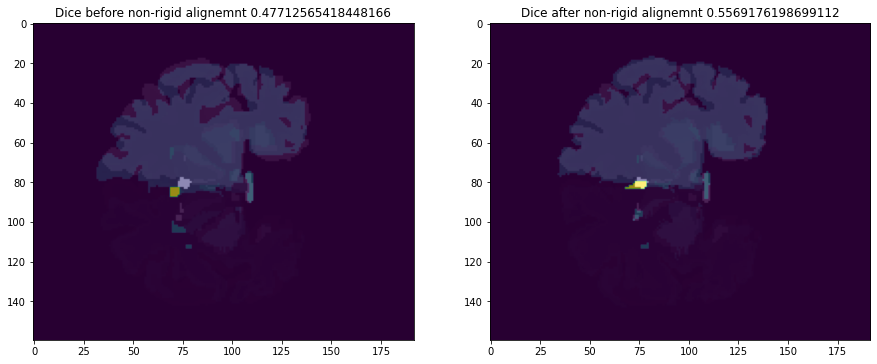

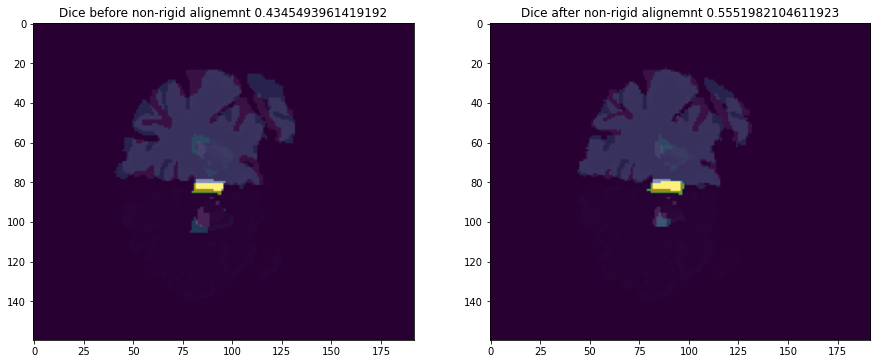

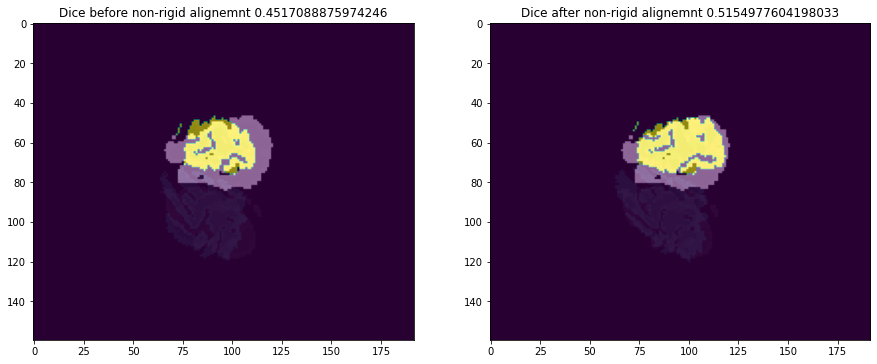

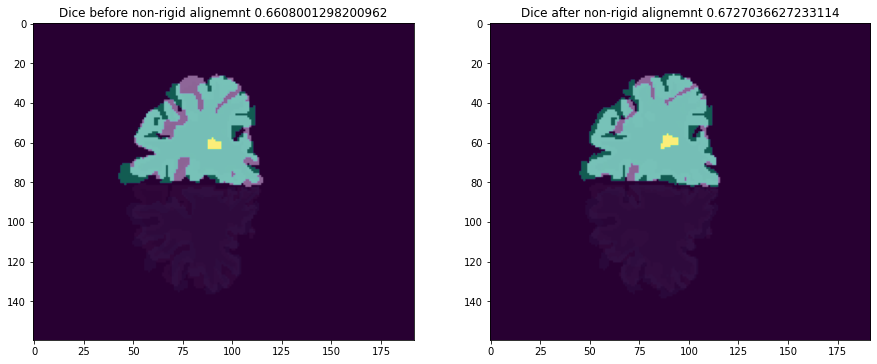

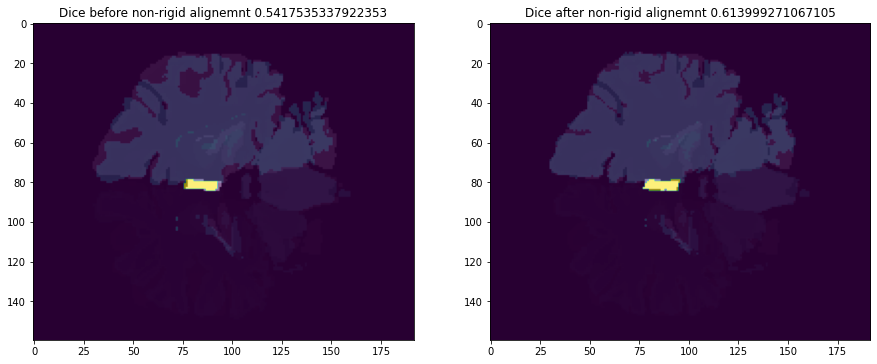

In [ ]:
rows = 1
index=0
for i in range(len(atlas_test_paths)):
  index=0
  atlas_image=load(atlas_test_paths[i])
  atlas_seg=load(atlas_label_test_paths[i])

  moving_image=load(moving_test_paths[i])
  moving_seg=load(moving_label_test_paths[i])


  atlas_image=preprocess(atlas_image,vol_shape)
  moving_image=preprocess(moving_image,vol_shape)

  atlas_seg=preprocess_label(atlas_seg,vol_shape)
  moving_seg=preprocess_label(moving_seg,vol_shape)

  atlas_image = torch.from_numpy(atlas_image[...]).to(device).float()
  atlas_image=atlas_image[None,None,...]
  atlas_seg = torch.from_numpy(atlas_seg[...]).to(device).float()
  atlas_seg=atlas_seg[None,None,...]

  

  moving_image = torch.from_numpy(moving_image[...]).to(device).float()
  moving_image=moving_image[None,None,...]
  moving_seg = torch.from_numpy(moving_seg[...]).to(device).float()
  moving_seg=moving_seg[None,None,...]
 
  # getting warped image and transformation field
  warp, flow = model(moving_image, atlas_image)
  #warping moving segmentation using transformation/flow field
  warp_seg   = trf(moving_seg, flow).detach().cpu().numpy()
  
  #finding common lables in both segmentation images
  atlas_lab=np.unique(atlas_seg.detach().cpu().numpy())
  moving_lab=np.unique(moving_seg.detach().cpu().numpy())
  labels=list(set(atlas_lab).intersection(moving_lab))


  dice_with_affine_alignment, _ = dice(moving_seg[0,0,...].detach().cpu().numpy(), atlas_seg[0,0,...].detach().cpu().numpy(), labels=labels, nargout=2)


  dice_with_non_rigid_alignment, _ = dice(warp_seg[0,0,...], atlas_seg[0,0,...].detach().cpu().numpy(), labels=labels, nargout=2)


  plt.figure(figsize=(15,15))

  plt.subplot(rows,2,index+1)
  plt.imshow(moving_seg[0,0,...].detach().cpu().numpy())
  plt.imshow(atlas_seg[0,0,...].detach().cpu().numpy(),alpha=0.4,cmap='gray')
  plt.title("Dice before non-rigid alignemnt "+str((np.mean(dice_with_affine_alignment)) ))
  index=index+1
  plt.subplot(rows,2,index+1)
  plt.imshow(warp_seg[0,0,...])
  plt.imshow(atlas_seg[0,0,...].detach().cpu().numpy(),alpha=0.4,cmap='gray')
  plt.title("Dice after non-rigid alignemnt "+str((np.mean(dice_with_non_rigid_alignment))))
  index=index+1


              
